# Tset

- test data sangfor 0301 - 0402
- hyperparameter 
    - 
    #### cluster
    - cfg.N_CLUSTER_RATION = 200
    #### distance cluster
    - cfg.EDIT_DISTANCE_THRESH_LONG = 0.3
    - cfg.EDIT_DISTANCE_THRESH_SHORT = 0.2
    - cfg.LONG_URL_THRESH = 100
    - cfg.SHORT_URL_THRESH = 20
    #### regular expreesion extract
    - cfg.MIN_SUBSTRING_SIZE = 12
    - cfg.SINGLE_REGEX_SIZE = 12
    - cfg.TOTAL_REGEX_SIZE = 12
    - cfg.SINGLE_REGEX_SIZE_RATIO = 0.2
    - cfg.TOTAL_REGEX_SIZE_RATIO = 0.2
    #### publish
    - cfg.PUBLISH_RATIO = 0.5
    - cfg.PUBLISH_RATIO_TP_THRESH = 10
    - cfg.PUBLISH_TP_THRESH = 1
    - cfg.PUBLISH_FP_THRESH = 0
    
- cover 
    74%

In [1]:
import os
import sys
import logging
import numpy as np
import pandas as pd
import urlparse


os.sys.path.append("/home/sparrow/sparrow/malicious_url_cluster")
from logger import logger 
from config import cfg

# 如果设置为0.3 
# 240/72 效果很差
# 如果设置为0.2
# 225/163 效果适中

# 如果使用 hierartical clustering 分割成10类
# 226/163 效果适中

# 如果降低regex size 30->20
# 240/165 性能没有明显提升，说明regex size对结果影响不大

# 采用基于IP地址的聚类方式进行聚类，效果较好 形成的簇更多
# min string size 8 20/20 300/200  
# min string size 12 20/20 300/110
# min string size 12 30/30 264/102
# ratio 0.4/0.5  124/64  9.01%
# ratio 0.3/0.3  217/104 19.08%
# ratio 0.2/0.2  313/113 19.08%   88%

cfg.N_CLUSTER_RATION = 200

cfg.EDIT_DISTANCE_THRESH_LONG = 0.3
cfg.EDIT_DISTANCE_THRESH_SHORT = 0.2
cfg.LONG_URL_THRESH = 100
cfg.SHORT_URL_THRESH = 20

cfg.MIN_SUBSTRING_SIZE = 12
cfg.SINGLE_REGEX_SIZE = 12
cfg.TOTAL_REGEX_SIZE = 12
cfg.SINGLE_REGEX_SIZE_RATIO = 0.2
cfg.TOTAL_REGEX_SIZE_RATIO = 0.2



from preprocess import data_loader, url_map_ip_analysis
from vectorize import make_vectorize
from cluster_engine import make_ip_cluster, make_string_distance_cluster
from regex_engine import regex_extract, regex_check, regex_publish
import preprocess
import cluster_engine
import regex_engine

In [10]:
urls = data_loader("../../data/sangfor/malware.csv", csv = True, txt = False)

2018-04-12 19:39:41 preprocess.py [line:92] DEBUG	Malware URL Count:	2786


In [3]:
ip_url_map = url_map_ip_analysis(list(set(urls)))

In [5]:
ires = make_ip_cluster(ip_url_map)
urls = [_ for i in ires for _ in i]
preprocess.dump_urls(urls, "../../data/EXP_sangfor_malware3/urls_plus.csv")

2018-04-11 15:44:14 preprocess.py [line:78] DEBUG	URLs has been dump	../../data/EXP_sangfor_malware3/urls_plus.csv


In [6]:
cluster_engine.make_string_distance_cluster(data = ires, 
                             metric = "distance",  
                             file_path = "../../data/EXP_sangfor_malware3/cluster_distance.json")

2018-04-11 15:44:19 cluster_engine.py [line:36] DEBUG	OLD DATA FIND! REMOVING	../../data/EXP_sangfor_malware3/cluster_distance.json
2018-04-11 15:44:19 cluster_engine.py [line:133] DEBUG	----------------0------------------
2018-04-11 15:44:19 cluster_engine.py [line:144] DEBUG	www.ixiaoyang.cn/down/KuaiZip_Setup_1605_190855.exe
2018-04-11 15:44:19 cluster_engine.py [line:147] DEBUG	>>>>>>> BATCH:39/1	TOTAL:94	DONE:1
2018-04-11 15:44:19 cluster_engine.py [line:133] DEBUG	----------------1------------------
2018-04-11 15:44:20 cluster_engine.py [line:144] DEBUG	down3.downyouxi.com/gongshajiaqiangbanweiduan.exe
2018-04-11 15:44:20 cluster_engine.py [line:147] DEBUG	>>>>>>> BATCH:39/1	TOTAL:94	DONE:2
2018-04-11 15:44:20 cluster_engine.py [line:133] DEBUG	----------------2------------------
2018-04-11 15:44:20 cluster_engine.py [line:144] DEBUG	www.akvtc.cn/uploadfile/2018329111245392.pdf
2018-04-11 15:44:20 cluster_engine.py [line:147] DEBUG	>>>>>>> BATCH:39/1	TOTAL:94	DONE:3
2018-04-11 15

2018-04-11 15:44:25 cluster_engine.py [line:144] DEBUG	security-artist.com/zara.exe
2018-04-11 15:44:25 cluster_engine.py [line:147] DEBUG	>>>>>>> BATCH:39/1	TOTAL:94	DONE:30
2018-04-11 15:44:25 cluster_engine.py [line:133] DEBUG	----------------29------------------
2018-04-11 15:44:26 cluster_engine.py [line:144] DEBUG	down.davaa.cn/Taohui_VBiz_1102.exe
2018-04-11 15:44:26 cluster_engine.py [line:147] DEBUG	>>>>>>> BATCH:39/1	TOTAL:94	DONE:31
2018-04-11 15:44:26 cluster_engine.py [line:133] DEBUG	----------------30------------------
2018-04-11 15:44:26 cluster_engine.py [line:144] DEBUG	reportsmaxis.com/cloudnet.exe
2018-04-11 15:44:26 cluster_engine.py [line:147] DEBUG	>>>>>>> BATCH:39/1	TOTAL:94	DONE:32
2018-04-11 15:44:26 cluster_engine.py [line:133] DEBUG	----------------31------------------
2018-04-11 15:44:26 cluster_engine.py [line:144] DEBUG	dd.axtieguanying.com/kzrytx2/KuaiZip_Setup_2523474329_rytx2_001.exe
2018-04-11 15:44:26 cluster_engine.py [line:147] DEBUG	>>>>>>> BATCH:

2018-04-11 15:44:31 cluster_engine.py [line:133] DEBUG	----------------58------------------
2018-04-11 15:44:31 cluster_engine.py [line:144] DEBUG	xt.mingpinhuishou.com/%25E6%259E%2581%25E9%2580%259F%25E8%25A3%2585%25E6%259C%25BA%25E5%25A4%25A7%25E5%25B8%2588.exe
2018-04-11 15:44:31 cluster_engine.py [line:147] DEBUG	>>>>>>> BATCH:39/1	TOTAL:94	DONE:61
2018-04-11 15:44:31 cluster_engine.py [line:133] DEBUG	----------------59------------------
2018-04-11 15:44:32 cluster_engine.py [line:144] DEBUG	down.softwo.net/downloads/special/kyzipx/Kuaizip_Setup_7654_1044419.exe
2018-04-11 15:44:32 cluster_engine.py [line:147] DEBUG	>>>>>>> BATCH:39/1	TOTAL:94	DONE:62
2018-04-11 15:44:32 cluster_engine.py [line:133] DEBUG	----------------60------------------
2018-04-11 15:44:32 cluster_engine.py [line:144] DEBUG	down.luckyboy.cn/T999jh.exe
2018-04-11 15:44:32 cluster_engine.py [line:147] DEBUG	>>>>>>> BATCH:39/1	TOTAL:94	DONE:63
2018-04-11 15:44:32 cluster_engine.py [line:133] DEBUG	--------------

2018-04-11 15:44:37 cluster_engine.py [line:133] DEBUG	----------------87------------------
2018-04-11 15:44:37 cluster_engine.py [line:144] DEBUG	self.game.keniub.com/2011_05_30/feeding/feeding_20100607.exe
2018-04-11 15:44:37 cluster_engine.py [line:147] DEBUG	>>>>>>> BATCH:39/1	TOTAL:94	DONE:89
2018-04-11 15:44:37 cluster_engine.py [line:133] DEBUG	----------------88------------------
2018-04-11 15:44:37 cluster_engine.py [line:144] DEBUG	wd.shunfeigame.com/cn/static/swf/FH/kucdt_24095_2650591.exe
2018-04-11 15:44:37 cluster_engine.py [line:147] DEBUG	>>>>>>> BATCH:39/1	TOTAL:94	DONE:90
2018-04-11 15:44:37 cluster_engine.py [line:133] DEBUG	----------------89------------------
2018-04-11 15:44:38 cluster_engine.py [line:144] DEBUG	cdn.baizhu.cc/dll/qyhelper.dll
2018-04-11 15:44:38 cluster_engine.py [line:147] DEBUG	>>>>>>> BATCH:39/1	TOTAL:94	DONE:91
2018-04-11 15:44:38 cluster_engine.py [line:133] DEBUG	----------------90------------------
2018-04-11 15:44:38 cluster_engine.py [lin

2018-04-11 15:44:40 cluster_engine.py [line:144] DEBUG	down05073791.xdown4.com/cx/160624/35/%25E5%258C%2597%25E4%25BA%25AC%25E6%25B5%25B7%25E6%25B7%2580%25E5%258C%25BA%25E6%2596%25B0%25E7%259B%25AE%25E6%25A0%2587%25E4%25B8%2583%25E4%25B8%258A%25E8%25AF%258D%25E6%25B1%2587%25E6%2595%2599%25E5%25AD%25A6%25E5%25BB%25BA%25E8%25AE%25AE%25E8%25AF%25BE%25E4%25BB%25B6@199_9690.exe
2018-04-11 15:44:40 cluster_engine.py [line:144] DEBUG	down05073792.xdown4.com/cx/160624/35/%25E6%25B7%25B1%25E5%259C%25B3%25E5%25B8%2582%25E5%258D%2597%25E5%25B1%25B1%25E5%258C%25BA20152016%25E5%25B9%25B4%25E5%258C%2597%25E5%25B8%2588%25E5%25A4%25A7%25E5%2585%25AB%25E5%25B9%25B4%25E7%25BA%25A7%25E4%25B8%258B%25E6%2595%25B0%25E5%25AD%25A6%25E6%259C%259F%25E6%259C%25AB@198_124727.exe
2018-04-11 15:44:40 cluster_engine.py [line:144] DEBUG	down05074362.xdown4.com/cx/160624/35/%25E6%25A1%2590%25E6%259F%258F%25E5%258E%25BF20142015%25E5%25AD%25A6%25E5%25B9%25B4%25E5%2585%25AB%25E5%25B9%25B4%25E7%25BA%25A7%25E4%25B8%258B%25

2018-04-11 15:44:41 cluster_engine.py [line:144] DEBUG	down05075267.xdown4.com/cx/160624/35/%25E5%25B0%258F%25E5%25AD%25A6%25E7%2594%259F%25E5%25AE%25AA%25E6%25B3%2595%25E7%259F%25A5%25E8%25AF%2586%25E8%25AF%25BE%25E4%25BB%25B6PPT%25E4%25B8%258B%25E8%25BD%25BD@148_260144.exe
2018-04-11 15:44:41 cluster_engine.py [line:144] DEBUG	down05074422.xdown4.com/cx/160624/35/%25E6%2580%25A5%25E6%2580%25A7%25E5%25BF%2583%25E5%258A%259B%25E8%25A1%25B0%25E7%25AB%25AD%25E7%259A%2584%25E5%2586%2585%25E5%25AE%25B9PPT%25E8%25AF%25BE%25E4%25BB%25B6%25E4%25B8%258B%25E8%25BD%25BD@148_29400.exe
2018-04-11 15:44:41 cluster_engine.py [line:147] DEBUG	>>>>>>> BATCH:39/3	TOTAL:191	DONE:31
2018-04-11 15:44:41 cluster_engine.py [line:133] DEBUG	----------------5------------------
2018-04-11 15:44:41 cluster_engine.py [line:144] DEBUG	down05071557.xdown4.com/cx/160624/35/%25E4%25B8%259C%25E6%2596%25B9%25E5%2585%258D%25E8%25B4%25B9%25E5%25BD%25B1%25E8%25A7%2586%25E5%25A4%25A7%25E5%2585%25A8@319_1_5.exe
2018-04-11 

2018-04-11 15:44:41 cluster_engine.py [line:144] DEBUG	down05071810.xdown4.com/cx/160624/35/%25E4%25B8%259C%25E6%2596%25B9%25E5%2585%258D%25E8%25B4%25B9%25E5%25BD%25B1%25E8%25A7%2586%25E5%25A4%25A7%25E5%2585%25A8@311_1_5.exe
2018-04-11 15:44:41 cluster_engine.py [line:144] DEBUG	down05071448.xdown4.com/cx/160624/35/%25E4%25B8%259C%25E6%2596%25B9%25E5%2585%258D%25E8%25B4%25B9%25E5%25BD%25B1%25E8%25A7%2586%25E5%25A4%25A7%25E5%2585%25A8@288_1_5.exe
2018-04-11 15:44:41 cluster_engine.py [line:144] DEBUG	down05071608.xdown4.com/cx/160624/35/%25E4%25B8%259C%25E6%2596%25B9%25E5%2585%258D%25E8%25B4%25B9%25E5%25BD%25B1%25E8%25A7%2586%25E5%25A4%25A7%25E5%2585%25A8@319_1_5.exe
2018-04-11 15:44:41 cluster_engine.py [line:144] DEBUG	down05072310.xdown4.com/cx/160624/35/%25E4%25B8%259C%25E6%2596%25B9%25E5%2585%258D%25E8%25B4%25B9%25E5%25BD%25B1%25E8%25A7%2586%25E5%25A4%25A7%25E5%2585%25A8@267_1_5.exe
2018-04-11 15:44:41 cluster_engine.py [line:144] DEBUG	down05073280.xdown4.com/cx/160624/35/%25E4%25

2018-04-11 15:44:41 cluster_engine.py [line:144] DEBUG	down05070946.xdown4.com/cx/160624/35/%25E4%25B8%259C%25E6%2596%25B9%25E5%2585%258D%25E8%25B4%25B9%25E5%25BD%25B1%25E8%25A7%2586%25E5%25A4%25A7%25E5%2585%25A8@342_1_5.exe
2018-04-11 15:44:41 cluster_engine.py [line:144] DEBUG	down05073767.xdown4.com/cx/160624/35/%25E5%25B7%25A5%25E4%25BD%259C%25E8%25AF%25BE%25E9%25A2%2598%25E6%25B1%2587%25E6%258A%25A5PPT%25E6%25A8%25A1%25E6%259D%25BF@148_b7177.exe
2018-04-11 15:44:41 cluster_engine.py [line:144] DEBUG	down05072329.xdown4.com/cx/160624/35/%25E4%25B8%259C%25E6%2596%25B9%25E5%2585%258D%25E8%25B4%25B9%25E5%25BD%25B1%25E8%25A7%2586%25E5%25A4%25A7%25E5%2585%25A8@319_1_5.exe
2018-04-11 15:44:41 cluster_engine.py [line:144] DEBUG	down05070917.xdown4.com/cx/160624/35/%25E4%25B8%259C%25E6%2596%25B9%25E5%2585%258D%25E8%25B4%25B9%25E5%25BD%25B1%25E8%25A7%2586%25E5%25A4%25A7%25E5%2585%25A8@342_1_5.exe
2018-04-11 15:44:41 cluster_engine.py [line:144] DEBUG	down05073507.xdown4.com/cx/160624/35/%25

2018-04-11 15:44:41 cluster_engine.py [line:144] DEBUG	down05072386.xdown4.com/cx/160624/35/2016%25E4%25BA%25BA%25E6%2595%2599%25E7%2589%2588%25E5%259B%259B%25E5%25B9%25B4%25E7%25BA%25A7%25E4%25B8%258B%25E7%25AC%25AC%25E5%2585%25AD%25E5%258D%2595%25E5%2585%2583%25E5%25B0%258F%25E6%2595%25B0%25E7%259A%2584%25E5%258A%25A0%25E6%25B3%2595%25E5%2592%258C%25E5%2587%258F%25E6%25B3%2595%25E6%25A3%2580%25E6%25B5%258B%25E8%25AF%2595@198_120975.exe
2018-04-11 15:44:41 cluster_engine.py [line:144] DEBUG	down05074362.xdown4.com/cx/160624/35/%25E6%2597%25A0%25E9%2594%25A1%25E5%25B8%2582%25E6%25B1%259F%25E9%2598%25B4%25E5%25B8%25822016%25E5%25B9%25B410%25E6%259C%2588%25E5%2585%25AB%25E5%25B9%25B4%25E7%25BA%25A7%25E4%25B8%258A%25E6%259C%2588%25E8%2580%2583%25E6%2595%25B0%25E5%25AD%25A6%25E8%25AF%2595%25E5%258D%25B7%25E5%2590%25AB%25E7%25AD%2594@198_135312.exe
2018-04-11 15:44:41 cluster_engine.py [line:144] DEBUG	down05071467.xdown4.com/cx/160624/35/%25E5%258C%2597%25E5%25B8%2588%25E5%25A4%25A7%25E5%2

2018-04-11 15:44:42 cluster_engine.py [line:144] DEBUG	down05073782.xdown4.com/cx/160624/35/%25E4%25BD%25B3%25E8%2583%25BDcr2%25E7%2585%25A7%25E7%2589%2587%25E6%259F%25A5%25E7%259C%258B%25E5%2599%25A8v1.0.2.0%25E6%259C%2580%25E6%2596%25B0%25E7%2589%2588@84_149334.exe
2018-04-11 15:44:42 cluster_engine.py [line:144] DEBUG	down05070873.xdown4.com/cx/160624/35/%25E5%258F%258C%25E5%2586%25A0%25E5%25AE%25B6%25E5%259B%25ADqsv%25E6%25A0%25BC%25E5%25BC%258F%25E8%25BD%25AC%25E6%258D%25A2%25E5%2599%25A8v5.0%25E7%25BB%25BF%25E8%2589%25B2%25E7%2589%2588@13_83845.exe
2018-04-11 15:44:42 cluster_engine.py [line:147] DEBUG	>>>>>>> BATCH:39/3	TOTAL:191	DONE:158
2018-04-11 15:44:42 cluster_engine.py [line:133] DEBUG	----------------34------------------
2018-04-11 15:44:42 cluster_engine.py [line:144] DEBUG	down05071711.xdown4.com/cx/160624/35/su%25E6%25B2%2599%25E7%259B%2592%25E6%258F%2592%25E4%25BB%25B6@105_1794837.exe
2018-04-11 15:44:42 cluster_engine.py [line:147] DEBUG	>>>>>>> BATCH:39/3	TOTAL:191

2018-04-11 15:44:43 cluster_engine.py [line:144] DEBUG	down05074359.xdown4.com/cx/160624/35/%25E4%25B8%259C%25E6%2596%25B9%25E5%2585%258D%25E8%25B4%25B9%25E5%25BD%25B1%25E8%25A7%2586%25E5%25A4%25A7%25E5%2585%25A8@342_1_5.exe
2018-04-11 15:44:43 cluster_engine.py [line:144] DEBUG	down05073012.xdown4.com/cx/160624/35/%25E4%25B8%259C%25E6%2596%25B9%25E5%2585%258D%25E8%25B4%25B9%25E5%25BD%25B1%25E8%25A7%2586%25E5%25A4%25A7%25E5%2585%25A8@266_1_5.exe
2018-04-11 15:44:43 cluster_engine.py [line:144] DEBUG	down05073509.xdown4.com/cx/160624/35/%25E4%25B8%259C%25E6%2596%25B9%25E5%2585%258D%25E8%25B4%25B9%25E5%25BD%25B1%25E8%25A7%2586%25E5%25A4%25A7%25E5%2585%25A8@288_1_5.exe
2018-04-11 15:44:43 cluster_engine.py [line:144] DEBUG	down05072289.xdown4.com/cx/160624/35/%25E4%25B8%259C%25E6%2596%25B9%25E5%2585%258D%25E8%25B4%25B9%25E5%25BD%25B1%25E8%25A7%2586%25E5%25A4%25A7%25E5%2585%25A8@267_1_5.exe
2018-04-11 15:44:43 cluster_engine.py [line:144] DEBUG	down05070898.xdown4.com/cx/160624/35/%25E4%25

2018-04-11 15:44:43 cluster_engine.py [line:144] DEBUG	down05070731.xdown4.com/cx/160624/35/%25E4%25B8%259C%25E6%2596%25B9%25E5%2585%258D%25E8%25B4%25B9%25E5%25BD%25B1%25E8%25A7%2586%25E5%25A4%25A7%25E5%2585%25A8@319_1_5.exe
2018-04-11 15:44:43 cluster_engine.py [line:144] DEBUG	down05075226.xdown4.com/cx/160624/35/%25E4%25B8%259C%25E6%2596%25B9%25E5%2585%258D%25E8%25B4%25B9%25E5%25BD%25B1%25E8%25A7%2586%25E5%25A4%25A7%25E5%2585%25A8@319_1_5.exe
2018-04-11 15:44:43 cluster_engine.py [line:144] DEBUG	down05072391.xdown4.com/cx/160624/35/%25E4%25B8%259C%25E6%2596%25B9%25E5%2585%258D%25E8%25B4%25B9%25E5%25BD%25B1%25E8%25A7%2586%25E5%25A4%25A7%25E5%2585%25A8@319_1_5.exe
2018-04-11 15:44:43 cluster_engine.py [line:144] DEBUG	down05070753.xdown4.com/cx/160624/35/%25E4%25B8%259C%25E6%2596%25B9%25E5%2585%258D%25E8%25B4%25B9%25E5%25BD%25B1%25E8%25A7%2586%25E5%25A4%25A7%25E5%2585%25A8@319_1_5.exe
2018-04-11 15:44:43 cluster_engine.py [line:144] DEBUG	down05075260.xdown4.com/cx/160624/35/%25E4%25

2018-04-11 15:44:44 cluster_engine.py [line:144] DEBUG	down05073434.xdown4.com/cx/160624/35/%25E4%25B8%259C%25E6%2596%25B9%25E5%2585%258D%25E8%25B4%25B9%25E5%25BD%25B1%25E8%25A7%2586%25E5%25A4%25A7%25E5%2585%25A8@264_1_5.exe
2018-04-11 15:44:44 cluster_engine.py [line:144] DEBUG	down05071743.xdown4.com/cx/160624/35/%25E4%25B8%259C%25E6%2596%25B9%25E5%2585%258D%25E8%25B4%25B9%25E5%25BD%25B1%25E8%25A7%2586%25E5%25A4%25A7%25E5%2585%25A8@267_1_5.exe
2018-04-11 15:44:44 cluster_engine.py [line:144] DEBUG	down05072040.xdown4.com/cx/160624/35/%25E4%25B8%259C%25E6%2596%25B9%25E5%2585%258D%25E8%25B4%25B9%25E5%25BD%25B1%25E8%25A7%2586%25E5%25A4%25A7%25E5%2585%25A8@342_1_5.exe
2018-04-11 15:44:44 cluster_engine.py [line:144] DEBUG	down05073471.xdown4.com/cx/160624/35/%25E4%25B8%259C%25E6%2596%25B9%25E5%2585%258D%25E8%25B4%25B9%25E5%25BD%25B1%25E8%25A7%2586%25E5%25A4%25A7%25E5%2585%25A8@319_1_5.exe
2018-04-11 15:44:44 cluster_engine.py [line:144] DEBUG	down05073157.xdown4.com/cx/160624/35/%25E4%25

2018-04-11 15:44:44 cluster_engine.py [line:144] DEBUG	down05072885.xdown4.com/cx/160624/35/%25E4%25B8%259C%25E6%2596%25B9%25E5%2585%258D%25E8%25B4%25B9%25E5%25BD%25B1%25E8%25A7%2586%25E5%25A4%25A7%25E5%2585%25A8@288_1_5.exe
2018-04-11 15:44:44 cluster_engine.py [line:144] DEBUG	down05071506.xdown4.com/cx/160624/35/%25E4%25B8%259C%25E6%2596%25B9%25E5%2585%258D%25E8%25B4%25B9%25E5%25BD%25B1%25E8%25A7%2586%25E5%25A4%25A7%25E5%2585%25A8@266_1_5.exe
2018-04-11 15:44:44 cluster_engine.py [line:144] DEBUG	down05074898.xdown4.com/cx/160624/35/%25E4%25B8%259C%25E6%2596%25B9%25E5%2585%258D%25E8%25B4%25B9%25E5%25BD%25B1%25E8%25A7%2586%25E5%25A4%25A7%25E5%2585%25A8@311_1_5.exe
2018-04-11 15:44:44 cluster_engine.py [line:144] DEBUG	down05070905.xdown4.com/cx/160624/35/%25E4%25B8%259C%25E6%2596%25B9%25E5%2585%258D%25E8%25B4%25B9%25E5%25BD%25B1%25E8%25A7%2586%25E5%25A4%25A7%25E5%2585%25A8@266_1_5.exe
2018-04-11 15:44:44 cluster_engine.py [line:144] DEBUG	down05071571.xdown4.com/cx/160624/35/%25E4%25

2018-04-11 15:44:45 cluster_engine.py [line:144] DEBUG	down05073782.xdown4.com/cx/160624/35/%25E4%25BD%25B3%25E8%2583%25BDcr2%25E7%2585%25A7%25E7%2589%2587%25E6%259F%25A5%25E7%259C%258B%25E5%2599%25A8v1.0.2.0%25E6%259C%2580%25E6%2596%25B0%25E7%2589%2588@84_149334.exe
2018-04-11 15:44:45 cluster_engine.py [line:144] DEBUG	down05070873.xdown4.com/cx/160624/35/%25E5%258F%258C%25E5%2586%25A0%25E5%25AE%25B6%25E5%259B%25ADqsv%25E6%25A0%25BC%25E5%25BC%258F%25E8%25BD%25AC%25E6%258D%25A2%25E5%2599%25A8v5.0%25E7%25BB%25BF%25E8%2589%25B2%25E7%2589%2588@13_83845.exe
2018-04-11 15:44:45 cluster_engine.py [line:147] DEBUG	>>>>>>> BATCH:39/3	TOTAL:191	DONE:183
2018-04-11 15:44:45 cluster_engine.py [line:133] DEBUG	----------------119------------------
2018-04-11 15:44:46 cluster_engine.py [line:144] DEBUG	down05070873.xdown4.com/cx/160624/35/%25E8%2587%25AA%25E7%2594%25B1%25E4%25B9%258B%25E9%2597%25A8%25E4%25B8%258B%25E8%25BD%25BD@102_698183.exe
2018-04-11 15:44:46 cluster_engine.py [line:147] DEBUG	

2018-04-11 15:44:49 cluster_engine.py [line:144] DEBUG	cr173.down.123ch.cn/download/%25E5%2596%259C%25E9%25A9%25AC%25E6%258B%2589%25E9%259B%2585%25E5%2590%25AC%25E4%25B9%25A6%25E7%2594%25B5%25E8%2584%2591%25E7%2589%2588_31@93064.exe
2018-04-11 15:44:49 cluster_engine.py [line:144] DEBUG	cr173.down.123ch.cn/download/%25E8%25BF%25BD%25E4%25B9%25A6%25E7%25A5%259E%25E5%2599%25A8%25E6%258D%25A2%25E6%25BA%2590%25E7%2589%2588_51@314084.exe
2018-04-11 15:44:49 cluster_engine.py [line:144] DEBUG	cr173.down.123ch.cn/download/%25E7%2581%25AB%25E8%2590%25A4%25E5%258A%25A8%25E6%2580%2581%25E5%25A3%2581%25E7%25BA%25B8%25E8%25BD%25AF%25E4%25BB%25B6_51@395627.exe
2018-04-11 15:44:49 cluster_engine.py [line:144] DEBUG	cr173.down.123ch.cn/download/%25E4%25B8%2587%25E8%2583%25BD%25E7%25BD%2591%25E5%258D%25A1%25E9%25A9%25B1%25E5%258A%25A8%25E4%25B8%258B%25E8%25BD%25BD_51@20590.exe
2018-04-11 15:44:49 cluster_engine.py [line:144] DEBUG	cr173.down.123ch.cn/download/%25E5%25BD%25B1%25E8%25A7%2586%25E5%25A4%2

2018-04-11 15:44:51 cluster_engine.py [line:147] DEBUG	>>>>>>> BATCH:39/4	TOTAL:102	DONE:48
2018-04-11 15:44:51 cluster_engine.py [line:133] DEBUG	----------------19------------------
2018-04-11 15:44:51 cluster_engine.py [line:144] DEBUG	cl.zasuv.com/download/office%25202016_95@45975.exe
2018-04-11 15:44:51 cluster_engine.py [line:144] DEBUG	cl.zasuv.com/download/Office%25202010_95@45876.exe
2018-04-11 15:44:51 cluster_engine.py [line:147] DEBUG	>>>>>>> BATCH:39/4	TOTAL:102	DONE:50
2018-04-11 15:44:51 cluster_engine.py [line:133] DEBUG	----------------20------------------
2018-04-11 15:44:51 cluster_engine.py [line:144] DEBUG	cr173.down.123ch.cn/download/PostgreSQL_31@20237.exe
2018-04-11 15:44:51 cluster_engine.py [line:147] DEBUG	>>>>>>> BATCH:39/4	TOTAL:102	DONE:51
2018-04-11 15:44:51 cluster_engine.py [line:133] DEBUG	----------------21------------------
2018-04-11 15:44:51 cluster_engine.py [line:144] DEBUG	cl.wxyngq.com/download/%25E5%2580%25A9%25E5%25A5%25B3%25E5%25B9%25BD%25E9

2018-04-11 15:44:54 cluster_engine.py [line:133] DEBUG	----------------47------------------
2018-04-11 15:44:54 cluster_engine.py [line:144] DEBUG	cr173.down.123ch.cn/download/%25E5%25AE%2589%25E5%258D%2593%25E6%2589%258B%25E6%259C%25BA%25E6%2581%25A2%25E5%25A4%258D%25E5%25A4%25A7%25E5%25B8%2588%25E7%25A0%25B4%25E8%25A7%25A3%25E7%2589%2588%25E4%25B8%258B%25E8%25BD%25BDV5.0.9._51@296534.exe
2018-04-11 15:44:54 cluster_engine.py [line:144] DEBUG	cr173.down.123ch.cn/download/%25E6%25B8%2585%25E5%25AE%25AB%25E6%2597%25A0%25E9%2597%25B4%25E6%2596%2597PC%25E5%25AE%2589%25E5%258D%2593%25E6%25A8%25A1%25E6%258B%259F%25E5%2599%25A8%25E4%25B8%258B%25E8%25BD%25BD_51@620648.exe
2018-04-11 15:44:54 cluster_engine.py [line:144] DEBUG	cr173.down.123ch.cn/download/cad%25E5%25AD%2597%25E4%25BD%2593%25E5%25BA%2593%25E5%25A4%25A7%25E5%2585%25A82485%25E7%25A7%258D%25E5%25AD%2597%25E4%25BD%2593%25E4%25B8%258B%25E8%25BD%25BD%25E8%25A5%25BF%25E8%25A5%25BF_51@27450.exe
2018-04-11 15:44:54 cluster_engine.py [li

2018-04-11 15:44:59 cluster_engine.py [line:133] DEBUG	----------------95------------------
2018-04-11 15:44:59 cluster_engine.py [line:144] DEBUG	cr173.down.123ch.cn/download/%25E6%2596%25B9%25E6%25AD%25A3%25E9%2598%25BF%25E5%25B8%2595%25E6%25AF%2594(Apabi%2520Reader)_51@7654.exe
2018-04-11 15:44:59 cluster_engine.py [line:147] DEBUG	>>>>>>> BATCH:39/4	TOTAL:102	DONE:100
2018-04-11 15:44:59 cluster_engine.py [line:133] DEBUG	----------------97------------------
2018-04-11 15:44:59 cluster_engine.py [line:144] DEBUG	cl.zasuv.com/download/2345%25E5%25A5%25BD%25E5%258E%258B_95@891212.exe
2018-04-11 15:44:59 cluster_engine.py [line:147] DEBUG	>>>>>>> BATCH:39/4	TOTAL:102	DONE:101
2018-04-11 15:44:59 cluster_engine.py [line:133] DEBUG	----------------101------------------
2018-04-11 15:44:59 cluster_engine.py [line:144] DEBUG	cr173.down.123ch.cn/download/faststone_51@322981.exe
2018-04-11 15:44:59 cluster_engine.py [line:147] DEBUG	>>>>>>> BATCH:39/4	TOTAL:102	DONE:102
2018-04-11 15:44:59 

2018-04-11 15:45:03 cluster_engine.py [line:144] DEBUG	cl.urndf.com/download/%25E4%25BB%25BF%25E5%25AE%258Bgb2312%25E5%25AD%2597%25E4%25BD%2593_18@7780.exe
2018-04-11 15:45:03 cluster_engine.py [line:144] DEBUG	cl.urndf.com/download/%25E7%25BD%2591%25E6%2598%2593%25E4%25BA%2591%25E9%259F%25B3%25E4%25B9%2590_18@182737.exe
2018-04-11 15:45:03 cluster_engine.py [line:144] DEBUG	cl.urndf.com/download/%25E8%25BF%2585%25E9%259B%25B7%25E6%259E%2581%25E9%2580%259F%25E7%2589%2588_18@26182.exe
2018-04-11 15:45:03 cluster_engine.py [line:144] DEBUG	cl.urndf.com/download/360%25E5%25AE%2589%25E5%2585%25A8%25E6%25B5%258F%25E8%25A7%2588%25E5%2599%25A8_18@27554.exe
2018-04-11 15:45:03 cluster_engine.py [line:144] DEBUG	cl.urndf.com/download/%25E5%25BF%25AB%25E7%258E%25A9%25E6%25B8%25B8%25E6%2588%258F%25E7%259B%2592_18@187951.exe
2018-04-11 15:45:03 cluster_engine.py [line:144] DEBUG	cl.urndf.com/download/%25E5%25B0%258F%25E7%25B1%25B3%25E9%259A%258F%25E8%25BA%25ABwifi_18@23863.exe
2018-04-11 15:45:03 

2018-04-11 15:45:07 cluster_engine.py [line:144] DEBUG	cl.urndf.com/download/coreldraw%2520x6_18@12778.exe
2018-04-11 15:45:07 cluster_engine.py [line:147] DEBUG	>>>>>>> BATCH:39/7	TOTAL:54	DONE:53
2018-04-11 15:45:07 cluster_engine.py [line:133] DEBUG	----------------48------------------
2018-04-11 15:45:08 cluster_engine.py [line:144] DEBUG	cl.urndf.com/download/%25E9%2592%2589%25E9%2592%2589_18@86816.exe
2018-04-11 15:45:08 cluster_engine.py [line:147] DEBUG	>>>>>>> BATCH:39/7	TOTAL:54	DONE:54
2018-04-11 15:45:08 cluster_engine.py [line:133] DEBUG	----------------0------------------
2018-04-11 15:45:08 cluster_engine.py [line:144] DEBUG	19648.xc.cangpie.com/xiaz/WinRAR@212_329168.exe
2018-04-11 15:45:08 cluster_engine.py [line:147] DEBUG	>>>>>>> BATCH:39/8	TOTAL:203	DONE:1
2018-04-11 15:45:08 cluster_engine.py [line:133] DEBUG	----------------1------------------
2018-04-11 15:45:08 cluster_engine.py [line:144] DEBUG	19424.url.246546.com/xiaz/%25E3%2580%2590%25E6%259D%259C%25E4%25BA%

2018-04-11 15:45:10 cluster_engine.py [line:144] DEBUG	19361.url.246546.com/xiaz/%25E5%25AE%258C%25E7%25BB%2593%25E9%2592%259F%25E5%258F%2594%25C2%25B7%25E9%2580%25BB%25E8%25BE%2591%25E8%258B%25B1%25E8%25AF%25AD5%25E5%25AD%25A3%25E9%259B%2586%25E5%2590%2588.pdf_%25E7%2599%25BE%25E5%25BA%25A6%25E7%25BD%2591%25E7%259B%2598-%25E7%25BD%2591%25E7%259B%2598007@554_2.exe
2018-04-11 15:45:10 cluster_engine.py [line:144] DEBUG	19354.url.246546.com/xiaz/%25E7%2587%2583%25E6%2583%2585%25E5%25B2%2581%25E6%259C%2588.720p.%25E5%259B%25BD%25E8%258B%25B1%25E5%258F%258C%25E8%25AF%25AD.BD%25E4%25B8%25AD%25E8%258B%25B1%25E5%258F%258C%25E5%25AD%2597_%25E7%2599%25BE%25E5%25BA%25A6%25E7%25BD%2591%25E7%259B%2598-%25E7%25BD%2591%25E7%259B%2598007@554_2.exe
2018-04-11 15:45:10 cluster_engine.py [line:147] DEBUG	>>>>>>> BATCH:39/8	TOTAL:203	DONE:27
2018-04-11 15:45:10 cluster_engine.py [line:133] DEBUG	----------------10------------------
2018-04-11 15:45:10 cluster_engine.py [line:144] DEBUG	19642.url.246546.c

2018-04-11 15:45:12 cluster_engine.py [line:144] DEBUG	19379.url.246546.com/xiaz/%25E5%2585%25A8%25E4%25B8%258A%25E5%258F%25A4%25E4%25B8%2589%25E4%25BB%25A3%25E7%25A7%25A6%25E6%25B1%2589%25E4%25B8%2589%25E5%259B%25BD%25E5%2585%25AD%25E6%259C%259D%25E6%2596%258706_%25E5%2585%25A8%25E6%2599%258B%25E6%2596%2587b2.pdf_%25E5%25BE%25AE%25E7%259B%2598-%25E7%25BD%2591%25E7%259B%2598007@554_2.exe
2018-04-11 15:45:12 cluster_engine.py [line:144] DEBUG	19430.url.246546.com/xiaz/%25E7%25A7%25A6%25E6%2597%25B6%25E6%2598%258E%25E6%259C%2588%25E4%25B9%258B%25E5%25A6%2596%25E5%25AD%25BD%25EF%25BC%2588%25E5%25A4%25A7%25E7%25A7%25A6%25E5%25A6%2596%25E5%25AD%25BD%25EF%25BC%2589.txt_%25E7%2599%25BE%25E5%25BA%25A6%25E7%25BD%2591%25E7%259B%2598-%25E7%25BD%2591%25E7%259B%2598007@554_2.exe
2018-04-11 15:45:12 cluster_engine.py [line:144] DEBUG	19647.url.246546.com/xiaz/%25E3%2580%2590%25E6%2597%25A0%25E5%2585%25B3%25E9%25A3%258E%25E6%259C%2588%25E3%2580%2591%25E3%2580%2590%25E6%25B2%25AB%25E6%25B2%25AB%25E6%2

2018-04-11 15:45:14 cluster_engine.py [line:144] DEBUG	19694.url.246546.com/xiaz/%25E4%25B9%25A1%25E6%259D%2591%25E4%25B9%25B1%25E6%2583%25851-20zhang_%25E7%2599%25BE%25E5%25BA%25A6%25E7%25BD%2591%25E7%259B%2598-%25E7%25BD%2591%25E7%259B%2598007@554_2.exe
2018-04-11 15:45:14 cluster_engine.py [line:144] DEBUG	19640.url.246546.com/xiaz/%25E8%25AE%25B8%25E8%25AF%25BA%25E4%25BB%258A%25E5%25A3%25B0.txt_%25E7%2599%25BE%25E5%25BA%25A6%25E7%25BD%2591%25E7%259B%2598-%25E7%25BD%2591%25E7%259B%2598007@554_2.exe
2018-04-11 15:45:14 cluster_engine.py [line:144] DEBUG	19649.url.246546.com/xiaz/%25E7%25BF%25A0%25E5%25BE%25AE%25E5%25B1%2585_%25E7%2599%25BE%25E5%25BA%25A6%25E7%25BD%2591%25E7%259B%2598-%25E7%25BD%2591%25E7%259B%2598007@554_2.exe
2018-04-11 15:45:14 cluster_engine.py [line:144] DEBUG	19557.url.246546.com/xiaz/2017.HD.mkv%25E6%25B0%25B4%25E5%25BD%25A2%25E7%2589%25A9%25E8%25AF%25AD_%25E7%2599%25BE%25E5%25BA%25A6%25E7%25BD%2591%25E7%259B%2598-%25E7%25BD%2591%25E7%259B%2598007@554_2.exe
201

2018-04-11 15:45:15 cluster_engine.py [line:133] DEBUG	----------------50------------------
2018-04-11 15:45:16 cluster_engine.py [line:144] DEBUG	19361.url.tudown.com/xiaz/%25E5%258F%258C%25E7%258B%2599%25E4%25BA%25BA%25E5%2585%258D%25E8%25B4%25B9%25E5%259C%25A8%25E7%25BA%25BF%25E8%25A7%2582%25E7%259C%258B_%25E7%2599%25BE%25E5%25BA%25A6%25E4%25BA%2591_%25E5%258F%258C%25E7%258B%2599%25E4%25BA%25BA%25E9%25AB%2598%25E6%25B8%2585%25E8%25BF%2585%25E9%259B%25B7%25E4%25B8%258B%25E8%25BD%25BD-%25E8%25BF%2585%25E9%259B%25B7%25E5%25BD%25B1%25E9%2599%25A2@543_2.exe
2018-04-11 15:45:16 cluster_engine.py [line:147] DEBUG	>>>>>>> BATCH:39/8	TOTAL:203	DONE:92
2018-04-11 15:45:16 cluster_engine.py [line:133] DEBUG	----------------52------------------
2018-04-11 15:45:16 cluster_engine.py [line:144] DEBUG	19714.xc.cangpie.com/xiaz/OILUP1.2.1%25E5%25AE%2589%25E5%258D%2593%25E7%2589%2588@284_371535.exe
2018-04-11 15:45:16 cluster_engine.py [line:147] DEBUG	>>>>>>> BATCH:39/8	TOTAL:203	DONE:93
2018-04-11

2018-04-11 15:45:17 cluster_engine.py [line:147] DEBUG	>>>>>>> BATCH:39/8	TOTAL:203	DONE:108
2018-04-11 15:45:17 cluster_engine.py [line:133] DEBUG	----------------64------------------
2018-04-11 15:45:18 cluster_engine.py [line:144] DEBUG	19655.xc.gongnou.com/xiaz/%25E5%258D%2597%25E7%2589%25B9%25E7%259A%2584%25E9%259B%2585%25E5%2585%258B%25E5%25BE%25B7%25E7%25B1%25B3%2C%25E5%258D%2597%25E7%2589%25B9%25E7%259A%2584%25E9%259B%2585%25E5%2585%258B%25E5%25BE%25B7%25E7%25B1%25B3%25E7%2594%25B5%25E5%25BD%25B1%2C%25E5%258D%2597%25E7%2589%25B9%25E7%259A%2584%25E9%259B%2585%25E5%2585%258B%25E5%25BE%25B7%25E7%25B1%25B3%25E5%259C%25A8%25E7%25BA%25BF%25E8%25A7%2582%25E7%259C%258B%2C%25E5%258D%2597%25E7%2589%25B9%25E7%259A%2584%25E9%259B%2585%25E5%2585%258B%25E5%25BE%25B7%25E7%25B1%25B3%25E5%2585%258D%25E8%25B4%25B9%25E8%25A7%2582%25E7%259C%258B%2C%25E5%258D%2597%25E7%2589%25B9%25E7%259A%2584%25E9%259B%2585%25E5%2585%258B%25E5%25BE%25B7%25E7%25B1%25B3%25E9%25AB%2598%25E6%25B8%2585%25E5%25AE%258C%2

2018-04-11 15:45:20 cluster_engine.py [line:144] DEBUG	19455.url.246546.com/xiaz/%25E8%25BE%25BE%25E4%25BC%25A6%25C2%25B7%25E5%25B8%2583%25E6%259C%2597%25EF%25BC%259A%25E5%25B0%25B1%25E8%258C%2583.2018.HD1080p%25E3%2580%2590%25E5%2585%25B3%25E6%25B3%25A8%25E5%2585%25AC%25E4%25BC%2597%25E5%258F%25B7%25EF%25BC%259A%25E7%2594%25B5%25E5%25BD%25B1%25E6%2595%2599%25E5%25AE%25A4%25E3%2580%2591%25E5%259B%259E%25E5%25A4%258D%25E5%2589%25A7%25E5%2590%258D%25E8%258E%25B7%25E5%258F%2596.mp4_%25E7%2599%25BE%25E5%25BA%25A6%25E7%25BD%2591%25E7%259B%2598-%25E7%25BD%2591%25E7%259B%2598007@554_2.exe
2018-04-11 15:45:20 cluster_engine.py [line:144] DEBUG	19449.url.246546.com/xiaz/%5B%25E4%25B8%25AD%25E8%25A5%25BF%25E6%25B3%2595%25E6%2596%2587%25E5%258C%2596%25E7%259A%2584%25E6%259A%2597%25E5%2590%2588%25E4%25B8%258E%25E5%25B7%25AE%25E5%25BC%2582%5D.%25E8%258C%2583%25E5%25BF%25A0%25E4%25BF%25A1.%25E6%2589%25AB%25E6%258F%258F%25E7%2589%2588.pdf%5B%25E4%25B8%25AD%25E8%25A5%25BF%25E6%25B3%2595%25E6%2596%2587

2018-04-11 15:45:23 cluster_engine.py [line:144] DEBUG	19641.url.9xiazaiqi.com/xiaz/SolidWorks201664%25E4%25BD%258D%25E4%25B8%25AD%25E6%2596%2587%25E6%25B3%25A8%25E5%2586%258C%25E7%2589%2588(%25E5%2590%25AB%25E6%25B3%25A8%25E5%2586%258C%25E6%259C%25BA)@317_28177.exe
2018-04-11 15:45:23 cluster_engine.py [line:144] DEBUG	19356.url.9xiazaiqi.com/xiaz/photoshopcs6%25E7%25AE%2580%25E4%25BD%2593%25E4%25B8%25AD%25E6%2596%2587%25E5%25AE%2598%25E6%2596%25B9%25E6%25AD%25A3%25E5%25BC%258F%25E5%258E%259F%25E7%2589%2588@135_25450.exe
2018-04-11 15:45:23 cluster_engine.py [line:147] DEBUG	>>>>>>> BATCH:39/8	TOTAL:203	DONE:144
2018-04-11 15:45:23 cluster_engine.py [line:133] DEBUG	----------------101------------------
2018-04-11 15:45:23 cluster_engine.py [line:144] DEBUG	19551.url.9xiazaiqi.com/down/SoftEther%2520VPN%2520Server_2.0Beta4Build4660@50_15450.exe
2018-04-11 15:45:23 cluster_engine.py [line:147] DEBUG	>>>>>>> BATCH:39/8	TOTAL:203	DONE:145
2018-04-11 15:45:23 cluster_engine.py [line:133] 

2018-04-11 15:45:26 cluster_engine.py [line:147] DEBUG	>>>>>>> BATCH:39/8	TOTAL:203	DONE:163
2018-04-11 15:45:26 cluster_engine.py [line:133] DEBUG	----------------131------------------
2018-04-11 15:45:26 cluster_engine.py [line:144] DEBUG	19646.xc.gongnou.com/xiaz/%25E6%258B%25B3%25E7%259A%258798%25EF%25BC%259A%25E7%25BB%2588%25E6%259E%2581%25E4%25B9%258B%25E6%2588%2598%25E6%259C%2580%25E7%25BB%2588%25E7%2589%2588@382_20564.exe
2018-04-11 15:45:26 cluster_engine.py [line:144] DEBUG	19654.xc.gongnou.com/xiaz/%25E7%25BA%25A2%25E6%25B5%25B7%25E8%25A1%258C%25E5%258A%25A8%25E7%2594%25B5%25E5%25BD%25B1%25E5%259C%25A8%25E7%25BA%25BF%25E8%25A7%2582%25E7%259C%258B@695_2.exe
2018-04-11 15:45:26 cluster_engine.py [line:144] DEBUG	19647.xc.gongnou.com/xiaz/%25E4%25BE%25A0%25E7%259B%2597%25E7%258C%258E%25E8%25BD%25A6%25E6%2589%258B%25EF%25BC%259A%25E7%25BD%25AA%25E6%2581%25B6%25E9%2583%25BD%25E5%25B8%2582@382_5401.exe
2018-04-11 15:45:26 cluster_engine.py [line:144] DEBUG	19722.xc.gongnou.com/dow

2018-04-11 15:45:29 cluster_engine.py [line:147] DEBUG	>>>>>>> BATCH:39/8	TOTAL:203	DONE:181
2018-04-11 15:45:29 cluster_engine.py [line:133] DEBUG	----------------157------------------
2018-04-11 15:45:29 cluster_engine.py [line:144] DEBUG	19520.url.246546.com/xiaz/Photoshop%25E7%25BB%25BF%25E8%2589%25B2%25E7%2589%2588%25E5%2585%258D%25E5%25AE%2589%25E8%25A3%2585%25E4%25B8%25AD%25E6%2596%2587%25E7%2589%2588(ps%25E7%25BB%25BF%25E8%2589%25B2%25E7%2589%2588%25E6%2589%2580%25E6%259C%2589%25E7%2589%2588%25E6%259C%25AC)@317_40243.exe
2018-04-11 15:45:29 cluster_engine.py [line:147] DEBUG	>>>>>>> BATCH:39/8	TOTAL:203	DONE:182
2018-04-11 15:45:29 cluster_engine.py [line:133] DEBUG	----------------158------------------
2018-04-11 15:45:29 cluster_engine.py [line:144] DEBUG	19716.url.246546.com/xiaz/%25E6%2599%25BA%25E6%2585%25A7%25E6%25A0%25912018%25E7%2594%25B5%25E8%2584%2591%25E5%25AE%25A2%25E6%2588%25B7%25E7%25AB%25AFv2.0%25E5%25AE%2598%25E6%2596%25B9PC%25E7%2589%2588@317_28989.exe
2018-04-

2018-04-11 15:45:33 cluster_engine.py [line:147] DEBUG	>>>>>>> BATCH:39/8	TOTAL:203	DONE:201
2018-04-11 15:45:33 cluster_engine.py [line:133] DEBUG	----------------196------------------
2018-04-11 15:45:33 cluster_engine.py [line:144] DEBUG	url.222bz.com/down/05S502%25E9%2598%2580%25E9%2597%25A8%25E4%25BA%2595@360_8261.exe
2018-04-11 15:45:33 cluster_engine.py [line:147] DEBUG	>>>>>>> BATCH:39/8	TOTAL:203	DONE:202
2018-04-11 15:45:33 cluster_engine.py [line:133] DEBUG	----------------201------------------
2018-04-11 15:45:33 cluster_engine.py [line:144] DEBUG	19369.url.9xiazaiqi.com/xiaz/win10GVLKv17.12.25%25E7%25A5%259E%25E9%25BE%2599%25E7%2589%2588@317_28227.exe
2018-04-11 15:45:33 cluster_engine.py [line:147] DEBUG	>>>>>>> BATCH:39/8	TOTAL:203	DONE:203
2018-04-11 15:45:33 cluster_engine.py [line:133] DEBUG	----------------0------------------
2018-04-11 15:45:33 cluster_engine.py [line:144] DEBUG	19430.url.246546.com/xiaz/%25E8%25B6%2585%25E7%25BA%25A7%25E5%25B7%25A5%25E7%25A8%258B05

2018-04-11 15:45:34 cluster_engine.py [line:147] DEBUG	>>>>>>> BATCH:39/9	TOTAL:228	DONE:23
2018-04-11 15:45:34 cluster_engine.py [line:133] DEBUG	----------------2------------------
2018-04-11 15:45:34 cluster_engine.py [line:144] DEBUG	19691.xc.gongnou.com/xiaz/%25E7%2594%25B5%25E5%25BD%25B1%25E7%25BA%25A2%25E6%25B5%25B7%25E8%25A1%258C%25E5%258A%25A8%25E8%25BF%2585%25E9%259B%25B7%25E4%25B8%258B%25E8%25BD%25BD@407_2.exe
2018-04-11 15:45:34 cluster_engine.py [line:144] DEBUG	19718.xc.gongnou.com/xiaz/%25E7%25BA%25A2%25E6%25B5%25B7%25E8%25A1%258C%25E5%258A%25A8%25E7%2594%25B5%25E5%25BD%25B1%25E4%25B8%258B%25E8%25BD%25BD@773_2.exe
2018-04-11 15:45:34 cluster_engine.py [line:144] DEBUG	19647.xc.gongnou.com/xiaz/%25E7%25BE%258E%25E5%2589%25A7%25E6%25AC%25B2%25E5%25A5%25B4%25E7%25AC%25AC%25E4%25BA%258C%25E5%25AD%25A3%25E4%25B8%258B%25E8%25BD%25BD@407_2.exe
2018-04-11 15:45:34 cluster_engine.py [line:147] DEBUG	>>>>>>> BATCH:39/9	TOTAL:228	DONE:26
2018-04-11 15:45:34 cluster_engine.py [line:

2018-04-11 15:45:35 cluster_engine.py [line:144] DEBUG	19426.url.9xiazaiqi.com/xiaz/SnagIt13%25E4%25B8%25AD%25E6%2596%2587%25E7%2589%2588(%25E6%2588%25AA%25E5%259B%25BE%25E5%25B7%25A5%25E5%2585%25B7)v13.1.4%25E6%25B1%2589%25E5%258C%2596%25E5%2585%258D%25E8%25B4%25B9%25E7%2589%2588@136_24279.exe
2018-04-11 15:45:35 cluster_engine.py [line:144] DEBUG	19462.url.9xiazaiqi.com/xiaz/%25E4%25B9%2590%25E7%25A7%2580%25E8%25A7%2586%25E9%25A2%2591%25E7%25BC%2596%25E8%25BE%2591%25E5%2599%25A8%25E7%2594%25B5%25E8%2584%2591%25E7%2589%2588v7.7.3%25E5%25AE%2598%25E6%2596%25B9%25E6%259C%2580%25E6%2596%25B0%25E7%2589%2588@317_28617.exe
2018-04-11 15:45:35 cluster_engine.py [line:147] DEBUG	>>>>>>> BATCH:39/9	TOTAL:228	DONE:50
2018-04-11 15:45:35 cluster_engine.py [line:133] DEBUG	----------------11------------------
2018-04-11 15:45:35 cluster_engine.py [line:144] DEBUG	19378.url.246546.com/xiaz/AdobeAcrobatProDC2017.012.20098%25E7%25AE%2580%25E4%25BD%2593%25E4%25B8%25AD%25E6%2596%2587%25E6%25B3%25A8%25

2018-04-11 15:45:36 cluster_engine.py [line:144] DEBUG	19379.url.246546.com/xiaz/Mikumikudance739%25E5%25A4%25A9%25E7%259F%25A5%25E9%2581%2593%25E6%25B1%2589%25E5%258C%2596%25E7%2589%2588%2B037%25E4%25B8%25AD%25E6%2596%2587%25E7%2589%2588MME_%25E7%2599%25BE%25E5%25BA%25A6%25E7%25BD%2591%25E7%259B%2598-%25E7%25BD%2591%25E7%259B%2598007@554_2.exe
2018-04-11 15:45:36 cluster_engine.py [line:144] DEBUG	19649.url.246546.com/xiaz/%25E7%25A6%258F%25E6%2599%258B%25E9%25A9%25AF%25E5%25A4%25AB%25E8%25AE%25B0BY%25E8%258C%25B6%25E8%258A%25B1%25E5%25A5%25B374.txt%25E5%25B0%258F%25E8%25AF%25B4_%25E7%2599%25BE%25E5%25BA%25A6%25E7%25BD%2591%25E7%259B%2598-%25E7%25BD%2591%25E7%259B%2598007@554_2.exe
2018-04-11 15:45:36 cluster_engine.py [line:144] DEBUG	19450.url.246546.com/xiaz/XX%25E6%258B%258D%25E6%2591%2584%25E6%258C%2587%25E5%258D%2597BY%25E5%25B0%258F%25E8%25AF%25B4%25E5%2588%25B6%25E9%2580%25A0%25E6%259C%25BA.txt_%25E7%2599%25BE%25E5%25BA%25A6%25E7%25BD%2591%25E7%259B%2598-%25E7%25BD%2591%25E7%2

2018-04-11 15:45:37 cluster_engine.py [line:133] DEBUG	----------------23------------------
2018-04-11 15:45:37 cluster_engine.py [line:144] DEBUG	19452.url.9xiazaiqi.com/xiaz/snapgene1.1.3%25E7%25A0%25B4%25E8%25A7%25A3%25E7%2589%2588%25E8%25B4%25A8%25E7%25B2%2592%25E5%259B%25BE%25E8%25B0%25B1%25E9%2598%2585%25E8%25AF%25BB%25E8%25BD%25AF%25E4%25BB%25B6%25E4%25B8%258B%25E8%25BD%25BD@464_2.exe
2018-04-11 15:45:37 cluster_engine.py [line:147] DEBUG	>>>>>>> BATCH:39/9	TOTAL:228	DONE:75
2018-04-11 15:45:37 cluster_engine.py [line:133] DEBUG	----------------24------------------
2018-04-11 15:45:38 cluster_engine.py [line:144] DEBUG	19696.url.9xiazaiqi.com/xiaz/%25E9%2585%25B7%25E7%258B%2597%25E9%259F%25B3%25E4%25B9%2590%25E6%2592%25AD%25E6%2594%25BE%25E5%2599%25A82017v8.2.0.2VIP%25E7%25BB%25BF%25E8%2589%25B2%25E7%2589%2588@136_22455.exe
2018-04-11 15:45:38 cluster_engine.py [line:147] DEBUG	>>>>>>> BATCH:39/9	TOTAL:228	DONE:76
2018-04-11 15:45:38 cluster_engine.py [line:133] DEBUG	----------

2018-04-11 15:45:40 cluster_engine.py [line:144] DEBUG	14614.url.222bz.com/down/%25E7%258E%258B%25E8%2580%2585%25E8%258D%25A3%25E8%2580%2580%25E7%2594%25B5%25E8%2584%2591%25E7%2589%2588@904_4967.exe
2018-04-11 15:45:40 cluster_engine.py [line:144] DEBUG	18565.url.9xiazaiqi.com/xiaz/%25E5%25BF%25AB%25E6%2589%258B%25E7%259C%258B%25E7%2589%2587%25E7%2594%25B5%25E8%2584%2591%25E7%2589%2588@34_329811.exe
2018-04-11 15:45:40 cluster_engine.py [line:147] DEBUG	>>>>>>> BATCH:39/9	TOTAL:228	DONE:101
2018-04-11 15:45:40 cluster_engine.py [line:133] DEBUG	----------------41------------------
2018-04-11 15:45:40 cluster_engine.py [line:144] DEBUG	19640.xc.gongnou.com/xiaz/006.rar@684_2.exe
2018-04-11 15:45:40 cluster_engine.py [line:144] DEBUG	19651.xc.gongnou.com/xiaz/004@684_2.exe
2018-04-11 15:45:40 cluster_engine.py [line:147] DEBUG	>>>>>>> BATCH:39/9	TOTAL:228	DONE:103
2018-04-11 15:45:40 cluster_engine.py [line:133] DEBUG	----------------42------------------
2018-04-11 15:45:40 cluster_engin

2018-04-11 15:45:42 cluster_engine.py [line:147] DEBUG	>>>>>>> BATCH:39/9	TOTAL:228	DONE:120
2018-04-11 15:45:42 cluster_engine.py [line:133] DEBUG	----------------57------------------
2018-04-11 15:45:42 cluster_engine.py [line:144] DEBUG	19726.xc.gongnou.com/xiaz/%25E4%25BB%258E%25E5%25AE%259E%25E8%25B7%25B5%25E4%25B8%25AD%25E5%25AD%25A6%25E5%25B5%258C%25E5%2585%25A5%25E5%25BC%258FLinuxC%25E7%25BC%2596%25E7%25A8%258BPDF%25E6%2589%25AB%25E6%258F%258F%25E7%2589%2588%255B46M%255D@696_84997.exe
2018-04-11 15:45:42 cluster_engine.py [line:147] DEBUG	>>>>>>> BATCH:39/9	TOTAL:228	DONE:121
2018-04-11 15:45:42 cluster_engine.py [line:133] DEBUG	----------------59------------------
2018-04-11 15:45:42 cluster_engine.py [line:144] DEBUG	19718.xc.cangpie.com/down/MindjetMindManager2018%25E6%25B3%25A8%25E5%2586%258C%25E6%259C%25BA@158_368589.exe
2018-04-11 15:45:42 cluster_engine.py [line:147] DEBUG	>>>>>>> BATCH:39/9	TOTAL:228	DONE:122
2018-04-11 15:45:42 cluster_engine.py [line:133] DEBUG	-----

2018-04-11 15:45:44 cluster_engine.py [line:147] DEBUG	>>>>>>> BATCH:39/9	TOTAL:228	DONE:141
2018-04-11 15:45:44 cluster_engine.py [line:133] DEBUG	----------------77------------------
2018-04-11 15:45:45 cluster_engine.py [line:144] DEBUG	14614.xc.gongnou.com/down/GoldWave%25205.70@626_4234.exe
2018-04-11 15:45:45 cluster_engine.py [line:147] DEBUG	>>>>>>> BATCH:39/9	TOTAL:228	DONE:142
2018-04-11 15:45:45 cluster_engine.py [line:133] DEBUG	----------------78------------------
2018-04-11 15:45:45 cluster_engine.py [line:144] DEBUG	19356.url.246546.com/xiaz/AdobePhotoshopCS664%25E4%25BD%258Dv13.0.1.3%25E4%25B8%25AD%25E6%2596%2587%25E7%2589%25B9%25E5%2588%25AB%25E7%2589%2588@136_2331.exe
2018-04-11 15:45:45 cluster_engine.py [line:144] DEBUG	19359.url.246546.com/xiaz/AdobeAcrobatXIPro11.0.23%25E7%25AE%2580%25E4%25BD%2593%25E4%25B8%25AD%25E6%2596%2587%25E6%25B3%25A8%25E5%2586%258C%25E7%2589%2588@136_20165.exe
2018-04-11 15:45:45 cluster_engine.py [line:147] DEBUG	>>>>>>> BATCH:39/9	TOTAL:

2018-04-11 15:45:47 cluster_engine.py [line:133] DEBUG	----------------94------------------
2018-04-11 15:45:47 cluster_engine.py [line:144] DEBUG	19642.xc.cangpie.com/xiaz/UltraEditWin1024.20.0.51%25E5%25AE%2598%25E7%25BD%2591%25E7%25AE%2580%25E4%25BD%2593%25E4%25B8%25AD%25E6%2596%2587%25E7%2589%2588@159_124927.exe
2018-04-11 15:45:47 cluster_engine.py [line:144] DEBUG	19430.url.9xiazaiqi.com/xiaz/autodesk3dsmax2013%25E5%25AE%2598%25E6%2596%25B9%25E7%25AE%2580%25E4%25BD%2593%25E4%25B8%25AD%25E6%2596%2587%25E7%2589%2588@316_27366.exe
2018-04-11 15:45:47 cluster_engine.py [line:147] DEBUG	>>>>>>> BATCH:39/9	TOTAL:228	DONE:161
2018-04-11 15:45:47 cluster_engine.py [line:133] DEBUG	----------------97------------------
2018-04-11 15:45:47 cluster_engine.py [line:144] DEBUG	14614.xc.gongnou.com/down/%25E8%2585%25BE%25E8%25AE%25AFQQ@626_3161.exe
2018-04-11 15:45:47 cluster_engine.py [line:147] DEBUG	>>>>>>> BATCH:39/9	TOTAL:228	DONE:162
2018-04-11 15:45:47 cluster_engine.py [line:133] DEBUG	

2018-04-11 15:45:50 cluster_engine.py [line:147] DEBUG	>>>>>>> BATCH:39/9	TOTAL:228	DONE:178
2018-04-11 15:45:50 cluster_engine.py [line:133] DEBUG	----------------123------------------
2018-04-11 15:45:50 cluster_engine.py [line:144] DEBUG	19646.xc.cangpie.com/xiaz/office2007%25E5%2585%258D%25E8%25B4%25B9%25E7%2589%2588(%25E6%2596%2587%25E4%25BB%25B6%25E6%25A0%25BC%25E5%25BC%258F%25E5%2585%25BC%25E5%25AE%25B9%25E5%258C%2585)2013@696_75410.exe
2018-04-11 15:45:50 cluster_engine.py [line:147] DEBUG	>>>>>>> BATCH:39/9	TOTAL:228	DONE:179
2018-04-11 15:45:50 cluster_engine.py [line:133] DEBUG	----------------126------------------
2018-04-11 15:45:50 cluster_engine.py [line:144] DEBUG	19525.url.9xiazaiqi.com/xiaz/AutodeskAutoCAD2017%25E4%25BC%2598%25E5%258C%2596%25E7%25B2%25BE%25E7%25AE%2580%25E7%2589%2588(64%25E4%25BD%258D&32%25E4%25BD%258D)@136_29537.exe
2018-04-11 15:45:50 cluster_engine.py [line:144] DEBUG	19434.url.9xiazaiqi.com/xiaz/AutoCAD2002%25E7%25AE%2580%25E4%25BD%2593%25E4%25B8%

2018-04-11 15:45:53 cluster_engine.py [line:147] DEBUG	>>>>>>> BATCH:39/9	TOTAL:228	DONE:195
2018-04-11 15:45:53 cluster_engine.py [line:133] DEBUG	----------------153------------------
2018-04-11 15:45:53 cluster_engine.py [line:144] DEBUG	19550.url.246546.com/xiaz/%25E3%2580%2590%25E5%2589%25A7%25E9%259B%2586%25E3%2580%2591%25E5%25A4%25A7%25E5%2586%259B%25E5%25B8%2588%25E5%258F%25B8%25E9%25A9%25AC%25E6%2587%25BF%25E4%25B9%258B%25E5%2586%259BS%25E8%2581%2594%25E7%259B%259F.2017.%25E5%25AE%258C%25E7%25BB%2593.torrent%25E5%25B7%25B2%25E5%25AE%258C%25E7%25BB%2593_%25E7%2599%25BE%25E5%25BA%25A6%25E7%25BD%2591%25E7%259B%2598-%25E7%25BD%2591%25E7%259B%2598007@554_2.exe
2018-04-11 15:45:53 cluster_engine.py [line:144] DEBUG	19430.url.246546.com/xiaz/%5B%25E5%2585%25AC%25E4%25BC%2597%25E5%258F%25B7%25EF%25BC%259A%25E5%2588%2586%25E4%25BA%25AB%25E4%25B8%25BA%25E7%258E%258B%5D%25E5%2594%2590%25E4%25BA%25BA%25E8%25A1%2597%25E6%258E%25A2%25E6%25A1%25882HC1080P%25E6%25B8%2585%25E6%2599%25B0%25E5%2

2018-04-11 15:45:56 cluster_engine.py [line:147] DEBUG	>>>>>>> BATCH:39/9	TOTAL:228	DONE:214
2018-04-11 15:45:56 cluster_engine.py [line:133] DEBUG	----------------195------------------
2018-04-11 15:45:57 cluster_engine.py [line:144] DEBUG	19694.url.246546.com/xiaz/Mydm%25E4%25B8%258B%25E8%25BD%25BD%25E5%25B7%25A5%25E5%2585%25B7v20180131%25E7%25BB%25BF%25E8%2589%25B2%25E5%2585%258D%25E8%25B4%25B9%25E7%2589%2588@317_40329.exe
2018-04-11 15:45:57 cluster_engine.py [line:147] DEBUG	>>>>>>> BATCH:39/9	TOTAL:228	DONE:215
2018-04-11 15:45:57 cluster_engine.py [line:133] DEBUG	----------------199------------------
2018-04-11 15:45:57 cluster_engine.py [line:144] DEBUG	19641.xc.cangpie.com/xiaz/PTC%2520Creo%25205.0%2520F000%252064%25E4%25BD%258D%2520%25E7%25AE%2580%25E4%25BD%2593%25E4%25B8%25AD%25E6%2596%2587%25E7%25A0%25B4%25E8%25A7%25A3%25E7%2589%2588(%25E9%2599%2584%25E7%25A0%25B4%25E8%25A7%25A3%25E6%2596%2587%25E4%25BB%25B6%2B%25E5%25AE%2589%25E8%25A3%2585%25E8%25AE%25B8%25E5%258F%25AF%25

2018-04-11 15:46:00 cluster_engine.py [line:133] DEBUG	----------------0------------------
2018-04-11 15:46:01 cluster_engine.py [line:144] DEBUG	19713.xc.gongnou.com/xiaz/EpsonLQ-1600KIIIH@311_940.exe
2018-04-11 15:46:01 cluster_engine.py [line:147] DEBUG	>>>>>>> BATCH:39/12	TOTAL:212	DONE:1
2018-04-11 15:46:01 cluster_engine.py [line:133] DEBUG	----------------1------------------
2018-04-11 15:46:01 cluster_engine.py [line:144] DEBUG	14614.url.222bz.com/down/%25E4%25BA%25BA%25E7%25B1%25BB%25E4%25B8%2580%25E8%25B4%25A5%25E6%25B6%2582%25E5%259C%25B0@793_5666.exe
2018-04-11 15:46:01 cluster_engine.py [line:147] DEBUG	>>>>>>> BATCH:39/12	TOTAL:212	DONE:2
2018-04-11 15:46:01 cluster_engine.py [line:133] DEBUG	----------------2------------------
2018-04-11 15:46:01 cluster_engine.py [line:144] DEBUG	19647.url.246546.com/xiaz/%25E6%259C%2589%25E9%2581%2593%25E8%25AF%258D%25E5%2585%25B8v8.0.0.0%25E5%25AE%2598%25E6%2596%25B9%25E5%25AE%2589%25E8%25A3%2585%25E7%2589%2588@136_4339.exe
2018-04-11

2018-04-11 15:46:03 cluster_engine.py [line:144] DEBUG	19451.url.9xiazaiqi.com/xiaz/%25E9%25A3%259E%25E9%25A9%25B4%25E8%25A7%2586%25E9%25A2%2591%25E4%25B8%258B%25E8%25BD%25BD%25E5%2599%25A8v1.0%25E5%25AE%2598%25E7%25BD%2591%25E7%2589%2588@316_48735.exe
2018-04-11 15:46:03 cluster_engine.py [line:144] DEBUG	19458.url.9xiazaiqi.com/xiaz/%25E6%25B2%25B8%25E7%2582%25B9%25E6%2596%2587%25E5%25BA%2593%25E4%25B8%258B%25E8%25BD%25BD%25E5%2599%25A8v4.1.0.0%25E5%25AE%2598%25E6%2596%25B9%25E6%259C%2580%25E6%2596%25B0%25E7%2589%2588@135_58516.exe
2018-04-11 15:46:03 cluster_engine.py [line:147] DEBUG	>>>>>>> BATCH:39/12	TOTAL:212	DONE:28
2018-04-11 15:46:03 cluster_engine.py [line:133] DEBUG	----------------12------------------
2018-04-11 15:46:03 cluster_engine.py [line:144] DEBUG	19514.url.9xiazaiqi.com/xiaz/premierecs6%25E4%25B8%25AD%25E6%2596%2587%25E7%2589%2588%25E4%25B8%258B%25E8%25BD%25BD32%25E4%25BD%258D@316_41028.exe
2018-04-11 15:46:03 cluster_engine.py [line:147] DEBUG	>>>>>>> BATCH:39/1

2018-04-11 15:46:05 cluster_engine.py [line:144] DEBUG	19430.url.246546.com/xiaz/%25E3%2580%258A%25E6%25B0%25B4%25E5%258C%2597%25E5%25A4%25A9%25E5%258D%2597%25E3%2580%258B%25E5%25AE%2589%25E5%25AE%2581.txt_%25E7%2599%25BE%25E5%25BA%25A6%25E7%25BD%2591%25E7%259B%2598-%25E7%25BD%2591%25E7%259B%2598007@554_2.exe
2018-04-11 15:46:05 cluster_engine.py [line:147] DEBUG	>>>>>>> BATCH:39/12	TOTAL:212	DONE:50
2018-04-11 15:46:05 cluster_engine.py [line:133] DEBUG	----------------28------------------
2018-04-11 15:46:06 cluster_engine.py [line:144] DEBUG	19647.xc.gongnou.com/xiaz/MedCalc@212_228758.exe
2018-04-11 15:46:06 cluster_engine.py [line:147] DEBUG	>>>>>>> BATCH:39/12	TOTAL:212	DONE:51
2018-04-11 15:46:06 cluster_engine.py [line:133] DEBUG	----------------29------------------
2018-04-11 15:46:06 cluster_engine.py [line:144] DEBUG	19691.url.246546.com/xiaz/AcmeCADConverter2018(CAD%25E8%25BD%25AC%25E6%258D%25A2%25E5%2599%25A8)v8.9.8.1476%25E4%25B8%25AD%25E6%2596%2587%25E7%2589%25B9%25E5%25

2018-04-11 15:46:07 cluster_engine.py [line:144] DEBUG	19721.url.246546.com/xiaz/AlienSkinExposure7%25E6%25B1%2589%25E5%258C%2596%25E7%2589%2588(%25E9%2599%2584%25E5%25AE%2589%25E8%25A3%2585%25E6%2595%2599%25E7%25A8%258B)@317_38390.exe
2018-04-11 15:46:07 cluster_engine.py [line:147] DEBUG	>>>>>>> BATCH:39/12	TOTAL:212	DONE:74
2018-04-11 15:46:07 cluster_engine.py [line:133] DEBUG	----------------36------------------
2018-04-11 15:46:07 cluster_engine.py [line:144] DEBUG	19712.xc.gongnou.com/xiaz/%25E3%2580%258A%25E7%2588%25B1%25E5%259C%25A8%25E5%258D%2588%25E5%25A4%259C%25E9%2599%258D%25E4%25B8%25B4%25E5%2589%258D%25E3%2580%258B%25E7%2599%25BE%25E5%25BA%25A6%25E4%25BA%2591%25E7%25BD%2591%25E7%259B%2598%25E9%2593%25BE%25E6%258E%25A5%25EF%25BC%258C%25E5%2585%258D%25E8%25B4%25B9%25E4%25B8%258B%25E8%25BD%25BD%25EF%25BC%258C%25E8%25BF%2585%25E9%259B%25B7%25E4%25B8%258B%25E8%25BD%25BD@1243_2.exe
2018-04-11 15:46:07 cluster_engine.py [line:144] DEBUG	19696.xc.gongnou.com/xiaz/%25E4%25B9%259D

2018-04-11 15:46:09 cluster_engine.py [line:144] DEBUG	19456.url.9xiazaiqi.com/xiaz/%25E9%25A3%258E%25E7%25AD%259D%25E7%2594%25B5%25E8%25A7%2586%25E5%2589%25A7@721_2.exe
2018-04-11 15:46:09 cluster_engine.py [line:147] DEBUG	>>>>>>> BATCH:39/12	TOTAL:212	DONE:94
2018-04-11 15:46:09 cluster_engine.py [line:133] DEBUG	----------------48------------------
2018-04-11 15:46:09 cluster_engine.py [line:144] DEBUG	19645.xc.cangpie.com/xiaz/%25E7%25BB%2598%25E5%259B%25BE%25E5%258A%25A9%25E6%2589%258B(%25E7%2594%25B5%25E8%25B7%25AF%25E5%259B%25BE%25E7%25BB%2598%25E5%2588%25B6%25E8%25BD%25AF%25E4%25BB%25B6)%2520V2.0.0.6%2520%25E7%25BB%25BF%25E8%2589%25B2%25E4%25B8%25AD%25E6%2596%2587%25E7%2589%2588@195_32315.exe
2018-04-11 15:46:09 cluster_engine.py [line:147] DEBUG	>>>>>>> BATCH:39/12	TOTAL:212	DONE:95
2018-04-11 15:46:09 cluster_engine.py [line:133] DEBUG	----------------49------------------
2018-04-11 15:46:09 cluster_engine.py [line:144] DEBUG	19552.url.246546.com/xiaz/Origin2017pob.ziporigin

2018-04-11 15:46:11 cluster_engine.py [line:144] DEBUG	19718.url.246546.com/xiaz/%25E5%25BC%25A0%25E7%25A3%258A-%25E4%25B8%2596%25E7%2595%258C%25E4%25B8%25BA%25E4%25BD%25A0%25E8%25BD%25AC%25E8%25BA%25AB.mp3%25E8%25B0%2588%25E5%2588%25A4%25E5%25AE%2598%25EF%25BC%259A%25E7%2594%25B5%25E8%25A7%2586%25E5%2589%25A7%25E6%25AD%258C%25E9%259B%2586_%25E7%2599%25BE%25E5%25BA%25A6%25E7%25BD%2591%25E7%259B%2598-%25E7%25BD%2591%25E7%259B%2598007@554_2.exe
2018-04-11 15:46:11 cluster_engine.py [line:144] DEBUG	19432.url.246546.com/xiaz/%25E5%2585%25AC%25E5%258A%25A1%25E5%2591%2598%25E8%2580%2583%25E8%25AF%2595%25E8%25A1%258C%25E6%2594%25BF%25E8%2583%25BD%25E5%258A%259B%25E6%25B5%258B%25E8%25AF%2595%25E5%25B8%25B8%25E8%25AF%2586%25E5%25A4%25A7%25E5%2585%25A8.doc_%25E5%25BE%25AE%25E7%259B%2598-%25E7%25BD%2591%25E7%259B%2598007@554_2.exe
2018-04-11 15:46:11 cluster_engine.py [line:144] DEBUG	19383.url.246546.com/xiaz/%25E3%2580%2590%25E5%2585%25AC%25E4%25BC%2597%25E5%258F%25B7%25EF%25BC%259A%25E5%2588%

2018-04-11 15:46:12 cluster_engine.py [line:144] DEBUG	19383.url.246546.com/xiaz/%25E3%2580%2590%25E5%2585%25AC%25E4%25BC%2597%25E5%258F%25B7%25EF%25BC%259A%25E5%2588%2586%25E4%25BA%25AB%25E4%25B8%25BA%25E7%258E%258B%25E3%2580%2591%25E7%25BA%25A2%25E6%25B5%25B7%25E8%25A1%258C%25E5%258A%25A8%25E6%25B8%2585%25E6%2599%25B0%25E7%2589%2588.mp4.torrent_%25E7%2599%25BE%25E5%25BA%25A6%25E7%25BD%2591%25E7%259B%2598-%25E7%25BD%2591%25E7%259B%2598007@554_2.exe
2018-04-11 15:46:12 cluster_engine.py [line:144] DEBUG	19449.url.246546.com/xiaz/%25E3%2580%258A%25E4%25B8%25AD%25E5%259B%25BD%25E8%258D%25AF%25E5%2585%25B8%25E3%2580%258B2015%25E5%25B9%25B4%25E7%2589%2588%25E7%25AC%25AC%25E4%25B8%2589%25E9%2583%25A8.pdf%25E4%25B8%25AD%25E5%259B%25BD%25E8%258D%25AF%25E5%2585%25B82015%25E7%2589%2588_%25E7%2599%25BE%25E5%25BA%25A6%25E7%25BD%2591%25E7%259B%2598-%25E7%25BD%2591%25E7%259B%2598007@554_2.exe
2018-04-11 15:46:12 cluster_engine.py [line:147] DEBUG	>>>>>>> BATCH:39/12	TOTAL:212	DONE:127
2018-04-11 15

2018-04-11 15:46:14 cluster_engine.py [line:147] DEBUG	>>>>>>> BATCH:39/12	TOTAL:212	DONE:145
2018-04-11 15:46:14 cluster_engine.py [line:133] DEBUG	----------------82------------------
2018-04-11 15:46:14 cluster_engine.py [line:144] DEBUG	19428.url.9xiazaiqi.com/xiaz/OfficeToolPlusv4.5.4%25E6%259C%2580%25E6%2596%25B0%25E7%2589%2588@317_39738.exe
2018-04-11 15:46:14 cluster_engine.py [line:147] DEBUG	>>>>>>> BATCH:39/12	TOTAL:212	DONE:146
2018-04-11 15:46:14 cluster_engine.py [line:133] DEBUG	----------------86------------------
2018-04-11 15:46:15 cluster_engine.py [line:144] DEBUG	14614.xc.gongnou.com/down/360%25E6%259E%2581%25E9%2580%259F%25E6%25B5%258F%25E8%25A7%2588%25E5%2599%25A8%25209.0.1.148@626_3927.exe
2018-04-11 15:46:15 cluster_engine.py [line:144] DEBUG	14614.xc.gongnou.com/down/%25E6%2590%259C%25E7%258B%2597%25E6%25B5%258F%25E8%25A7%2588%25E5%2599%25A8%25207.1@626_3817.exe
2018-04-11 15:46:15 cluster_engine.py [line:147] DEBUG	>>>>>>> BATCH:39/12	TOTAL:212	DONE:147
2018-

2018-04-11 15:46:18 cluster_engine.py [line:147] DEBUG	>>>>>>> BATCH:39/12	TOTAL:212	DONE:165
2018-04-11 15:46:18 cluster_engine.py [line:133] DEBUG	----------------114------------------
2018-04-11 15:46:18 cluster_engine.py [line:144] DEBUG	19714.xc.cangpie.com/xiaz/%25E7%258E%25AF%25E5%25A4%25AA%25E5%25B9%25B3%25E6%25B4%258B2%25E7%2594%25B5%25E5%25BD%25B1%25E4%25B8%25AD%25E5%25AD%2597%25E9%25AB%2598%25E6%25B8%2585%25E5%25AE%258C%25E6%2595%25B4%25E8%25A7%2586%25E9%25A2%2591%25E5%259C%25A8%25E7%25BA%25BF%25E8%25A7%2582%25E7%259C%258B%25E5%259C%25B0%25E5%259D%2580%25E7%258E%25AF%25E5%25A4%25AA%25E5%25B9%25B3%25E6%25B4%258B2%25E7%2594%25B5%25E5%25BD%25B1HD1080p%25E4%25B8%25AD%25E6%2596%2587%25E5%25AD%2597%25E5%25B9%2595%25E7%2599%25BE%25E5%25BA%25A6%25E7%25BD%2591%25E7%259B%2598%25E9%2593%25BE%25E6%258E%25A5@1241_2.exe
2018-04-11 15:46:18 cluster_engine.py [line:147] DEBUG	>>>>>>> BATCH:39/12	TOTAL:212	DONE:166
2018-04-11 15:46:18 cluster_engine.py [line:133] DEBUG	----------------115---

2018-04-11 15:46:20 cluster_engine.py [line:147] DEBUG	>>>>>>> BATCH:39/12	TOTAL:212	DONE:178
2018-04-11 15:46:20 cluster_engine.py [line:133] DEBUG	----------------143------------------
2018-04-11 15:46:21 cluster_engine.py [line:144] DEBUG	19383.url.9xiazaiqi.com/xiaz/Cbox%25E5%25A4%25AE%25E8%25A7%2586%25E5%25BD%25B1%25E9%259F%25B3%25E5%258E%25BB%25E5%25B9%25BF%25E5%2591%258A%25E7%2589%2588v4.4.2%25E7%25B2%25BE%25E7%25AE%2580%25E7%2589%2588@317_40221.exe
2018-04-11 15:46:21 cluster_engine.py [line:144] DEBUG	19643.url.9xiazaiqi.com/xiaz/%25E5%258D%2597%25E7%2593%259C%25E7%2594%25B5%25E5%25BD%25B1%25E7%2594%25B5%25E8%2584%2591%25E7%2589%2588v4.5.1%25E6%259C%2580%25E6%2596%25B0%25E7%2589%2588@135_54610.exe
2018-04-11 15:46:21 cluster_engine.py [line:144] DEBUG	19451.url.9xiazaiqi.com/xiaz/%25E9%25A3%259E%25E9%25A9%25B4%25E8%25A7%2586%25E9%25A2%2591%25E4%25B8%258B%25E8%25BD%25BD%25E5%2599%25A8v1.0%25E5%25AE%2598%25E7%25BD%2591%25E7%2589%2588@316_48735.exe
2018-04-11 15:46:21 cluster_eng

2018-04-11 15:46:24 cluster_engine.py [line:147] DEBUG	>>>>>>> BATCH:39/12	TOTAL:212	DONE:195
2018-04-11 15:46:24 cluster_engine.py [line:133] DEBUG	----------------173------------------
2018-04-11 15:46:24 cluster_engine.py [line:144] DEBUG	url.222bz.com/down/game@429_2.exe
2018-04-11 15:46:24 cluster_engine.py [line:147] DEBUG	>>>>>>> BATCH:39/12	TOTAL:212	DONE:196
2018-04-11 15:46:24 cluster_engine.py [line:133] DEBUG	----------------174------------------
2018-04-11 15:46:24 cluster_engine.py [line:144] DEBUG	14614.xc.gongnou.com/down/360%25E9%25A9%25B1%25E5%258A%25A8%25E5%25A4%25A7%25E5%25B8%2588%2520%25E8%25BD%25BB%25E5%25B7%25A7%25E7%2589%2588%25202.0.0.1330@626_3666.exe
2018-04-11 15:46:24 cluster_engine.py [line:147] DEBUG	>>>>>>> BATCH:39/12	TOTAL:212	DONE:197
2018-04-11 15:46:24 cluster_engine.py [line:133] DEBUG	----------------181------------------
2018-04-11 15:46:24 cluster_engine.py [line:144] DEBUG	19598.url.246546.com/xiaz/Solidworks%25E5%258A%25A8%25E7%2594%25BB%25E6%

2018-04-11 15:46:28 cluster_engine.py [line:133] DEBUG	----------------0------------------
2018-04-11 15:46:28 cluster_engine.py [line:144] DEBUG	downloadtexttotalk.com/kL3CuYDWuF/Yx5cJur3eX/jfk0021.exe
2018-04-11 15:46:28 cluster_engine.py [line:144] DEBUG	downloadtexttotalk.com/kL3CuYDWuF/Yx5cJur3eX/jfk0024.exe
2018-04-11 15:46:28 cluster_engine.py [line:144] DEBUG	downloadtexttotalk.com/kL3CuYDWuF/Yx5cJur3eX/jfk0028.exe
2018-04-11 15:46:28 cluster_engine.py [line:144] DEBUG	downloadtexttotalk.com/kL3CuYDWuF/Yx5cJur3eX/zananani.exe
2018-04-11 15:46:28 cluster_engine.py [line:144] DEBUG	downloadtexttotalk.com/kL3CuYDWuF/Yx5cJur3eX/jfk0027.exe
2018-04-11 15:46:28 cluster_engine.py [line:147] DEBUG	>>>>>>> BATCH:39/14	TOTAL:7	DONE:5
2018-04-11 15:46:28 cluster_engine.py [line:133] DEBUG	----------------1------------------
2018-04-11 15:46:28 cluster_engine.py [line:144] DEBUG	geteasyfile.com/Folder/Share/Package.exe
2018-04-11 15:46:28 cluster_engine.py [line:147] DEBUG	>>>>>>> BATCH:39

2018-04-11 15:46:33 cluster_engine.py [line:133] DEBUG	----------------0------------------
2018-04-11 15:46:33 cluster_engine.py [line:144] DEBUG	d.jjygym.com/fl/%25C4%25A7%25CA%25DE%25D5%25F9%25B0%25D43%25B1%25F9%25B7%25E2%25CD%25F5%25D7%25F9_s5g12701_1500020612.exe
2018-04-11 15:46:33 cluster_engine.py [line:147] DEBUG	>>>>>>> BATCH:39/20	TOTAL:4	DONE:1
2018-04-11 15:46:33 cluster_engine.py [line:133] DEBUG	----------------1------------------
2018-04-11 15:46:33 cluster_engine.py [line:144] DEBUG	d.jjygym.com/fl/%25E6%2584%25A4%25E6%2580%2592%25E7%259A%2584%25E5%25B0%258F%25E9%25B8%259F%25E4%25B8%25AD%25E6%2596%2587%25E7%2589%2588_s5g37_1500020332.exe
2018-04-11 15:46:33 cluster_engine.py [line:147] DEBUG	>>>>>>> BATCH:39/20	TOTAL:4	DONE:2
2018-04-11 15:46:33 cluster_engine.py [line:133] DEBUG	----------------2------------------
2018-04-11 15:46:33 cluster_engine.py [line:144] DEBUG	d.jjygym.com/fl/%25D1%25AA%25D5%25BD%25C9%25CF%25BA%25A3%25CC%25B22_s5g16897_1500019952.exe
2018-04-11

2018-04-11 15:46:34 cluster_engine.py [line:144] DEBUG	down05074300.xdown4.com/cx/160624/35/%25E4%25BA%258C%25E6%25AC%25A1%25E5%2587%25BD%25E6%2595%25B0%25E5%25A4%258D%25E4%25B9%25A0%25E8%25AF%25BE%25E4%25BB%25B6ppt@198_85657.exe
2018-04-11 15:46:34 cluster_engine.py [line:144] DEBUG	down05073470.xdown4.com/cx/160624/35/%25E4%25B8%259C%25E6%2596%25B9%25E5%2585%258D%25E8%25B4%25B9%25E5%25BD%25B1%25E8%25A7%2586%25E5%25A4%25A7%25E5%2585%25A8@319_1_5.exe
2018-04-11 15:46:34 cluster_engine.py [line:144] DEBUG	down05074350.xdown4.com/cx/160624/35/%25E4%25B8%259C%25E6%2596%25B9%25E5%2585%258D%25E8%25B4%25B9%25E5%25BD%25B1%25E8%25A7%2586%25E5%25A4%25A7%25E5%2585%25A8@311_1_5.exe
2018-04-11 15:46:34 cluster_engine.py [line:144] DEBUG	down05072901.xdown4.com/cx/160624/35/%25E4%25B8%259C%25E6%2596%25B9%25E5%2585%258D%25E8%25B4%25B9%25E5%25BD%25B1%25E8%25A7%2586%25E5%25A4%25A7%25E5%2585%25A8@319_1_5.exe
2018-04-11 15:46:34 cluster_engine.py [line:144] DEBUG	down05073806.xdown4.com/cx/160624/35/%25

2018-04-11 15:46:34 cluster_engine.py [line:144] DEBUG	down05072066.xdown4.com/cx/160624/35/%25E4%25B8%259C%25E6%2596%25B9%25E5%2585%258D%25E8%25B4%25B9%25E5%25BD%25B1%25E8%25A7%2586%25E5%25A4%25A7%25E5%2585%25A8@288_1_5.exe
2018-04-11 15:46:34 cluster_engine.py [line:144] DEBUG	down05071528.xdown4.com/cx/160624/35/%25E4%25B8%259C%25E6%2596%25B9%25E5%2585%258D%25E8%25B4%25B9%25E5%25BD%25B1%25E8%25A7%2586%25E5%25A4%25A7%25E5%2585%25A8@342_1_5.exe
2018-04-11 15:46:34 cluster_engine.py [line:144] DEBUG	down05070909.xdown4.com/cx/160624/35/%25E4%25B8%259C%25E6%2596%25B9%25E5%2585%258D%25E8%25B4%25B9%25E5%25BD%25B1%25E8%25A7%2586%25E5%25A4%25A7%25E5%2585%25A8@342_1_5.exe
2018-04-11 15:46:34 cluster_engine.py [line:144] DEBUG	down05073559.xdown4.com/cx/160624/35/%25E4%25B8%259C%25E6%2596%25B9%25E5%2585%258D%25E8%25B4%25B9%25E5%25BD%25B1%25E8%25A7%2586%25E5%25A4%25A7%25E5%2585%25A8@231_1_5.exe
2018-04-11 15:46:34 cluster_engine.py [line:144] DEBUG	down05072055.xdown4.com/cx/160624/35/%25E4%25

2018-04-11 15:46:34 cluster_engine.py [line:144] DEBUG	down05071484.xdown4.com/cx/160624/35/%25E4%25B8%259C%25E6%2596%25B9%25E5%2585%258D%25E8%25B4%25B9%25E5%25BD%25B1%25E8%25A7%2586%25E5%25A4%25A7%25E5%2585%25A8@342_1_5.exe
2018-04-11 15:46:34 cluster_engine.py [line:144] DEBUG	down05071438.xdown4.com/cx/160624/35/%25E4%25B8%259C%25E6%2596%25B9%25E5%2585%258D%25E8%25B4%25B9%25E5%25BD%25B1%25E8%25A7%2586%25E5%25A4%25A7%25E5%2585%25A8@267_1_5.exe
2018-04-11 15:46:34 cluster_engine.py [line:144] DEBUG	down05073747.xdown4.com/cx/160624/35/%25E4%25B8%259C%25E6%2596%25B9%25E5%2585%258D%25E8%25B4%25B9%25E5%25BD%25B1%25E8%25A7%2586%25E5%25A4%25A7%25E5%2585%25A8@182_1_5.exe
2018-04-11 15:46:34 cluster_engine.py [line:144] DEBUG	down05071739.xdown4.com/cx/160624/35/%25E4%25B8%259C%25E6%2596%25B9%25E5%2585%258D%25E8%25B4%25B9%25E5%25BD%25B1%25E8%25A7%2586%25E5%25A4%25A7%25E5%2585%25A8@186_1_5.exe
2018-04-11 15:46:34 cluster_engine.py [line:144] DEBUG	down05071746.xdown4.com/cx/160624/35/%25E4%25

2018-04-11 15:46:34 cluster_engine.py [line:144] DEBUG	down05072975.xdown4.com/cx/160624/35/Setup-Install@261_1_4.exe
2018-04-11 15:46:34 cluster_engine.py [line:144] DEBUG	down05071844.xdown4.com/cx/160624/35/Setup-Install@348_1_4.exe
2018-04-11 15:46:34 cluster_engine.py [line:147] DEBUG	>>>>>>> BATCH:39/21	TOTAL:189	DONE:133
2018-04-11 15:46:34 cluster_engine.py [line:133] DEBUG	----------------9------------------
2018-04-11 15:46:35 cluster_engine.py [line:144] DEBUG	down05071427.xdown4.com/cx/160624/35/%25E6%2596%25B0%25E4%25BA%25BA%25E6%2595%2599%25E7%2589%2588%25E6%2595%25B0%25E5%25AD%25A6%25E4%25B8%2583%25E5%25B9%25B4%25E7%25BA%25A7%25E4%25B8%258B6.1%25E5%25B9%25B3%25E6%2596%25B9%25E6%25A0%25B9%25E8%25AF%25BE%25E4%25BB%25B6%25284%25E4%25BB%25BD%2529@198_104624.exe
2018-04-11 15:46:35 cluster_engine.py [line:144] DEBUG	down05072284.xdown4.com/cx/160624/35/%25E8%25A7%25A3%25E5%2586%25B3%25E9%2597%25AE%25E9%25A2%2598%25E7%259A%2584%25E7%25AD%2596%25E7%2595%25A5%25282%2529%25E8%25A

2018-04-11 15:46:36 cluster_engine.py [line:144] DEBUG	down05073213.xdown4.com/cx/160624/35/%25E5%258D%258E%25E5%25B8%2588%25E5%25A4%25A7%25E4%25B9%259D%25E5%25B9%25B4%25E7%25BA%25A7%25E4%25B8%258B%25E6%2595%25B0%25E5%25AD%25A6%25E5%2591%25A8%25E5%2591%25A8%25E7%25BB%25839@198_23231.exe
2018-04-11 15:46:36 cluster_engine.py [line:144] DEBUG	down05071697.xdown4.com/cx/160624/35/%25E8%25A5%25BF%25E5%25B8%2588%25E7%2589%2588%25E5%259B%259B%25E5%25B9%25B4%25E7%25BA%25A7%25E4%25B8%258B%25E5%2586%258C%25E6%2595%2599%25E6%25A1%2588@198_22357.exe
2018-04-11 15:46:36 cluster_engine.py [line:147] DEBUG	>>>>>>> BATCH:39/21	TOTAL:189	DONE:157
2018-04-11 15:46:36 cluster_engine.py [line:133] DEBUG	----------------20------------------
2018-04-11 15:46:36 cluster_engine.py [line:144] DEBUG	down05071791.xdown4.com/cx/160624/35/%25E5%2596%2580%25E7%25A7%258B%25E8%258E%258E%25E5%25BE%25AE%25E8%25AF%25BE%25E5%2588%25B6%25E4%25BD%259C%25E8%25BD%25AF%25E4%25BB%25B6%2528CamtasiaStudio%2529v@84_161295.exe
20

2018-04-11 15:46:37 cluster_engine.py [line:144] DEBUG	down05072003.xdown4.com/cx/160624/35/%25E7%2594%259F%25E6%25AD%25BB%25E7%258B%2599%25E5%2587%25BB%25E7%2588%25B1%25E5%25B0%259A%25E8%25BE%2585%25E5%258A%25A9V9.7%25E6%259C%2580%25E6%2596%25B0%25E7%2589%2588@13_32622.exe
2018-04-11 15:46:37 cluster_engine.py [line:144] DEBUG	down05071421.xdown4.com/cx/160624/35/%25E6%259D%258E%25E6%2595%2596%25E5%25A4%25A7%25E5%2585%25A8%25E9%259B%2586%25E7%2594%25B5%25E5%25AD%2590%25E7%2589%2588%25E5%2590%2588%25E9%259B%2586@82_1321.exe
2018-04-11 15:46:37 cluster_engine.py [line:144] DEBUG	down05072344.xdown4.com/cx/160624/35/%25E7%2594%259F%25E6%25AD%25BB%25E7%258B%2599%25E5%2587%25BB%25E7%2588%25B1%25E5%25B0%259A%25E8%25BE%2585%25E5%258A%25A9V9.7%25E6%259C%2580%25E6%2596%25B0%25E7%2589%2588@13_32622.exe
2018-04-11 15:46:37 cluster_engine.py [line:144] DEBUG	down05072319.xdown4.com/cx/160624/35/%25E7%2594%259F%25E6%25AD%25BB%25E7%258B%2599%25E5%2587%25BB%25E7%2588%25B1%25E5%25B0%259A%25E8%25BE%25

2018-04-11 15:46:38 cluster_engine.py [line:144] DEBUG	down05073738.xdown4.com/cx/160624/35/2018%25E5%25B9%25B4%25E5%25AE%2589%25E5%25BE%25BD%25E4%25B8%25AD%25E8%2580%2583%25E5%25A4%258D%25E4%25B9%25A0%25E6%2595%2599%25E6%259D%2590%25E6%2595%25B4%25E7%2590%2586%25E7%25AC%25AC21%25E8%25AF%25BE%25E6%2597%25B6%25E7%25AD%2589%25E8%2585%25B0%25E4%25B8%2589%25E8%25A7%2592%25E5%25BD%25A2%25E4%25B8%258E@198_148519.exe
2018-04-11 15:46:38 cluster_engine.py [line:147] DEBUG	>>>>>>> BATCH:39/21	TOTAL:189	DONE:181
2018-04-11 15:46:38 cluster_engine.py [line:133] DEBUG	----------------108------------------
2018-04-11 15:46:39 cluster_engine.py [line:144] DEBUG	down05070878.xdown4.com/cx/160624/35/%25E5%25AE%25B9%25E5%2599%25A8CAD%25E6%2596%25BD%25E5%25B7%25A5%25E5%259B%25BE%25E8%25BD%25AF%25E4%25BB%25B6VCAD2014@159_155299.exe
2018-04-11 15:46:39 cluster_engine.py [line:147] DEBUG	>>>>>>> BATCH:39/21	TOTAL:189	DONE:182
2018-04-11 15:46:39 cluster_engine.py [line:133] DEBUG	----------------116-------

2018-04-11 15:46:41 cluster_engine.py [line:144] DEBUG	down05074345.xdown4.com/cx/160624/35/Setup-Install@261_1_4.exe
2018-04-11 15:46:41 cluster_engine.py [line:144] DEBUG	down05071194.xdown4.com/cx/160624/35/Setup-Install@368_1_4.exe
2018-04-11 15:46:41 cluster_engine.py [line:144] DEBUG	down05073183.xdown4.com/cx/160624/35/Setup-Install@174_1_4.exe
2018-04-11 15:46:41 cluster_engine.py [line:144] DEBUG	down05071194.xdown4.com/cx/160624/35/Setup-Install@902_1_4.exe
2018-04-11 15:46:41 cluster_engine.py [line:144] DEBUG	down05074370.xdown4.com/cx/160624/35/Setup-Install@320_1_4.exe
2018-04-11 15:46:41 cluster_engine.py [line:144] DEBUG	down05071758.xdown4.com/cx/160624/35/Setup-Install@322_1_4.exe
2018-04-11 15:46:41 cluster_engine.py [line:144] DEBUG	down05071988.xdown4.com/cx/160624/35/Setup-Install@350_1_4.exe
2018-04-11 15:46:41 cluster_engine.py [line:144] DEBUG	down05073815.xdown4.com/cx/160624/35/Setup-Install@902_1_4.exe
2018-04-11 15:46:41 cluster_engine.py [line:144] DEBUG	d

2018-04-11 15:46:41 cluster_engine.py [line:144] DEBUG	down05074313.xdown4.com/cx/160624/35/%25E4%25B8%259C%25E6%2596%25B9%25E5%2585%258D%25E8%25B4%25B9%25E5%25BD%25B1%25E8%25A7%2586%25E5%25A4%25A7%25E5%2585%25A8@267_1_5.exe
2018-04-11 15:46:41 cluster_engine.py [line:144] DEBUG	down05072013.xdown4.com/cx/160624/35/%25E4%25B8%259C%25E6%2596%25B9%25E5%2585%258D%25E8%25B4%25B9%25E5%25BD%25B1%25E8%25A7%2586%25E5%25A4%25A7%25E5%2585%25A8@319_1_5.exe
2018-04-11 15:46:41 cluster_engine.py [line:144] DEBUG	down05072311.xdown4.com/cx/160624/35/%25E4%25B8%259C%25E6%2596%25B9%25E5%2585%258D%25E8%25B4%25B9%25E5%25BD%25B1%25E8%25A7%2586%25E5%25A4%25A7%25E5%2585%25A8@307_1_5.exe
2018-04-11 15:46:41 cluster_engine.py [line:144] DEBUG	down05070894.xdown4.com/cx/160624/35/%25E4%25B8%259C%25E6%2596%25B9%25E5%2585%258D%25E8%25B4%25B9%25E5%25BD%25B1%25E8%25A7%2586%25E5%25A4%25A7%25E5%2585%25A8@288_1_5.exe
2018-04-11 15:46:41 cluster_engine.py [line:144] DEBUG	down05072343.xdown4.com/cx/160624/35/%25E4%25

2018-04-11 15:46:41 cluster_engine.py [line:144] DEBUG	down05071793.xdown4.com/cx/160624/35/%25E4%25B8%259C%25E6%2596%25B9%25E5%2585%258D%25E8%25B4%25B9%25E5%25BD%25B1%25E8%25A7%2586%25E5%25A4%25A7%25E5%2585%25A8@311_1_5.exe
2018-04-11 15:46:41 cluster_engine.py [line:144] DEBUG	down05071195.xdown4.com/cx/160624/35/%25E4%25B8%259C%25E6%2596%25B9%25E5%2585%258D%25E8%25B4%25B9%25E5%25BD%25B1%25E8%25A7%2586%25E5%25A4%25A7%25E5%2585%25A8@288_1_5.exe
2018-04-11 15:46:41 cluster_engine.py [line:144] DEBUG	down05073233.xdown4.com/cx/160624/35/%25E4%25B8%259C%25E6%2596%25B9%25E5%2585%258D%25E8%25B4%25B9%25E5%25BD%25B1%25E8%25A7%2586%25E5%25A4%25A7%25E5%2585%25A8@312_1_5.exe
2018-04-11 15:46:41 cluster_engine.py [line:144] DEBUG	down05072343.xdown4.com/cx/160624/35/%25E4%25B8%259C%25E6%2596%25B9%25E5%2585%258D%25E8%25B4%25B9%25E5%25BD%25B1%25E8%25A7%2586%25E5%25A4%25A7%25E5%2585%25A8@288_1_5.exe
2018-04-11 15:46:41 cluster_engine.py [line:144] DEBUG	down05074375.xdown4.com/cx/160624/35/%25E4%25

2018-04-11 15:46:41 cluster_engine.py [line:144] DEBUG	down05071969.xdown4.com/cx/160624/35/%25E4%25B8%259C%25E6%2596%25B9%25E5%2585%258D%25E8%25B4%25B9%25E5%25BD%25B1%25E8%25A7%2586%25E5%25A4%25A7%25E5%2585%25A8@319_1_5.exe
2018-04-11 15:46:41 cluster_engine.py [line:144] DEBUG	down05072036.xdown4.com/cx/160624/35/%25E4%25B8%259C%25E6%2596%25B9%25E5%2585%258D%25E8%25B4%25B9%25E5%25BD%25B1%25E8%25A7%2586%25E5%25A4%25A7%25E5%2585%25A8@248_1_5.exe
2018-04-11 15:46:41 cluster_engine.py [line:144] DEBUG	down05072268.xdown4.com/cx/160624/35/%25E4%25B8%259C%25E6%2596%25B9%25E5%2585%258D%25E8%25B4%25B9%25E5%25BD%25B1%25E8%25A7%2586%25E5%25A4%25A7%25E5%2585%25A8@288_1_5.exe
2018-04-11 15:46:41 cluster_engine.py [line:144] DEBUG	down05073854.xdown4.com/cx/160624/35/%25E4%25B8%259C%25E6%2596%25B9%25E5%2585%258D%25E8%25B4%25B9%25E5%25BD%25B1%25E8%25A7%2586%25E5%25A4%25A7%25E5%2585%25A8@288_1_5.exe
2018-04-11 15:46:41 cluster_engine.py [line:144] DEBUG	down05073553.xdown4.com/cx/160624/35/%25E4%25

2018-04-11 15:46:42 cluster_engine.py [line:144] DEBUG	down05071705.xdown4.com/cx/160624/35/%25E5%2588%259B%25E6%2584%258F%25E6%2589%258B%25E7%25BB%2598%25E5%25B0%258F%25E8%25A1%25A8%25E6%2583%2585PPT%25E7%25B4%25A0%25E6%259D%2590%25E5%259B%25BE%25E6%25A0%2587@148_b9344.exe
2018-04-11 15:46:42 cluster_engine.py [line:144] DEBUG	down05071477.xdown4.com/cx/160624/35/%25E5%258F%258D%25E6%2581%2590%25E7%25B2%25BE%25E8%258B%25B1cs1.6%25E4%25B8%25AD%25E6%2596%2587%25E7%2589%2588%25E5%25AE%2598%25E6%2596%25B9%25E4%25B8%258B%25E8%25BD%25BD@129_394.exe
2018-04-11 15:46:42 cluster_engine.py [line:144] DEBUG	down05072294.xdown4.com/cx/160624/35/ucbug%25E9%2580%25A0%25E6%25A2%25A6%25E8%25A5%25BF%25E6%25B8%25B85%25E4%25BF%25AE%25E6%2594%25B9%25E5%2599%25A8V1.3%25E5%2585%258D%25E8%25B4%25B9%25E7%2589%2588@13_81550.exe
2018-04-11 15:46:42 cluster_engine.py [line:144] DEBUG	down05073436.xdown4.com/cx/160624/35/%25E9%2587%2591%25E5%25B1%25B1%25E5%2590%258C%25E5%259F%258E%25E6%25B8%25B8%25E6%2588%258F%2

2018-04-11 15:46:43 cluster_engine.py [line:144] DEBUG	down05072358.xdown4.com/cx/160624/35/%25E6%259C%25AA%25E6%259D%25A5%25E6%2595%2599%25E8%2582%25B2%25E8%25AE%25A1%25E7%25AE%2597%25E6%259C%25BA%25E4%25B8%2580%25E7%25BA%25A7msoffice%25E6%25A8%25A1%25E6%258B%259F%25E8%2580%2583%25E8%25AF%2595%25E8%25BD%25AF%25E4%25BB%25B6V20@174_128715.exe
2018-04-11 15:46:43 cluster_engine.py [line:144] DEBUG	down05071545.xdown4.com/cx/160624/35/%25E9%2595%25BF%25E6%2596%25B9%25E5%25BD%25A2%25E5%2592%258C%25E6%25AD%25A3%25E6%2596%25B9%25E5%25BD%25A2%25E9%259D%25A2%25E7%25A7%25AF%25E7%259A%2584%25E8%25AE%25A1%25E7%25AE%2597%25E8%25AF%25BE%25E4%25BB%25B6ppt@198_62789.exe
2018-04-11 15:46:43 cluster_engine.py [line:144] DEBUG	down05072318.xdown4.com/cx/160624/35/%25E6%259C%2589%25E4%25BD%2599%25E6%2595%25B0%25E7%259A%2584%25E9%2599%25A4%25E6%25B3%2595%25E4%25BD%2599%25E6%2595%25B0%25E5%2592%258C%25E9%2599%25A4%25E6%2595%25B0%25E7%259A%2584%25E5%2585%25B3%25E7%25B3%25BB%25E8%25AF%25BE%25E4%25BB%25B6ppt@

2018-04-11 15:46:44 cluster_engine.py [line:144] DEBUG	down05072259.xdown4.com/cx/160624/35/2016%25E5%25B1%258A%25E4%25B8%25AD%25E8%2580%2583%25E6%2595%25B0%25E5%25AD%25A6%25E4%25B8%2593%25E9%25A2%2598%25E5%25A4%258D%25E4%25B9%25A0%25E4%25B8%2580%25E6%25AC%25A1%25E5%2587%25BD%25E6%2595%25B0%25E8%25AF%25BE%25E4%25BB%25B6%25E6%2595%2599%25E6%25A1%2588@198_133484.exe
2018-04-11 15:46:44 cluster_engine.py [line:144] DEBUG	down05072054.xdown4.com/cx/160624/35/2016%25E5%25B9%25B4%25E4%25B8%25AD%25E8%2580%2583%25E8%258B%25B1%25E8%25AF%25AD%25E6%259C%2580%25E5%258F%25AF%25E8%2583%25BD%25E8%2580%2583%25E6%259F%25A5%25E7%259A%2584%25E4%25B9%25A6%25E9%259D%25A2%25E8%25A1%25A8%25E8%25BE%25BE40%25E7%25AF%2587@199_53880.exe
2018-04-11 15:46:44 cluster_engine.py [line:144] DEBUG	down05072318.xdown4.com/cx/160624/35/%25E6%259C%2589%25E4%25BD%2599%25E6%2595%25B0%25E7%259A%2584%25E9%2599%25A4%25E6%25B3%2595%25E4%25BD%2599%25E6%2595%25B0%25E5%2592%258C%25E9%2599%25A4%25E6%2595%25B0%25E7%259A%2584%25E5%25

2018-04-11 15:46:44 cluster_engine.py [line:144] DEBUG	down05073767.xdown4.com/cx/160624/35/2018%25E5%25B9%25B4%25E4%25BA%25BA%25E6%2595%2599%25E7%2589%2588%25E4%25B8%2583%25E5%25B9%25B4%25E7%25BA%25A7%25E4%25B8%258B%25E6%2595%25B0%25E5%25AD%25A6%25E7%25AC%25AC%25E5%2585%25AD%25E7%25AB%25A0%25E5%25AE%259E%25E6%2595%25B0%25E5%258D%2595%25E5%2585%2583%25E6%25B5%258B%25E8%25AF%2595%25E9%25A2%2598%25E5%258F%258A%25E7%25AD%2594@198_147789.exe
2018-04-11 15:46:44 cluster_engine.py [line:147] DEBUG	>>>>>>> BATCH:39/23	TOTAL:236	DONE:205
2018-04-11 15:46:44 cluster_engine.py [line:133] DEBUG	----------------61------------------
2018-04-11 15:46:44 cluster_engine.py [line:144] DEBUG	down05073476.xdown4.com/cx/160624/35/WACOM%25E5%25BD%25B1%25E6%258B%25933%25E4%25BB%25A3PTZ630%25E7%25BB%2598%25E5%259B%25BE%25E6%259D%25BF%25E9%25A9%25B1%25E5%258A%25A8%25E5%2585%258D%25E8%25B4%25B9%25E7%2589%2588@99_113697.exe
2018-04-11 15:46:44 cluster_engine.py [line:144] DEBUG	down05072365.xdown4.com/cx/160624

2018-04-11 15:46:45 cluster_engine.py [line:144] DEBUG	down05071195.xdown4.com/cx/160624/35/%25E4%25B8%259C%25E6%2596%25B9%25E5%2585%258D%25E8%25B4%25B9%25E5%25BD%25B1%25E8%25A7%2586%25E5%25A4%25A7%25E5%2585%25A8@311_1_5.exe
2018-04-11 15:46:45 cluster_engine.py [line:144] DEBUG	down05070857.xdown4.com/cx/160624/35/%25E4%25B8%259C%25E6%2596%25B9%25E5%2585%258D%25E8%25B4%25B9%25E5%25BD%25B1%25E8%25A7%2586%25E5%25A4%25A7%25E5%2585%25A8@267_1_5.exe
2018-04-11 15:46:45 cluster_engine.py [line:144] DEBUG	down05073179.xdown4.com/cx/160624/35/%25E4%25B8%259C%25E6%2596%25B9%25E5%2585%258D%25E8%25B4%25B9%25E5%25BD%25B1%25E8%25A7%2586%25E5%25A4%25A7%25E5%2585%25A8@267_1_5.exe
2018-04-11 15:46:45 cluster_engine.py [line:144] DEBUG	down05071793.xdown4.com/cx/160624/35/%25E4%25B8%259C%25E6%2596%25B9%25E5%2585%258D%25E8%25B4%25B9%25E5%25BD%25B1%25E8%25A7%2586%25E5%25A4%25A7%25E5%2585%25A8@311_1_5.exe
2018-04-11 15:46:45 cluster_engine.py [line:144] DEBUG	down05071195.xdown4.com/cx/160624/35/%25E4%25

2018-04-11 15:46:46 cluster_engine.py [line:144] DEBUG	down05073854.xdown4.com/cx/160624/35/%25E4%25B8%259C%25E6%2596%25B9%25E5%2585%258D%25E8%25B4%25B9%25E5%25BD%25B1%25E8%25A7%2586%25E5%25A4%25A7%25E5%2585%25A8@288_1_5.exe
2018-04-11 15:46:46 cluster_engine.py [line:144] DEBUG	down05071702.xdown4.com/cx/160624/35/%25E4%25B8%259C%25E6%2596%25B9%25E5%2585%258D%25E8%25B4%25B9%25E5%25BD%25B1%25E8%25A7%2586%25E5%25A4%25A7%25E5%2585%25A8@299_1_5.exe
2018-04-11 15:46:46 cluster_engine.py [line:144] DEBUG	down05071490.xdown4.com/cx/160624/35/%25E4%25B8%259C%25E6%2596%25B9%25E5%2585%258D%25E8%25B4%25B9%25E5%25BD%25B1%25E8%25A7%2586%25E5%25A4%25A7%25E5%2585%25A8@342_1_5.exe
2018-04-11 15:46:46 cluster_engine.py [line:144] DEBUG	down05070900.xdown4.com/cx/160624/35/%25E4%25B8%259C%25E6%2596%25B9%25E5%2585%258D%25E8%25B4%25B9%25E5%25BD%25B1%25E8%25A7%2586%25E5%25A4%25A7%25E5%2585%25A8@288_1_5.exe
2018-04-11 15:46:46 cluster_engine.py [line:144] DEBUG	down05072851.xdown4.com/cx/160624/35/%25E4%25

2018-04-11 15:46:47 cluster_engine.py [line:133] DEBUG	----------------152------------------
2018-04-11 15:46:47 cluster_engine.py [line:144] DEBUG	down05067802.xdown4.com/cx/160624/35/%25CE%25A2%25D0%25C5%25B5%25E7%25C4%25D4%25B0%25E6@894_352.exe
2018-04-11 15:46:47 cluster_engine.py [line:147] DEBUG	>>>>>>> BATCH:39/23	TOTAL:236	DONE:226
2018-04-11 15:46:47 cluster_engine.py [line:133] DEBUG	----------------156------------------
2018-04-11 15:46:47 cluster_engine.py [line:144] DEBUG	down05071983.xdown4.com/cx/160624/35/%25E7%2599%25BE%25E5%25BA%25A6%25E7%25BF%25BB%25E8%25AF%25917.5.1@208_351931.exe
2018-04-11 15:46:47 cluster_engine.py [line:144] DEBUG	down05073423.xdown4.com/cx/160624/35/%25E7%2599%25BE%25E5%25BA%25A6%25E7%25BF%25BB%25E8%25AF%25917.5.1@208_351931.exe
2018-04-11 15:46:47 cluster_engine.py [line:147] DEBUG	>>>>>>> BATCH:39/23	TOTAL:236	DONE:228
2018-04-11 15:46:47 cluster_engine.py [line:133] DEBUG	----------------160------------------
2018-04-11 15:46:47 cluster_engi

2018-04-11 15:46:51 cluster_engine.py [line:144] DEBUG	a.nan520.com/tmp/w64.zip
2018-04-11 15:46:51 cluster_engine.py [line:144] DEBUG	a.nan520.com/tmp/w64b.exe
2018-04-11 15:46:51 cluster_engine.py [line:147] DEBUG	>>>>>>> BATCH:39/26	TOTAL:9	DONE:6
2018-04-11 15:46:51 cluster_engine.py [line:133] DEBUG	----------------6------------------
2018-04-11 15:46:51 cluster_engine.py [line:144] DEBUG	zz.1212z.com/a/bdyb.exe
2018-04-11 15:46:51 cluster_engine.py [line:147] DEBUG	>>>>>>> BATCH:39/26	TOTAL:9	DONE:7
2018-04-11 15:46:51 cluster_engine.py [line:133] DEBUG	----------------7------------------
2018-04-11 15:46:52 cluster_engine.py [line:144] DEBUG	zz.1212z.com/a/kukututu123.exe
2018-04-11 15:46:52 cluster_engine.py [line:147] DEBUG	>>>>>>> BATCH:39/26	TOTAL:9	DONE:8
2018-04-11 15:46:52 cluster_engine.py [line:133] DEBUG	----------------8------------------
2018-04-11 15:46:52 cluster_engine.py [line:144] DEBUG	tyl123.cn/tmp/zt.exe
2018-04-11 15:46:52 cluster_engine.py [line:147] DEBUG	

2018-04-11 15:46:54 cluster_engine.py [line:144] DEBUG	saop.hbjimin.com/hdoyjt/%25E5%258F%258D%25E6%2581%2590%25E7%25B2%25BE%25E8%258B%25B1CS1.6%25E4%25B8%25AD%25E6%2596%2587%25E7%2589%2588&%25E4%25B9%2590%25E6%25B8%25B8%25E7%259B%2592%25E5%25AD%2590_1009@4027.exe
2018-04-11 15:46:54 cluster_engine.py [line:144] DEBUG	pcpxz.uweiyou.com/xyxd/%25E6%25B0%25B4%25E6%259E%259C%25E5%25BF%258D%25E8%2580%2585%25E7%25A0%25B4%25E8%25A7%25A3%25E7%2589%2588%25E4%25B8%258B%25E8%25BD%25BD&%25E4%25B9%2590%25E6%25B8%25B8%25E7%259B%2592%25E5%25AD%2590_1014@213200.exe
2018-04-11 15:46:54 cluster_engine.py [line:144] DEBUG	pcpxz.uweiyou.com/xyxd/%25E5%2588%25BA%25E6%25BF%2580%25E6%2588%2598%25E5%259C%25BA%2520%25E7%2594%25B5%25E8%2584%2591%25E7%2589%2588v0.4.0&%25E4%25B9%2590%25E6%25B8%25B8%25E7%259B%2592%25E5%25AD%2590_12@193494.exe
2018-04-11 15:46:54 cluster_engine.py [line:147] DEBUG	>>>>>>> BATCH:39/30	TOTAL:25	DONE:17
2018-04-11 15:46:54 cluster_engine.py [line:133] DEBUG	----------------3----------

2018-04-11 15:46:56 cluster_engine.py [line:147] DEBUG	>>>>>>> BATCH:39/31	TOTAL:100	DONE:22
2018-04-11 15:46:56 cluster_engine.py [line:133] DEBUG	----------------8------------------
2018-04-11 15:46:57 cluster_engine.py [line:144] DEBUG	cl.zasuv.com/download/HP%25E6%2583%25A0%25E6%2599%25AELaserJet%25201020-1022%25E6%2589%2593%25E5%258D%25B0%25E6%259C%25BA%25E9%25A9%25B1%25E5%258A%25A8_95@891405.exe
2018-04-11 15:46:57 cluster_engine.py [line:144] DEBUG	cl.zasuv.com/download/hp%25E6%2583%25A0%25E6%2599%25AE1020%25E6%2589%2593%25E5%258D%25B0%25E6%259C%25BA%25E9%25A9%25B1%25E5%258A%25A8_95@891894.exe
2018-04-11 15:46:57 cluster_engine.py [line:147] DEBUG	>>>>>>> BATCH:39/31	TOTAL:100	DONE:24
2018-04-11 15:46:57 cluster_engine.py [line:133] DEBUG	----------------9------------------
2018-04-11 15:46:57 cluster_engine.py [line:144] DEBUG	cr173.down.123ch.cn/download/gif%25E5%25BF%25AB%25E6%2589%258B%25E7%2594%25B5%25E8%2584%2591%25E7%2589%2588_51@140760.exe
2018-04-11 15:46:57 cluster_eng

2018-04-11 15:46:58 cluster_engine.py [line:144] DEBUG	cr173.down.123ch.cn/download/%25E8%2593%259D%25E5%25A2%25A8%25E4%25BA%2591%25E7%258F%25AD%25E8%25AF%25BE%25E7%2594%25B5%25E8%2584%2591%25E7%2589%2588_51@286753.exe
2018-04-11 15:46:58 cluster_engine.py [line:144] DEBUG	cr173.down.123ch.cn/download/%25E6%25A1%258C%25E9%259D%25A2%25E7%25A0%25B4%25E5%259D%258F%25E7%258E%258B%25E4%25B8%258B%25E8%25BD%25BD_51@352095.exe
2018-04-11 15:46:58 cluster_engine.py [line:147] DEBUG	>>>>>>> BATCH:39/31	TOTAL:100	DONE:51
2018-04-11 15:46:58 cluster_engine.py [line:133] DEBUG	----------------16------------------
2018-04-11 15:46:58 cluster_engine.py [line:144] DEBUG	cl.zasuv.com/download/%25E6%2595%25B0%25E5%25AD%25A6%25E5%2585%25AC%25E5%25BC%258F%25E7%25BC%2596%25E8%25BE%2591%25E5%2599%25A8%2520MathType_95@891640.exe
2018-04-11 15:46:58 cluster_engine.py [line:144] DEBUG	cl.zasuv.com/download/%25E9%2587%2591%25E5%25B1%25B1%25E5%25BF%25AB%25E5%25BF%25AB%25E6%2589%2593%25E5%25AD%2597%25E9%2580%259A

2018-04-11 15:47:01 cluster_engine.py [line:144] DEBUG	cr173.down.123ch.cn/download/%25E6%25B4%259B%25E5%2585%258B%25E7%258E%258B%25E5%259B%25BD%25E4%25B8%259C%25E5%2593%25A5%25E8%25BE%2585%25E5%258A%25A9%25E6%259C%2580%25E6%2596%25B0%25E7%2589%2588%25E4%25B8%258B%25E8%25BD%25BDv11.41_51@38913.exe
2018-04-11 15:47:01 cluster_engine.py [line:147] DEBUG	>>>>>>> BATCH:39/31	TOTAL:100	DONE:75
2018-04-11 15:47:01 cluster_engine.py [line:133] DEBUG	----------------44------------------
2018-04-11 15:47:01 cluster_engine.py [line:144] DEBUG	cl.zasuv.com/download/360%25E5%258E%258B%25E7%25BC%25A9_95@890863.exe
2018-04-11 15:47:01 cluster_engine.py [line:144] DEBUG	cl.zasuv.com/download/360%25E5%25A3%2581%25E7%25BA%25B8_95@890942.exe
2018-04-11 15:47:01 cluster_engine.py [line:147] DEBUG	>>>>>>> BATCH:39/31	TOTAL:100	DONE:77
2018-04-11 15:47:01 cluster_engine.py [line:133] DEBUG	----------------46------------------
2018-04-11 15:47:01 cluster_engine.py [line:144] DEBUG	cl.zasuv.com/download/IE6%

2018-04-11 15:47:04 cluster_engine.py [line:144] DEBUG	cl.zasuv.com/download/CorelDRAW%2520X4%2520%25E7%259F%25A2%25E9%2587%258F%25E7%25BB%2598%25E5%259B%25BE%25E8%25BD%25AF%25E4%25BB%25B6_95@910975.exe
2018-04-11 15:47:04 cluster_engine.py [line:147] DEBUG	>>>>>>> BATCH:39/31	TOTAL:100	DONE:95
2018-04-11 15:47:04 cluster_engine.py [line:133] DEBUG	----------------77------------------
2018-04-11 15:47:04 cluster_engine.py [line:144] DEBUG	cl.zasuv.com/download/2345%25E7%259C%258B%25E5%259B%25BE%25E7%258E%258B_95@891389.exe
2018-04-11 15:47:04 cluster_engine.py [line:147] DEBUG	>>>>>>> BATCH:39/31	TOTAL:100	DONE:96
2018-04-11 15:47:04 cluster_engine.py [line:133] DEBUG	----------------78------------------
2018-04-11 15:47:04 cluster_engine.py [line:144] DEBUG	cr173.down.123ch.cn/download/Dreamweaver_51@72633.exe
2018-04-11 15:47:04 cluster_engine.py [line:147] DEBUG	>>>>>>> BATCH:39/31	TOTAL:100	DONE:97
2018-04-11 15:47:04 cluster_engine.py [line:133] DEBUG	----------------87-----------

2018-04-11 15:47:08 cluster_engine.py [line:147] DEBUG	>>>>>>> BATCH:39/37	TOTAL:4	DONE:2
2018-04-11 15:47:08 cluster_engine.py [line:133] DEBUG	----------------1------------------
2018-04-11 15:47:09 cluster_engine.py [line:144] DEBUG	download.glzip.cn/n/tui/update_agency/v1.0.3.0/kzupdateagency-1.exe
2018-04-11 15:47:09 cluster_engine.py [line:147] DEBUG	>>>>>>> BATCH:39/37	TOTAL:4	DONE:3
2018-04-11 15:47:09 cluster_engine.py [line:133] DEBUG	----------------2------------------
2018-04-11 15:47:09 cluster_engine.py [line:144] DEBUG	dl.kkdownload.com/kz2xiaoxin2/xiaoxin2.exe
2018-04-11 15:47:09 cluster_engine.py [line:147] DEBUG	>>>>>>> BATCH:39/37	TOTAL:4	DONE:4
2018-04-11 15:47:09 cluster_engine.py [line:133] DEBUG	----------------0------------------
2018-04-11 15:47:09 cluster_engine.py [line:144] DEBUG	down05074913.xdown4.com/cx/160624/35/%25E6%25A4%25AD%25E5%259C%2586%25E5%258F%258A%25E5%2585%25B6%25E6%25A0%2587%25E5%2587%2586%25E6%2596%25B9%25E7%25A8%258B%2528%25E7%25AC%25AC%25E

2018-04-11 15:47:10 cluster_engine.py [line:144] DEBUG	down05072068.xdown4.com/cx/160624/35/%25E4%25B8%259C%25E6%2596%25B9%25E5%2585%258D%25E8%25B4%25B9%25E5%25BD%25B1%25E8%25A7%2586%25E5%25A4%25A7%25E5%2585%25A8@319_1_5.exe
2018-04-11 15:47:10 cluster_engine.py [line:144] DEBUG	down05073283.xdown4.com/cx/160624/35/%25E4%25B8%259C%25E6%2596%25B9%25E5%2585%258D%25E8%25B4%25B9%25E5%25BD%25B1%25E8%25A7%2586%25E5%25A4%25A7%25E5%2585%25A8@267_1_5.exe
2018-04-11 15:47:10 cluster_engine.py [line:144] DEBUG	down05071406.xdown4.com/cx/160624/35/%25E4%25B8%259C%25E6%2596%25B9%25E5%2585%258D%25E8%25B4%25B9%25E5%25BD%25B1%25E8%25A7%2586%25E5%25A4%25A7%25E5%2585%25A8@288_1_5.exe
2018-04-11 15:47:10 cluster_engine.py [line:144] DEBUG	down05072113.xdown4.com/cx/160624/35/%25E4%25B8%259C%25E6%2596%25B9%25E5%2585%258D%25E8%25B4%25B9%25E5%25BD%25B1%25E8%25A7%2586%25E5%25A4%25A7%25E5%2585%25A8@267_1_5.exe
2018-04-11 15:47:10 cluster_engine.py [line:144] DEBUG	down05071593.xdown4.com/cx/160624/35/%25E4%25

2018-04-11 15:47:10 cluster_engine.py [line:144] DEBUG	down05071738.xdown4.com/cx/160624/35/%25E4%25B8%259C%25E6%2596%25B9%25E5%2585%258D%25E8%25B4%25B9%25E5%25BD%25B1%25E8%25A7%2586%25E5%25A4%25A7%25E5%2585%25A8@231_1_5.exe
2018-04-11 15:47:10 cluster_engine.py [line:144] DEBUG	down05070890.xdown4.com/cx/160624/35/%25E4%25B8%259C%25E6%2596%25B9%25E5%2585%258D%25E8%25B4%25B9%25E5%25BD%25B1%25E8%25A7%2586%25E5%25A4%25A7%25E5%2585%25A8@231_1_5.exe
2018-04-11 15:47:10 cluster_engine.py [line:144] DEBUG	down05071260.xdown4.com/cx/160624/35/%25E4%25B8%259C%25E6%2596%25B9%25E5%2585%258D%25E8%25B4%25B9%25E5%25BD%25B1%25E8%25A7%2586%25E5%25A4%25A7%25E5%2585%25A8@319_1_5.exe
2018-04-11 15:47:10 cluster_engine.py [line:144] DEBUG	down05074335.xdown4.com/cx/160624/35/%25E4%25B8%259C%25E6%2596%25B9%25E5%2585%258D%25E8%25B4%25B9%25E5%25BD%25B1%25E8%25A7%2586%25E5%25A4%25A7%25E5%2585%25A8@319_1_5.exe
2018-04-11 15:47:10 cluster_engine.py [line:144] DEBUG	down05073235.xdown4.com/cx/160624/35/%25E4%25

2018-04-11 15:47:11 cluster_engine.py [line:144] DEBUG	down05071406.xdown4.com/cx/160624/35/%25E4%25B8%259C%25E6%2596%25B9%25E5%2585%258D%25E8%25B4%25B9%25E5%25BD%25B1%25E8%25A7%2586%25E5%25A4%25A7%25E5%2585%25A8@288_1_5.exe
2018-04-11 15:47:11 cluster_engine.py [line:144] DEBUG	down05072113.xdown4.com/cx/160624/35/%25E4%25B8%259C%25E6%2596%25B9%25E5%2585%258D%25E8%25B4%25B9%25E5%25BD%25B1%25E8%25A7%2586%25E5%25A4%25A7%25E5%2585%25A8@267_1_5.exe
2018-04-11 15:47:11 cluster_engine.py [line:144] DEBUG	down05071593.xdown4.com/cx/160624/35/%25E4%25B8%259C%25E6%2596%25B9%25E5%2585%258D%25E8%25B4%25B9%25E5%25BD%25B1%25E8%25A7%2586%25E5%25A4%25A7%25E5%2585%25A8@190_1_5.exe
2018-04-11 15:47:11 cluster_engine.py [line:144] DEBUG	down05071718.xdown4.com/cx/160624/35/%25E4%25B8%259C%25E6%2596%25B9%25E5%2585%258D%25E8%25B4%25B9%25E5%25BD%25B1%25E8%25A7%2586%25E5%25A4%25A7%25E5%2585%25A8@187_1_5.exe
2018-04-11 15:47:11 cluster_engine.py [line:144] DEBUG	down05072282.xdown4.com/cx/160624/35/%25E4%25

2018-04-11 15:47:12 cluster_engine.py [line:144] DEBUG	down05071478.xdown4.com/cx/160624/35/%25E7%25AC%25AC%25E4%25B8%2580%25E5%258D%2595%25E5%2585%2583%25E7%2599%25BE%25E5%2588%2586%25E6%2595%25B0%25E4%25BA%258C%25E5%258D%2595%25E5%2585%2583%25E6%25B5%258B%25E8%25AF%2595%25E9%25A2%2598%2528%25E9%259D%2592%25E5%25B2%259B%25E7%2589%2588%25E5%2585%25AD%25E5%25B9%25B4%25E7%25BA%25A7%25E4%25B8%258B%2529@198_74448.exe
2018-04-11 15:47:12 cluster_engine.py [line:144] DEBUG	down05073702.xdown4.com/cx/160624/35/%25E6%258C%2587%25E6%2595%25B0%25E5%2587%25BD%25E6%2595%25B0%25E7%259A%2584%25E5%259B%25BE%25E8%25B1%25A1%25E5%2592%258C%25E6%2580%25A7%25E8%25B4%25A8%25E5%25A4%258D%25E4%25B9%25A0%25E8%25AF%25BE%25E4%25BB%25B6ppt%25E6%2596%25B0%25E8%25AF%25BE%25E6%25A0%2587%25E4%25BA%25BA%25E6%2595%2599A%25E7%2589%2588%2528%25E5%25BF%2585@198_38862.exe
2018-04-11 15:47:12 cluster_engine.py [line:144] DEBUG	down05071714.xdown4.com/cx/160624/35/%25E8%258B%258F%25E6%2595%2599%25E7%2589%2588%25E4%25B8%2580

2018-04-11 15:47:13 cluster_engine.py [line:147] DEBUG	>>>>>>> BATCH:39/38	TOTAL:122	DONE:108
2018-04-11 15:47:13 cluster_engine.py [line:133] DEBUG	----------------56------------------
2018-04-11 15:47:13 cluster_engine.py [line:144] DEBUG	down05074386.xdown4.com/cx/160624/35/RuijieSupplicatforMacv1.33@159_83788.exe
2018-04-11 15:47:13 cluster_engine.py [line:147] DEBUG	>>>>>>> BATCH:39/38	TOTAL:122	DONE:109
2018-04-11 15:47:13 cluster_engine.py [line:133] DEBUG	----------------61------------------
2018-04-11 15:47:14 cluster_engine.py [line:144] DEBUG	down05073754.xdown4.com/cx/160624/35/20162017%25E5%25AD%25A6%25E5%25B9%25B4%25E9%25BB%2584%25E5%2586%2588%25E5%25B8%2582%25E4%25B8%2583%25E5%25B9%25B4%25E7%25BA%25A7%25E4%25B8%258B%25E6%259C%2588%25E8%2580%2583%25E6%2595%25B0%25E5%25AD%25A6%25E8%25AF%2595%25E5%258D%25B73%25E6%259C%2588%25E5%2590%25AB@198_147100.exe
2018-04-11 15:47:14 cluster_engine.py [line:144] DEBUG	down05072002.xdown4.com/cx/160624/35/2015%25E4%25BA%25BA%25E6%2595%2

2018-04-11 15:47:16 cluster_engine.py [line:144] DEBUG	19427.url.246546.com/xiaz/2.mp4%25E7%25BE%258E%25E6%2599%25AF%25E4%25B9%258B%25E5%25B1%258B(1)_%25E7%2599%25BE%25E5%25BA%25A6%25E7%25BD%2591%25E7%259B%2598-%25E7%25BD%2591%25E7%259B%2598007@554_2.exe
2018-04-11 15:47:16 cluster_engine.py [line:144] DEBUG	19428.url.246546.com/xiaz/%25E5%259C%258B%25E8%25AA%259E.mkv%25E5%2594%2590%25E4%25BC%25AF%25E8%2599%258E%25E7%2582%25B9%25E7%25A7%258B%25E9%25A6%2599_%25E7%2599%25BE%25E5%25BA%25A6%25E7%25BD%2591%25E7%259B%2598-%25E7%25BD%2591%25E7%259B%2598007@554_2.exe
2018-04-11 15:47:16 cluster_engine.py [line:144] DEBUG	19651.url.246546.com/xiaz/%25E8%25BD%25AC%25E7%259C%25BC_%25E4%25BA%2594%25E6%259C%2588%25E5%25A4%25A9.mp3%25E8%2587%25AA%25E4%25BC%25A0_%25E7%2599%25BE%25E5%25BA%25A6%25E7%25BD%2591%25E7%259B%2598-%25E7%25BD%2591%25E7%259B%2598007@554_2.exe
2018-04-11 15:47:16 cluster_engine.py [line:144] DEBUG	19433.url.246546.com/xiaz/%25E8%258D%2592%25E8%259B%25AE%25E6%2595%2585%25E4%25BA%

2018-04-11 15:47:17 cluster_engine.py [line:144] DEBUG	19429.url.9xiazaiqi.com/xiaz/%25E6%25AC%25A7%25E5%25B8%259D%25E7%2599%25BD%25E6%259D%25BF(YIOUboard)v1.0.1%25E5%25AE%2598%25E6%2596%25B9%25E6%259C%2580%25E6%2596%25B0%25E7%2589%2588@136_42550.exe
2018-04-11 15:47:17 cluster_engine.py [line:144] DEBUG	19644.url.246546.com/xiaz/Proteus%25E4%25BB%25BF%25E7%259C%259F%25E8%25BD%25AF%25E4%25BB%25B6v8.5SP1%25E5%25AE%2598%25E6%2596%25B9%25E6%259C%2580%25E6%2596%25B0%25E7%2589%2588@317_34716.exe
2018-04-11 15:47:17 cluster_engine.py [line:144] DEBUG	19689.url.9xiazaiqi.com/xiaz/%25E8%2583%25BD%25E8%25AF%25B4%25E4%25BC%259A%25E9%2581%2593v7.2%25E6%259C%2580%25E6%2596%25B0%25E4%25B8%2593%25E4%25B8%259A%25E7%2589%2588@317_29879.exe
2018-04-11 15:47:17 cluster_engine.py [line:147] DEBUG	>>>>>>> BATCH:39/39	TOTAL:191	DONE:42
2018-04-11 15:47:17 cluster_engine.py [line:133] DEBUG	----------------8------------------
2018-04-11 15:47:17 cluster_engine.py [line:144] DEBUG	19401.url.246546.com/xiaz/A

2018-04-11 15:47:19 cluster_engine.py [line:147] DEBUG	>>>>>>> BATCH:39/39	TOTAL:191	DONE:62
2018-04-11 15:47:19 cluster_engine.py [line:133] DEBUG	----------------22------------------
2018-04-11 15:47:19 cluster_engine.py [line:144] DEBUG	19720.xc.cangpie.com/xiaz/%25E7%258B%2597%25E5%258D%2581%25E4%25B8%2589/%25E7%258B%259713%25E9%25AB%2598%25E6%25B8%2585_%25E7%2599%25BE%25E5%25BA%25A6%25E4%25BA%2591%25E7%25BD%2591%25E7%259B%2598_%25E5%259C%25A8%25E7%25BA%25BF%25E8%25A7%2582%25E7%259C%258B_%25E8%25BF%2585%25E9%259B%25B7%25E4%25B8%258B%25E8%25BD%25BD@439_2.exe
2018-04-11 15:47:19 cluster_engine.py [line:144] DEBUG	19700.xc.gongnou.com/xiaz/%25E6%2596%2597%25E7%25BD%2597%25E5%25A4%25A7%25E9%2599%2586%25E7%25AC%25AC%25E4%25B8%2580%25E5%25AD%25A3%25E5%2585%25A8%25E9%259B%2586_%25E7%2599%25BE%25E5%25BA%25A6%25E4%25BA%2591%25E7%25BD%2591%25E7%259B%2598_%25E5%259C%25A8%25E7%25BA%25BF%25E8%25A7%2582%25E7%259C%258B_%25E8%25BF%2585%25E9%259B%25B7%25E4%25B8%258B%25E8%25BD%25BD@439_2.exe
2018-04

2018-04-11 15:47:20 cluster_engine.py [line:147] DEBUG	>>>>>>> BATCH:39/39	TOTAL:191	DONE:81
2018-04-11 15:47:20 cluster_engine.py [line:133] DEBUG	----------------29------------------
2018-04-11 15:47:20 cluster_engine.py [line:144] DEBUG	19475.xc.gongnou.com/xiaz/%25E7%25BA%25A2%25E6%25B5%25B7%25E8%25A1%258C%25E5%258A%25A8@407_2.exe
2018-04-11 15:47:20 cluster_engine.py [line:144] DEBUG	19643.xc.gongnou.com/xiaz/%25E7%25BA%25A2%25E6%25B5%25B7%25E8%25A1%258C%25E5%258A%25A8@407_2.exe
2018-04-11 15:47:20 cluster_engine.py [line:147] DEBUG	>>>>>>> BATCH:39/39	TOTAL:191	DONE:83
2018-04-11 15:47:20 cluster_engine.py [line:133] DEBUG	----------------32------------------
2018-04-11 15:47:21 cluster_engine.py [line:144] DEBUG	19719.xc.gongnou.com/xiaz/%25E5%258F%25A3%25E8%25A2%258B%25E5%25A6%2596%25E6%2580%25AA%25E6%25BC%2586%25E9%25BB%2591%25E7%259A%2584%25E9%25AD%2585%25E5%25BD%25B1@212_23185.exe
2018-04-11 15:47:21 cluster_engine.py [line:147] DEBUG	>>>>>>> BATCH:39/39	TOTAL:191	DONE:84
20

2018-04-11 15:47:23 cluster_engine.py [line:144] DEBUG	19347.url.246546.com/xiaz/%25E7%25BE%258E%25E6%25B4%25BD%25E7%2594%25B5%25E8%2584%2591%25E5%25AE%25A2%25E6%2588%25B7%25E7%25AB%25AFv3.1.0%25E5%25AE%2598%25E6%2596%25B9%25E6%259C%2580%25E6%2596%25B0%25E7%2589%2588@317_28100.exe
2018-04-11 15:47:23 cluster_engine.py [line:147] DEBUG	>>>>>>> BATCH:39/39	TOTAL:191	DONE:105
2018-04-11 15:47:23 cluster_engine.py [line:133] DEBUG	----------------53------------------
2018-04-11 15:47:23 cluster_engine.py [line:144] DEBUG	url.7wkw.com/xiaz/4399%25E6%25B4%259B%25E5%2585%258B%25E7%258E%258B%25E5%259B%25BD%25E6%2597%258B%25E9%25A3%258E%25E8%25BE%2585%25E5%258A%25A9@173_43429.exe
2018-04-11 15:47:23 cluster_engine.py [line:147] DEBUG	>>>>>>> BATCH:39/39	TOTAL:191	DONE:106
2018-04-11 15:47:23 cluster_engine.py [line:133] DEBUG	----------------55------------------
2018-04-11 15:47:24 cluster_engine.py [line:144] DEBUG	14614.xc.gongnou.com/down/%25E5%2585%25A8%25E6%25B0%2591K%25E6%25AD%258C%25202.

2018-04-11 15:47:26 cluster_engine.py [line:147] DEBUG	>>>>>>> BATCH:39/39	TOTAL:191	DONE:121
2018-04-11 15:47:26 cluster_engine.py [line:133] DEBUG	----------------73------------------
2018-04-11 15:47:26 cluster_engine.py [line:144] DEBUG	19715.xc.cangpie.com/down/msxml@134_22731.exe
2018-04-11 15:47:26 cluster_engine.py [line:147] DEBUG	>>>>>>> BATCH:39/39	TOTAL:191	DONE:122
2018-04-11 15:47:26 cluster_engine.py [line:133] DEBUG	----------------74------------------
2018-04-11 15:47:26 cluster_engine.py [line:144] DEBUG	19643.url.246546.com/xiaz/UE%25E7%25BC%2596%25E8%25BE%2591%25E5%2599%25A8(UltraEdit)v25.0.0.58%25E7%25BB%25BF%25E8%2589%25B2%25E5%2585%258D%25E5%25AE%2589%25E8%25A3%2585%25E7%2589%2588(32%25E4%25BD%258D/64%25E4%25BD%258D)@316_35485.exe
2018-04-11 15:47:26 cluster_engine.py [line:147] DEBUG	>>>>>>> BATCH:39/39	TOTAL:191	DONE:123
2018-04-11 15:47:26 cluster_engine.py [line:133] DEBUG	----------------75------------------
2018-04-11 15:47:26 cluster_engine.py [line:144] D

2018-04-11 15:47:28 cluster_engine.py [line:147] DEBUG	>>>>>>> BATCH:39/39	TOTAL:191	DONE:136
2018-04-11 15:47:28 cluster_engine.py [line:133] DEBUG	----------------98------------------
2018-04-11 15:47:29 cluster_engine.py [line:144] DEBUG	14614.xc.gongnou.com/down/%25E5%25BE%25AE%25E4%25BF%25A1%25202.6.0.40@626_3909.exe
2018-04-11 15:47:29 cluster_engine.py [line:147] DEBUG	>>>>>>> BATCH:39/39	TOTAL:191	DONE:137
2018-04-11 15:47:29 cluster_engine.py [line:133] DEBUG	----------------99------------------
2018-04-11 15:47:29 cluster_engine.py [line:144] DEBUG	19448.url.246546.com/xiaz/CorelDRAW_X5.rar_%25E7%2599%25BE%25E5%25BA%25A6%25E7%25BD%2591%25E7%259B%2598-%25E7%25BD%2591%25E7%259B%2598007@554_2.exe
2018-04-11 15:47:29 cluster_engine.py [line:144] DEBUG	19699.url.246546.com/xiaz/SoldierSamanthaJade.mp3_%25E7%2599%25BE%25E5%25BA%25A6%25E7%25BD%2591%25E7%259B%2598-%25E7%25BD%2591%25E7%259B%2598007@554_2.exe
2018-04-11 15:47:29 cluster_engine.py [line:144] DEBUG	19694.url.246546.com/x

2018-04-11 15:47:32 cluster_engine.py [line:144] DEBUG	19647.xc.gongnou.com/xiaz/HPLaserJetP1007@311_7879.exe
2018-04-11 15:47:32 cluster_engine.py [line:147] DEBUG	>>>>>>> BATCH:39/39	TOTAL:191	DONE:155
2018-04-11 15:47:32 cluster_engine.py [line:133] DEBUG	----------------131------------------
2018-04-11 15:47:32 cluster_engine.py [line:144] DEBUG	14614.xc.gongnou.com/down/YY%25E8%25AF%25AD%25E9%259F%25B3@626_3883.exe
2018-04-11 15:47:32 cluster_engine.py [line:147] DEBUG	>>>>>>> BATCH:39/39	TOTAL:191	DONE:156
2018-04-11 15:47:32 cluster_engine.py [line:133] DEBUG	----------------132------------------
2018-04-11 15:47:32 cluster_engine.py [line:144] DEBUG	19448.url.9xiazaiqi.com/xiaz/%25E6%25B9%2598%25E6%25BA%2590%25E6%258E%25A7%25E8%25A7%25847.0cad201732%25E4%25BD%258D&64%25E4%25BD%258D%25E7%25AE%2580%25E4%25BD%2593%25E4%25B8%25AD%25E6%2596%2587%25E5%2585%258D%25E8%25B4%25B9%25E7%2589%2588@136_37426.exe
2018-04-11 15:47:32 cluster_engine.py [line:147] DEBUG	>>>>>>> BATCH:39/39	TOTAL

2018-04-11 15:47:35 cluster_engine.py [line:133] DEBUG	----------------155------------------
2018-04-11 15:47:36 cluster_engine.py [line:144] DEBUG	19722.xc.gongnou.com/xiaz/%25E6%259F%25A5%25E7%2590%2586%25E6%259B%25BC%25E5%25A4%25A7%25E5%25B8%259D%25E5%25AF%2586%25E7%25A0%25812%25E5%2591%25BD%25E8%25BF%2590%25E4%25B9%258B%25E7%259F%259B%25E9%25AB%2598%25E6%25B8%2585_%25E7%2599%25BE%25E5%25BA%25A6%25E4%25BA%2591%25E7%25BD%2591%25E7%259B%2598_%25E5%259C%25A8%25E7%25BA%25BF%25E8%25A7%2582%25E7%259C%258B_%25E8%25BF%2585%25E9%259B%25B7%25E4%25B8%258B%25E8%25BD%25BD@439_2.exe
2018-04-11 15:47:36 cluster_engine.py [line:144] DEBUG	19646.xc.cangpie.com/xiaz/%25E5%25B9%25B4%25E8%25BD%25BB%25E7%259A%2584%25E5%25B2%25B3%25E6%25AF%258D%25E9%25AB%2598%25E6%25B8%2585_%25E7%2599%25BE%25E5%25BA%25A6%25E4%25BA%2591%25E7%25BD%2591%25E7%259B%2598_%25E5%259C%25A8%25E7%25BA%25BF%25E8%25A7%2582%25E7%259C%258B_%25E8%25BF%2585%25E9%259B%25B7%25E4%25B8%258B%25E8%25BD%25BD@439_2.exe
2018-04-11 15:47:36 cluste

2018-04-11 15:47:39 cluster_engine.py [line:152] DEBUG	string distance time cost:	199.383932


In [7]:
regex_extract(input_file_path = "../../data/EXP_sangfor_malware3/cluster_distance.json", 
                  output_file_path = "../../data/EXP_sangfor_malware3/regex_raw.txt")

2018-04-11 15:47:39 regex_engine.py [line:49] DEBUG	Cluster Data has been loaded	../../data/EXP_sangfor_malware3/cluster_distance.json
2018-04-11 15:47:39 regex_engine.py [line:245] DEBUG	total cluster num:	945
2018-04-11 15:47:39 regex_engine.py [line:247] DEBUG	big cluster:	96
2018-04-11 15:47:39 regex_engine.py [line:249] DEBUG	small cluster:	222
2018-04-11 15:47:39 regex_engine.py [line:250] DEBUG	single one:	627
2018-04-11 15:47:39 regex_engine.py [line:251] DEBUG	cluster size detail:	Counter({1: 627, 2: 115, 3: 59, 4: 48, 6: 18, 5: 15, 7: 13, 8: 11, 9: 9, 11: 5, 10: 4, 12: 3, 13: 3, 15: 2, 17: 1, 19: 1, 21: 1, 22: 1, 24: 1, 33: 1, 58: 1, 61: 1, 62: 1, 65: 1, 95: 1, 99: 1, 115: 1})
2018-04-11 15:47:51 regex_engine.py [line:214] DEBUG	down05072071.xdown4.com/cx/160624/35/%25E8%25A5%25BF%25E5%25AE%2589%25E5%25B8%258220152016%25E5%25AD%25A6%25E5%25B9%25B4%25E4%25B8%2583%25E5%25B9%25B4%25E7%25BA%25A7%25E4%25B8%258B%25E7%25AC%25AC%25E4%25B8%2580%25E6%25AC%25A1%25E6%259C%2588%25E8%2580%

2018-04-11 15:48:00 regex_engine.py [line:214] DEBUG	down05073695.xdown4.com/cx/160624/35/%25E6%2596%25B0%25E7%2589%2588%25E5%258C%2597%25E5%25B8%2588%25E5%25A4%25A7%25E7%2589%2588%25E4%25B8%2580%25E5%25B9%25B4%25E7%25BA%25A7%25E4%25B8%258B%25E6%2595%25B0%25E8%258A%25B1%25E7%2594%259F%25E8%25AF%25BE%25E4%25BB%25B6@198_89354.exe
2018-04-11 15:48:00 regex_engine.py [line:214] DEBUG	down05073507.xdown4.com/cx/160624/35/%25E5%2590%2584%25E7%25A7%258D%25E5%2590%2584%25E6%25A0%25B7%25E7%259A%2584%25E8%2583%25BD%25E9%2587%258FPPT%25E8%25AF%25BE%25E4%25BB%25B6%25E4%25B8%258B%25E8%25BD%25BD@148_18696.exe
2018-04-11 15:48:00 regex_engine.py [line:214] DEBUG	down05071743.xdown4.com/cx/160624/35/%25E7%2585%25A4%25E7%259A%2584%25E5%25B7%25A5%25E4%25B8%259A%25E5%2588%2586%25E6%259E%2590%25E5%259B%25BD%25E6%25A0%2587%25E4%25BC%2598%25E7%25A7%2580%25E8%25AF%25BE%25E4%25BB%25B6PPT%25E4%25B8%258B%25E8%25BD%25BD@148_88576.exe
2018-04-11 15:48:00 regex_engine.py [line:214] DEBUG	down05071704.xdown4.com/cx

2018-04-11 15:48:09 regex_engine.py [line:214] DEBUG	down05071416.xdown4.com/cx/160624/35/%25E4%25B8%259C%25E6%2596%25B9%25E5%2585%258D%25E8%25B4%25B9%25E5%25BD%25B1%25E8%25A7%2586%25E5%25A4%25A7%25E5%2585%25A8@267_1_5.exe
2018-04-11 15:48:09 regex_engine.py [line:214] DEBUG	down05071152.xdown4.com/cx/160624/35/%25E4%25B8%259C%25E6%2596%25B9%25E5%2585%258D%25E8%25B4%25B9%25E5%25BD%25B1%25E8%25A7%2586%25E5%25A4%25A7%25E5%2585%25A8@231_1_5.exe
2018-04-11 15:48:09 regex_engine.py [line:214] DEBUG	down05071713.xdown4.com/cx/160624/35/%25E4%25B8%259C%25E6%2596%25B9%25E5%2585%258D%25E8%25B4%25B9%25E5%25BD%25B1%25E8%25A7%2586%25E5%25A4%25A7%25E5%2585%25A8@311_1_5.exe
2018-04-11 15:48:09 regex_engine.py [line:214] DEBUG	down05075187.xdown4.com/cx/160624/35/%25E4%25B8%259C%25E6%2596%25B9%25E5%2585%258D%25E8%25B4%25B9%25E5%25BD%25B1%25E8%25A7%2586%25E5%25A4%25A7%25E5%2585%25A8@288_1_5.exe
2018-04-11 15:48:09 regex_engine.py [line:214] DEBUG	down05073456.xdown4.com/cx/160624/35/%25E4%25B8%259C%25

2018-04-11 15:48:09 regex_engine.py [line:214] DEBUG	down05075270.xdown4.com/cx/160624/35/%25E4%25B8%259C%25E6%2596%25B9%25E5%2585%258D%25E8%25B4%25B9%25E5%25BD%25B1%25E8%25A7%2586%25E5%25A4%25A7%25E5%2585%25A8@231_1_5.exe
2018-04-11 15:48:09 regex_engine.py [line:214] DEBUG	down05073784.xdown4.com/cx/160624/35/%25E4%25B8%259C%25E6%2596%25B9%25E5%2585%258D%25E8%25B4%25B9%25E5%25BD%25B1%25E8%25A7%2586%25E5%25A4%25A7%25E5%2585%25A8@266_1_5.exe
2018-04-11 15:48:09 regex_engine.py [line:214] DEBUG	down05072012.xdown4.com/cx/160624/35/%25E4%25B8%259C%25E6%2596%25B9%25E5%2585%258D%25E8%25B4%25B9%25E5%25BD%25B1%25E8%25A7%2586%25E5%25A4%25A7%25E5%2585%25A8@361_1_5.exe
2018-04-11 15:48:09 regex_engine.py [line:214] DEBUG	down05071857.xdown4.com/cx/160624/35/UMU%25E4%25BA%2592%25E5%258A%25A8%25E7%2594%25B5%25E8%2584%2591%25E7%2589%2588v3.2.0.0%25E5%25AE%2598%25E6%2596%25B9%25E7%2589%2588@159_167519.exe
2018-04-11 15:48:09 regex_engine.py [line:214] DEBUG	down05075203.xdown4.com/cx/160624/35/%25E

2018-04-11 15:48:25 regex_engine.py [line:214] DEBUG	down05071467.xdown4.com/cx/160624/35/%25E5%258C%2597%25E5%25B8%2588%25E5%25A4%25A7%25E5%25B0%258F%25E5%25AD%25A6%25E6%2595%25B0%25E5%25AD%25A6%25E4%25B8%2589%25E5%25B9%25B4%25E7%25BA%25A7%25E4%25B8%258B%25E5%2586%258C%25E5%25B9%25B3%25E7%25A7%25BB%25E4%25B8%258E%25E6%2597%258B%25E8%25BD%25AC%25E8%25AF%25BE%25E4%25BB%25B6@198_8786.exe
2018-04-11 15:48:25 regex_engine.py [line:214] DEBUG	down05071751.xdown4.com/cx/160624/35/%25E6%259C%2580%25E6%2596%25B0%25E5%258C%2597%25E5%25B8%2588%25E5%25A4%25A7%25E7%2589%2588%25E5%2585%25AD%25E5%25B9%25B4%25E7%25BA%25A7%25E4%25B8%258B%25E6%2595%25B0%25E5%25AD%25A6%25E6%25AF%2594%25E4%25BE%258B%25E7%259A%2584%25E5%25BA%2594%25E7%2594%25A8PPT%25E8%25AF%25BE%25E4%25BB%25B6@198_103203.exe
2018-04-11 15:48:25 regex_engine.py [line:214] DEBUG	down05074873.xdown4.com/cx/160624/35/%25E5%25A4%25A9%25E6%25B4%25A5%25E5%25B8%2582%25E5%2592%258C%25E5%25B9%25B3%25E5%258C%25BA2016%25E5%25B9%25B4%25E4%25B8%2583%25

2018-04-11 15:49:20 regex_engine.py [line:218] DEBUG	index:	1	['\\.xdown4\\.com/cx/160624/35/', '%25E7%2589%2588', '%25E7%2589%2588@']
2018-04-11 15:49:21 regex_engine.py [line:214] DEBUG	cl.zasuv.com/download/%25E6%2590%259C%25E7%258B%2597%25E8%25BE%2593%25E5%2585%25A5%25E6%25B3%2595_95@890973.exe
2018-04-11 15:49:21 regex_engine.py [line:214] DEBUG	cl.zasuv.com/download/%25E6%25A0%25BC%25E5%25BC%258F%25E5%25B7%25A5%25E5%258E%2582_95@890791.exe
2018-04-11 15:49:21 regex_engine.py [line:214] DEBUG	cl.zasuv.com/download/%25E9%2587%2591%25E5%25B1%25B1%25E6%2589%2593%25E5%25AD%2597%25E9%2580%259A_95@52644.exe
2018-04-11 15:49:21 regex_engine.py [line:214] DEBUG	cl.zasuv.com/download/360%25E6%259E%2581%25E9%2580%259F%25E6%25B5%258F%25E8%25A7%2588%25E5%2599%25A8_95@890816.exe
2018-04-11 15:49:21 regex_engine.py [line:214] DEBUG	cl.zasuv.com/download/%25E6%259C%2589%25E9%2581%2593%25E8%25AF%258D%25E5%2585%25B8_95@905786.exe
2018-04-11 15:49:21 regex_engine.py [line:214] DEBUG	cl.zasuv.com/do

2018-04-11 15:50:22 regex_engine.py [line:218] DEBUG	index:	4	['\\.url\\.246546\\.com/xiaz/', '_%25E7%2599%25BE%25E5%25BA%25A6%25E7%25BD%2591%25E7%259B%2598-%25E7%25BD%2591%25E7%259B%2598007@554_2\\.exe']
2018-04-11 15:52:02 regex_engine.py [line:214] DEBUG	19650.xc.gongnou.com/xiaz/%25E7%25BA%25A2%25E6%25B5%25B7%25E8%25A1%258C%25E5%258A%25A8%25E7%2594%25B5%25E5%25BD%25B1%25E5%2585%25A8%25E9%259B%2586%25E7%2599%25BE%25E5%25BA%25A6%25E4%25BA%2591%25E7%25BD%2591%25E7%259B%2598@407_2.exe
2018-04-11 15:52:02 regex_engine.py [line:214] DEBUG	19718.xc.gongnou.com/xiaz/%25E6%25AE%258B%25E9%2585%25B7%25E9%25AD%2594%25E6%25B3%2595%25E5%25A4%25A9%25E4%25BD%25BF%25E7%25B4%25AB%25E8%258B%2591%25E5%2585%25A8%25E9%259B%2586%25E5%259C%25A8%25E7%25BA%25BF%25E6%2592%25AD%25E6%2594%25BE@503_2.exe
2018-04-11 15:52:02 regex_engine.py [line:214] DEBUG	19723.xc.gongnou.com/xiaz/%25E7%25BA%25A2%25E6%25B5%25B7%25E8%25A1%258C%25E5%258A%25A8%25E7%2594%25B5%25E5%25BD%25B1%25E5%2585%25A8%25E9%259B%2586%25E7%2599%

2018-04-11 15:52:13 regex_engine.py [line:214] DEBUG	19411.url.246546.com/xiaz/360%25E5%2585%258D%25E8%25B4%25B9wifi%25E7%2594%25B5%25E8%2584%2591%25E7%2589%2588v5.3.0.4060%25E5%25AE%2598%25E6%2596%25B9%25E6%259C%2580%25E6%2596%25B0%25E7%2589%2588@317_24983.exe
2018-04-11 15:52:13 regex_engine.py [line:218] DEBUG	index:	2	['%25E5%25AE%2598%25E6%2596%25B9%25E', '%25E6%2596%25B', '%25E7%2589%2588@31']
2018-04-11 15:52:17 regex_engine.py [line:214] DEBUG	19357.url.9xiazaiqi.com/xiaz/CamtasiaStudio8(%25E5%25B1%258F%25E5%25B9%2595%25E5%25BD%2595%25E5%2588%25B6%25E5%25B7%25A5%25E5%2585%25B7)v8.6.0.2079%25E6%25B1%2589%25E5%258C%2596%25E5%2585%258D%25E8%25B4%25B9%25E7%2589%2588@136_13870.exe
2018-04-11 15:52:17 regex_engine.py [line:214] DEBUG	19642.url.9xiazaiqi.com/xiaz/%25E6%2588%2591%25E7%259A%2584%25E4%25B8%2596%25E7%2595%258C%25E7%25B2%25BE%25E7%2581%25B5v2.3.2%25E5%25AE%2598%25E7%25BD%2591%25E5%2585%258D%25E8%25B4%25B9%25E7%2589%2588@317_29941.exe
2018-04-11 15:52:17 regex_engine.py [li

2018-04-11 15:53:50 regex_engine.py [line:214] DEBUG	19715.xc.cangpie.com/xiaz/%25E7%2594%25B7%25E4%25BA%25BA%25E5%25B8%25AE%25E5%2585%25A8%25E9%259B%2586_%25E7%2599%25BE%25E5%25BA%25A6%25E4%25BA%2591%25E7%25BD%2591%25E7%259B%2598_%25E5%259C%25A8%25E7%25BA%25BF%25E8%25A7%2582%25E7%259C%258B_%25E8%25BF%2585%25E9%259B%25B7%25E4%25B8%258B%25E8%25BD%25BD@439_2.exe
2018-04-11 15:53:50 regex_engine.py [line:214] DEBUG	19643.xc.gongnou.com/xiaz/%25E6%2583%258A%25E5%25A4%25A9%25E5%258D%25B1%25E6%259C%25BA%25E9%25AB%2598%25E6%25B8%2585_%25E7%2599%25BE%25E5%25BA%25A6%25E4%25BA%2591%25E7%25BD%2591%25E7%259B%2598_%25E5%259C%25A8%25E7%25BA%25BF%25E8%25A7%2582%25E7%259C%258B_%25E8%25BF%2585%25E9%259B%25B7%25E4%25B8%258B%25E8%25BD%25BD@439_2.exe
2018-04-11 15:53:50 regex_engine.py [line:214] DEBUG	19697.xc.cangpie.com/xiaz/%25E7%258B%2597%25E5%258D%2581%25E4%25B8%2589/%25E7%258B%259713%25E9%25AB%2598%25E6%25B8%2585_%25E7%2599%25BE%25E5%25BA%25A6%25E4%25BA%2591%25E7%25BD%2591%25E7%259B%2598_%25E5%259C

2018-04-11 15:54:34 regex_engine.py [line:214] DEBUG	19383.url.246546.com/xiaz/%25E3%2580%2590%25E5%2585%25AC%25E4%25BC%2597%25E5%258F%25B7%25EF%25BC%259A%25E5%2588%2586%25E4%25BA%25AB%25E4%25B8%25BA%25E7%258E%258B%25E3%2580%2591%25E7%25BA%25A2%25E6%25B5%25B7%25E8%25A1%258C%25E5%258A%25A8%25E6%25B8%2585%25E6%2599%25B0%25E7%2589%2588.mp4.torrent_%25E7%2599%25BE%25E5%25BA%25A6%25E7%25BD%2591%25E7%259B%2598-%25E7%25BD%2591%25E7%259B%2598007@554_2.exe
2018-04-11 15:54:34 regex_engine.py [line:214] DEBUG	19449.url.246546.com/xiaz/%25E3%2580%258A%25E4%25B8%25AD%25E5%259B%25BD%25E8%258D%25AF%25E5%2585%25B8%25E3%2580%258B2015%25E5%25B9%25B4%25E7%2589%2588%25E7%25AC%25AC%25E4%25B8%2589%25E9%2583%25A8.pdf%25E4%25B8%25AD%25E5%259B%25BD%25E8%258D%25AF%25E5%2585%25B82015%25E7%2589%2588_%25E7%2599%25BE%25E5%25BA%25A6%25E7%25BD%2591%25E7%259B%2598-%25E7%25BD%2591%25E7%259B%2598007@554_2.exe
2018-04-11 15:54:34 regex_engine.py [line:218] DEBUG	index:	9	['\\.url\\.246546\\.com/xiaz/%25E', '%25E7%25BD%2

2018-04-11 15:55:47 regex_engine.py [line:214] DEBUG	down05072070.xdown4.com/cx/160624/35/2017%25E5%25B9%25B4%25E4%25B8%2583%25E5%25B9%25B4%25E7%25BA%25A7%25E4%25B8%258B%25E7%25AC%25AC6%25E7%25AB%25A0%25E4%25B8%2580%25E5%2585%2583%25E4%25B8%2580%25E6%25AC%25A1%25E6%2596%25B9%25E7%25A8%258B%25E7%25BB%25BC%25E5%2590%2588%25E6%25B5%258B%25E8%25AF%2595%25E9%25A2%2598%25E5%2590%25AB%25E7%25AD%2594%25E6%25A1%2588@198_136508.exe
2018-04-11 15:55:47 regex_engine.py [line:214] DEBUG	down05074999.xdown4.com/cx/160624/35/%25E5%25AE%2589%25E5%25BE%25BD%25E7%259C%25812017%25E5%25B9%25B4%25E5%2588%259D%25E4%25B8%25AD%25E6%25AF%2595%25E4%25B8%259A%25E7%258F%25AD%25E5%258D%2581%25E6%25A0%25A1%25E8%2581%2594%25E8%2580%2583%25E6%259C%2580%25E5%2590%258E%25E6%2595%25B0%25E5%25AD%25A6%25E8%25AF%2595%25E9%25A2%2598%25E5%2590%25AB%25E7%25AD%2594%25E6%25A1%2588@198_149181.exe
2018-04-11 15:55:47 regex_engine.py [line:214] DEBUG	down05071767.xdown4.com/cx/160624/35/%25E6%2588%2590%25E9%2583%25BD%25E4%25B8%258

2018-04-11 15:55:58 regex_engine.py [line:214] DEBUG	down05073459.xdown4.com/cx/160624/35/%25E4%25B8%259C%25E6%2596%25B9%25E5%2585%258D%25E8%25B4%25B9%25E5%25BD%25B1%25E8%25A7%2586%25E5%25A4%25A7%25E5%2585%25A8@307_1_5.exe
2018-04-11 15:55:58 regex_engine.py [line:214] DEBUG	down05072975.xdown4.com/cx/160624/35/%25E4%25B8%259C%25E6%2596%25B9%25E5%2585%258D%25E8%25B4%25B9%25E5%25BD%25B1%25E8%25A7%2586%25E5%25A4%25A7%25E5%2585%25A8@319_1_5.exe
2018-04-11 15:55:58 regex_engine.py [line:214] DEBUG	down05072860.xdown4.com/cx/160624/35/%25E4%25B8%259C%25E6%2596%25B9%25E5%2585%258D%25E8%25B4%25B9%25E5%25BD%25B1%25E8%25A7%2586%25E5%25A4%25A7%25E5%2585%25A8@342_1_5.exe
2018-04-11 15:55:58 regex_engine.py [line:214] DEBUG	down05071589.xdown4.com/cx/160624/35/%25E4%25B8%259C%25E6%2596%25B9%25E5%2585%258D%25E8%25B4%25B9%25E5%25BD%25B1%25E8%25A7%2586%25E5%25A4%25A7%25E5%2585%25A8@190_1_5.exe
2018-04-11 15:55:58 regex_engine.py [line:214] DEBUG	down05072008.xdown4.com/cx/160624/35/%25E4%25B8%259C%25

2018-04-11 15:55:58 regex_engine.py [line:214] DEBUG	down05073512.xdown4.com/cx/160624/35/%25E4%25B8%259C%25E6%2596%25B9%25E5%2585%258D%25E8%25B4%25B9%25E5%25BD%25B1%25E8%25A7%2586%25E5%25A4%25A7%25E5%2585%25A8@319_1_5.exe
2018-04-11 15:55:58 regex_engine.py [line:214] DEBUG	down05072279.xdown4.com/cx/160624/35/%25E4%25B8%259C%25E6%2596%25B9%25E5%2585%258D%25E8%25B4%25B9%25E5%25BD%25B1%25E8%25A7%2586%25E5%25A4%25A7%25E5%2585%25A8@311_1_5.exe
2018-04-11 15:55:58 regex_engine.py [line:214] DEBUG	down05072744.xdown4.com/cx/160624/35/%25E4%25B8%259C%25E6%2596%25B9%25E5%2585%258D%25E8%25B4%25B9%25E5%25BD%25B1%25E8%25A7%2586%25E5%25A4%25A7%25E5%2585%25A8@316_1_5.exe
2018-04-11 15:55:58 regex_engine.py [line:214] DEBUG	down05074317.xdown4.com/cx/160624/35/%25E4%25B8%259C%25E6%2596%25B9%25E5%2585%258D%25E8%25B4%25B9%25E5%25BD%25B1%25E8%25A7%2586%25E5%25A4%25A7%25E5%2585%25A8@186_1_5.exe
2018-04-11 15:55:58 regex_engine.py [line:214] DEBUG	down05073276.xdown4.com/cx/160624/35/%25E4%25B8%259C%25

2018-04-11 15:55:58 regex_engine.py [line:214] DEBUG	down05072847.xdown4.com/cx/160624/35/%25E4%25B8%259C%25E6%2596%25B9%25E5%2585%258D%25E8%25B4%25B9%25E5%25BD%25B1%25E8%25A7%2586%25E5%25A4%25A7%25E5%2585%25A8@319_1_5.exe
2018-04-11 15:55:58 regex_engine.py [line:214] DEBUG	down05072353.xdown4.com/cx/160624/35/%25E4%25B8%259C%25E6%2596%25B9%25E5%2585%258D%25E8%25B4%25B9%25E5%25BD%25B1%25E8%25A7%2586%25E5%25A4%25A7%25E5%2585%25A8@369_1_5.exe
2018-04-11 15:55:58 regex_engine.py [line:214] DEBUG	down05073330.xdown4.com/cx/160624/35/%25E4%25B8%259C%25E6%2596%25B9%25E5%2585%258D%25E8%25B4%25B9%25E5%25BD%25B1%25E8%25A7%2586%25E5%25A4%25A7%25E5%2585%25A8@311_1_5.exe
2018-04-11 15:55:58 regex_engine.py [line:214] DEBUG	down05072019.xdown4.com/cx/160624/35/%25E4%25B8%259C%25E6%2596%25B9%25E5%2585%258D%25E8%25B4%25B9%25E5%25BD%25B1%25E8%25A7%2586%25E5%25A4%25A7%25E5%2585%25A8@272_1_5.exe
2018-04-11 15:55:58 regex_engine.py [line:214] DEBUG	down05072971.xdown4.com/cx/160624/35/%25E4%25B8%259C%25

2018-04-11 15:56:26 regex_engine.py [line:214] DEBUG	down05072078.xdown4.com/cx/160624/35/%25E6%25B2%2583%25E5%25B0%2594%25E6%25B2%2583xc60%25E4%25BD%25BF%25E7%2594%25A8%25E8%25AF%25B4%25E6%2598%258E%25E4%25B9%25A6%25E5%25AE%2598%25E6%2596%25B9PDF%25E7%2589%2588@84_170061.exe
2018-04-11 15:56:26 regex_engine.py [line:214] DEBUG	down05073413.xdown4.com/cx/160624/35/%25E6%259E%25AB%25E5%258F%25B6%25E9%2580%25A0%25E6%25A2%25A6%25E8%25A5%25BF%25E6%25B8%25B84%25E4%25BF%25AE%25E6%2594%25B9%25E5%2599%25A8V7.6%25E6%259C%2580%25E6%2596%25B0%25E7%2589%2588@13_39097.exe
2018-04-11 15:56:26 regex_engine.py [line:214] DEBUG	down05071761.xdown4.com/cx/160624/35/%25E7%2594%259F%25E6%25AD%25BB%25E7%258B%2599%25E5%2587%25BB%25E7%2588%25B1%25E5%25B0%259A%25E8%25BE%2585%25E5%258A%25A9V9.7%25E6%259C%2580%25E6%2596%25B0%25E7%2589%2588@13_32622.exe
2018-04-11 15:56:26 regex_engine.py [line:214] DEBUG	down05072003.xdown4.com/cx/160624/35/%25E7%2594%259F%25E6%25AD%25BB%25E7%258B%2599%25E5%2587%25BB%25E7%2588%

2018-04-11 15:57:03 regex_engine.py [line:214] DEBUG	down05073562.xdown4.com/cx/160624/35/%25E8%25A1%2597%25E5%25A4%25B4%25E7%25AF%25AE%25E7%2590%2583%25E6%2589%25A3%25E7%25AF%25AEPPT%25E6%25A8%25A1%25E6%259D%25BF@148_b3183.exe
2018-04-11 15:57:03 regex_engine.py [line:214] DEBUG	down05071788.xdown4.com/cx/160624/35/%25E4%25B8%259C%25E6%2596%25B9%25E5%2585%258D%25E8%25B4%25B9%25E5%25BD%25B1%25E8%25A7%2586%25E5%25A4%25A7%25E5%2585%25A8@288_1_5.exe
2018-04-11 15:57:03 regex_engine.py [line:214] DEBUG	down05072910.xdown4.com/cx/160624/35/%25E4%25B8%259C%25E6%2596%25B9%25E5%2585%258D%25E8%25B4%25B9%25E5%25BD%25B1%25E8%25A7%2586%25E5%25A4%25A7%25E5%2585%25A8@369_1_5.exe
2018-04-11 15:57:03 regex_engine.py [line:214] DEBUG	down05074313.xdown4.com/cx/160624/35/%25E4%25B8%259C%25E6%2596%25B9%25E5%2585%258D%25E8%25B4%25B9%25E5%25BD%25B1%25E8%25A7%2586%25E5%25A4%25A7%25E5%2585%25A8@267_1_5.exe
2018-04-11 15:57:03 regex_engine.py [line:214] DEBUG	down05072013.xdown4.com/cx/160624/35/%25E4%25B8%25

2018-04-11 15:57:03 regex_engine.py [line:214] DEBUG	down05070857.xdown4.com/cx/160624/35/%25E4%25B8%259C%25E6%2596%25B9%25E5%2585%258D%25E8%25B4%25B9%25E5%25BD%25B1%25E8%25A7%2586%25E5%25A4%25A7%25E5%2585%25A8@267_1_5.exe
2018-04-11 15:57:03 regex_engine.py [line:214] DEBUG	down05073179.xdown4.com/cx/160624/35/%25E4%25B8%259C%25E6%2596%25B9%25E5%2585%258D%25E8%25B4%25B9%25E5%25BD%25B1%25E8%25A7%2586%25E5%25A4%25A7%25E5%2585%25A8@267_1_5.exe
2018-04-11 15:57:03 regex_engine.py [line:214] DEBUG	down05073731.xdown4.com/cx/160624/35/%25E4%25B8%259C%25E6%2596%25B9%25E5%2585%258D%25E8%25B4%25B9%25E5%25BD%25B1%25E8%25A7%2586%25E5%25A4%25A7%25E5%2585%25A8@319_1_5.exe
2018-04-11 15:57:03 regex_engine.py [line:214] DEBUG	down05071793.xdown4.com/cx/160624/35/%25E4%25B8%259C%25E6%2596%25B9%25E5%2585%258D%25E8%25B4%25B9%25E5%25BD%25B1%25E8%25A7%2586%25E5%25A4%25A7%25E5%2585%25A8@311_1_5.exe
2018-04-11 15:57:03 regex_engine.py [line:214] DEBUG	down05071195.xdown4.com/cx/160624/35/%25E4%25B8%259C%25

2018-04-11 15:57:03 regex_engine.py [line:214] DEBUG	down05071605.xdown4.com/cx/160624/35/%25E4%25B8%259C%25E6%2596%25B9%25E5%2585%258D%25E8%25B4%25B9%25E5%25BD%25B1%25E8%25A7%2586%25E5%25A4%25A7%25E5%2585%25A8@190_1_5.exe
2018-04-11 15:57:03 regex_engine.py [line:214] DEBUG	down05072006.xdown4.com/cx/160624/35/%25E4%25B8%259C%25E6%2596%25B9%25E5%2585%258D%25E8%25B4%25B9%25E5%25BD%25B1%25E8%25A7%2586%25E5%25A4%25A7%25E5%2585%25A8@319_1_5.exe
2018-04-11 15:57:03 regex_engine.py [line:214] DEBUG	down05073200.xdown4.com/cx/160624/35/%25E4%25B8%259C%25E6%2596%25B9%25E5%2585%258D%25E8%25B4%25B9%25E5%25BD%25B1%25E8%25A7%2586%25E5%25A4%25A7%25E5%2585%25A8@288_1_5.exe
2018-04-11 15:57:03 regex_engine.py [line:214] DEBUG	down05071969.xdown4.com/cx/160624/35/%25E4%25B8%259C%25E6%2596%25B9%25E5%2585%258D%25E8%25B4%25B9%25E5%25BD%25B1%25E8%25A7%2586%25E5%25A4%25A7%25E5%2585%25A8@319_1_5.exe
2018-04-11 15:57:03 regex_engine.py [line:214] DEBUG	down05072036.xdown4.com/cx/160624/35/%25E4%25B8%259C%25

2018-04-11 15:57:12 regex_engine.py [line:214] DEBUG	down05071705.xdown4.com/cx/160624/35/%25E5%2588%259B%25E6%2584%258F%25E6%2589%258B%25E7%25BB%2598%25E5%25B0%258F%25E8%25A1%25A8%25E6%2583%2585PPT%25E7%25B4%25A0%25E6%259D%2590%25E5%259B%25BE%25E6%25A0%2587@148_b9344.exe
2018-04-11 15:57:12 regex_engine.py [line:214] DEBUG	down05071477.xdown4.com/cx/160624/35/%25E5%258F%258D%25E6%2581%2590%25E7%25B2%25BE%25E8%258B%25B1cs1.6%25E4%25B8%25AD%25E6%2596%2587%25E7%2589%2588%25E5%25AE%2598%25E6%2596%25B9%25E4%25B8%258B%25E8%25BD%25BD@129_394.exe
2018-04-11 15:57:12 regex_engine.py [line:214] DEBUG	down05072294.xdown4.com/cx/160624/35/ucbug%25E9%2580%25A0%25E6%25A2%25A6%25E8%25A5%25BF%25E6%25B8%25B85%25E4%25BF%25AE%25E6%2594%25B9%25E5%2599%25A8V1.3%25E5%2585%258D%25E8%25B4%25B9%25E7%2589%2588@13_81550.exe
2018-04-11 15:57:12 regex_engine.py [line:214] DEBUG	down05073436.xdown4.com/cx/160624/35/%25E9%2587%2591%25E5%25B1%25B1%25E5%2590%258C%25E5%259F%258E%25E6%25B8%25B8%25E6%2588%258F%25E5%25A4

2018-04-11 15:57:42 regex_engine.py [line:214] DEBUG	down05073436.xdown4.com/cx/160624/35/%25E9%2587%2591%25E5%25B1%25B1%25E5%2590%258C%25E5%259F%258E%25E6%25B8%25B8%25E6%2588%258F%25E5%25A4%25A7%25E5%258E%25852017v27.6%25E6%259C%2580%25E6%2596%25B0%25E7%2589%2588@159_77264.exe
2018-04-11 15:57:42 regex_engine.py [line:214] DEBUG	down05074348.xdown4.com/cx/160624/35/%25E7%2588%2586%25E6%259E%25AA%25E8%258B%25B1%25E9%259B%2584%25E7%2581%25AB%25E7%25A5%259E%25E4%25BF%25AE%25E6%2594%25B9%25E5%2599%25A8V15.0%25E6%259C%2580%25E6%2596%25B0%25E7%2589%2588@13_42031.exe
2018-04-11 15:57:42 regex_engine.py [line:214] DEBUG	down05074947.xdown4.com/cx/160624/35/ucbug%25E9%2580%25A0%25E6%25A2%25A6%25E8%25A5%25BF%25E6%25B8%25B85%25E4%25BF%25AE%25E6%2594%25B9%25E5%2599%25A8V1.3%25E5%2585%258D%25E8%25B4%25B9%25E7%2589%2588@13_81550.exe
2018-04-11 15:57:42 regex_engine.py [line:218] DEBUG	index:	1	['\\.xdown4\\.com/cx/160624/35/', '%25E7%2589%2588@']
2018-04-11 15:57:47 regex_engine.py [line:214] DEBUG

2018-04-11 15:57:56 regex_engine.py [line:218] DEBUG	index:	6	['\\.xdown4\\.com/cx/160624/35/', '%25E4%25B8%25', '%25E8%25AF%25']
2018-04-11 15:58:01 regex_engine.py [line:214] DEBUG	down05071991.xdown4.com/cx/160624/35/%25E7%25AE%2580%25E7%25BA%25A6%25E8%2593%259D%25E8%2589%25B2%25E5%2590%2588%25E4%25BD%259C%25E9%25A1%25B9%25E7%259B%25AE%25E6%258A%25A5%25E5%2591%258APPT%25E6%25A8%25A1%25E7%2589%2588%25E4%25B8%258B%25E8%25BD%25BD@148_b11742.exe
2018-04-11 15:58:01 regex_engine.py [line:214] DEBUG	down05071545.xdown4.com/cx/160624/35/%25E9%2595%25BF%25E6%2596%25B9%25E5%25BD%25A2%25E5%2592%258C%25E6%25AD%25A3%25E6%2596%25B9%25E5%25BD%25A2%25E9%259D%25A2%25E7%25A7%25AF%25E7%259A%2584%25E8%25AE%25A1%25E7%25AE%2597%25E8%25AF%25BE%25E4%25BB%25B6ppt@198_62789.exe
2018-04-11 15:58:01 regex_engine.py [line:214] DEBUG	down05070899.xdown4.com/cx/160624/35/%25E7%2588%2586%25E6%259E%25AA%25E8%258B%25B1%25E9%259B%2584%25E6%259E%2581%25E5%2593%2581%25E8%25BE%2585%25E5%258A%25A9V1.4%25E8%25B4%25BA%25E

2018-04-11 15:58:49 regex_engine.py [line:214] DEBUG	pcpxz.uweiyou.com/xyxd/%25E9%25B3%2584%25E9%25B1%25BC%25E5%25B0%258F%25E9%25A1%25BD%25E7%259A%25AE%25E7%2588%25B1%25E6%25B4%2597%25E6%25BE%25A1%25E4%25B8%25AD%25E6%2596%2587%25E7%2589%2588%25E4%25B8%258B%25E8%25BD%25BD&%25E4%25B9%2590%25E6%25B8%25B8%25E7%259B%2592%25E5%25AD%2590_1014@82222.exe
2018-04-11 15:58:49 regex_engine.py [line:214] DEBUG	saop.hbjimin.com/hdoyjt/%25E4%25BD%25BF%25E5%2591%25BD%25E5%258F%25AC%25E5%2594%25A411%25EF%25BC%259A%25E9%25AB%2598%25E7%25BA%25A7%25E6%2588%2598%25E4%25BA%2589PC%25E4%25B8%25AD%25E6%2596%2587%25E7%2589%2588&%25E4%25B9%2590%25E6%25B8%25B8%25E7%259B%2592%25E5%25AD%2590_1009@66284.exe
2018-04-11 15:58:49 regex_engine.py [line:214] DEBUG	pcpxz.uweiyou.com/xyxd/%25E5%2588%25BA%25E6%25BF%2580%25E6%2588%2598%25E5%259C%25BA%2520%25E7%2594%25B5%25E8%2584%2591%25E7%2589%2588v0.4.0&%25E4%25B9%2590%25E6%25B8%25B8%25E7%259B%2592%25E5%25AD%2590_12@193494.exe
2018-04-11 15:58:49 regex_engine.py [line:218]

2018-04-11 15:59:00 regex_engine.py [line:218] DEBUG	index:	1	['cr173\\.down\\.123ch\\.cn/download/%25E']
2018-04-11 15:59:05 regex_engine.py [line:214] DEBUG	mail.jsdjhc.com:8099/webmail/module/mail/index.php?module=operate&action=mail-att-down&email=6007@jsdjhc.com&mailbox=INBOX&msgno=319&section=9
2018-04-11 15:59:05 regex_engine.py [line:214] DEBUG	mail.jsdjhc.com:8099/webmail/module/mail/index.php?module=operate&action=mail-att-down&email=doutaiwei@jsdjhc.com&mailbox=Sent&msgno=498&section=2
2018-04-11 15:59:05 regex_engine.py [line:214] DEBUG	mail.jsdjhc.com:8099/webmail/module/mail/index.php?module=operate&action=mail-att-down&email=6007@jsdjhc.com&mailbox=INBOX&msgno=647&section=2
2018-04-11 15:59:05 regex_engine.py [line:214] DEBUG	mail.jsdjhc.com:8099/webmail/module/mail/index.php?module=operate&action=mail-att-down&email=6007@jsdjhc.com&mailbox=INBOX&msgno=326&section=3
2018-04-11 15:59:05 regex_engine.py [line:214] DEBUG	mail.jsdjhc.com:8099/webmail/module/mail/index.php?mo

2018-04-11 16:00:30 regex_engine.py [line:214] DEBUG	19647.url.246546.com/xiaz/%25E8%25B5%25B0%25E5%2587%25BA%25E5%25B8%259D%25E5%2588%25B6-%25E7%25A7%25A6%25E6%2599%2596.pdf_%25E7%2599%25BE%25E5%25BA%25A6%25E7%25BD%2591%25E7%259B%2598-%25E7%25BD%2591%25E7%259B%2598007@554_2.exe
2018-04-11 16:00:30 regex_engine.py [line:214] DEBUG	19365.url.246546.com/xiaz/%25E7%25A9%25BF%25E6%2599%25AE%25E6%258B%2589%25E8%25BE%25BE%25E7%259A%2584%25E5%25A5%25B3%25E7%258E%258B.rmvb_%25E7%2599%25BE%25E5%25BA%25A6%25E7%25BD%2591%25E7%259B%2598-%25E7%25BD%2591%25E7%259B%2598007@554_2.exe
2018-04-11 16:00:30 regex_engine.py [line:214] DEBUG	19692.url.246546.com/xiaz/%25E6%25B9%25AE%25E7%2581%25AD.2018.HD720P.%25E8%258B%25B1%25E8%25AF%25AD%25E4%25B8%25AD%25E5%25AD%2597.mkv_%25E7%2599%25BE%25E5%25BA%25A6%25E7%25BD%2591%25E7%259B%2598-%25E7%25BD%2591%25E7%259B%2598007@554_2.exe
2018-04-11 16:00:30 regex_engine.py [line:214] DEBUG	19427.url.246546.com/xiaz/2.mp4%25E7%25BE%258E%25E6%2599%25AF%25E4%25B9%258B%25E

2018-04-11 16:00:33 regex_engine.py [line:214] DEBUG	19429.url.9xiazaiqi.com/xiaz/%25E6%25AC%25A7%25E5%25B8%259D%25E7%2599%25BD%25E6%259D%25BF(YIOUboard)v1.0.1%25E5%25AE%2598%25E6%2596%25B9%25E6%259C%2580%25E6%2596%25B0%25E7%2589%2588@136_42550.exe
2018-04-11 16:00:33 regex_engine.py [line:214] DEBUG	19644.url.246546.com/xiaz/Proteus%25E4%25BB%25BF%25E7%259C%259F%25E8%25BD%25AF%25E4%25BB%25B6v8.5SP1%25E5%25AE%2598%25E6%2596%25B9%25E6%259C%2580%25E6%2596%25B0%25E7%2589%2588@317_34716.exe
2018-04-11 16:00:33 regex_engine.py [line:214] DEBUG	19689.url.9xiazaiqi.com/xiaz/%25E8%2583%25BD%25E8%25AF%25B4%25E4%25BC%259A%25E9%2581%2593v7.2%25E6%259C%2580%25E6%2596%25B0%25E4%25B8%2593%25E4%25B8%259A%25E7%2589%2588@317_29879.exe
2018-04-11 16:00:33 regex_engine.py [line:218] DEBUG	index:	2	['%25E6%2596%25', '%25E7%2589%2588@']
2018-04-11 16:00:40 regex_engine.py [line:214] DEBUG	19378.url.246546.com/xiaz/%25E5%25B8%2583%25E8%258E%25B1%25E6%2581%25A9%25C2%25B7%25E7%2589%25B9%25E7%25BA%25B3%25E3%25

2018-04-11 16:00:44 regex_engine.py [line:214] DEBUG	19434.url.246546.com/xiaz/%25E5%25A4%25A9%25E6%25AD%25A3%25E5%25BB%25BA%25E7%25AD%2591201764%25E4%25BD%258D%25E7%25AE%2580%25E4%25BD%2593%25E4%25B8%25AD%25E6%2596%2587%25E7%2589%2588@136_36882.exe
2018-04-11 16:00:44 regex_engine.py [line:214] DEBUG	19424.url.246546.com/xiaz/360%25E6%259D%2580%25E6%25AF%259264%25E4%25BD%258D%25E7%2589%25882018v5.0.1.8111%25E5%25AE%2598%25E6%2596%25B9%25E6%259C%2580%25E6%2596%25B0%25E7%2589%2588@317_17195.exe
2018-04-11 16:00:44 regex_engine.py [line:214] DEBUG	19347.url.246546.com/xiaz/%25E7%25BE%258E%25E6%25B4%25BD%25E7%2594%25B5%25E8%2584%2591%25E5%25AE%25A2%25E6%2588%25B7%25E7%25AB%25AFv3.1.0%25E5%25AE%2598%25E6%2596%25B9%25E6%259C%2580%25E6%2596%25B0%25E7%2589%2588@317_28100.exe
2018-04-11 16:00:44 regex_engine.py [line:214] DEBUG	19428.url.9xiazaiqi.com/xiaz/%25E8%259D%25B0%25E8%259B%2587%25E9%259F%25B3%25E6%2595%2588pc%25E7%2589%2588v3.0%25E5%25AE%2598%25E6%2596%25B9%25E5%2585%258D%25E8%25B4%25

In [9]:
regex_check(input_file_path = "../../data/EXP_sangfor_malware3/regex_raw.txt", 
            test_benign_file_path = "../../data/sangfor/safe_plus.csv",
            test_malicious_file_path = "../../data/EXP_sangfor_malware3/urls_plus.csv",
            result_file_path = "../../data/EXP_sangfor_malware3/regex_result.txt", 
            n_jobs = 8)

2018-04-11 16:06:48 regex_engine.py [line:63] DEBUG	Regex Data has been loaded	../../data/EXP_sangfor_malware3/regex_raw.txt
2018-04-11 16:06:49 regex_engine.py [line:74] DEBUG	Test Data has been loaded	../../data/sangfor/safe_plus.csv
2018-04-11 16:06:49 regex_engine.py [line:74] DEBUG	Test Data has been loaded	../../data/EXP_sangfor_malware3/urls_plus.csv


('batch index', 0, 'sample index', 0, 'FP', 0, 'TP', 2)
('batch index', 0, 'sample index', 1, 'FP', 0, 'TP', 2)
('batch index', 0, 'sample index', 2, 'FP', 0, 'TP', 2)
('batch index', 1, 'sample index', 0, 'FP', 2, 'TP', 100)
('batch index', 0, 'sample index', 3, 'FP', 0, 'TP', 2)
('batch index', 1, 'sample index', 1, 'FP', 0, 'TP', 2)
('batch index', 0, 'sample index', 4, 'FP', 0, 'TP', 10)
('batch index', 1, 'sample index', 2, 'FP', 1, 'TP', 15)
('batch index', 2, 'sample index', 0, 'FP', 3, 'TP', 47)
('batch index', 0, 'sample index', 5, 'FP', 27, 'TP', 145)
('batch index', 1, 'sample index', 3, 'FP', 0, 'TP', 3)
('batch index', 0, 'sample index', 6, 'FP', 107, 'TP', 587)
('batch index', 3, 'sample index', 0, 'FP', 6, 'TP', 135)
('batch index', 1, 'sample index', 4, 'FP', 0, 'TP', 20)
('batch index', 0, 'sample index', 7, 'FP', 107, 'TP', 587)
('batch index', 1, 'sample index', 5, 'FP', 0, 'TP', 24)
('batch index', 4, 'sample index', 0, 'FP', 6, 'TP', 54)
('batch index', 0, 'sample 

('batch index', 0, 'sample index', 24, 'FP', 0, 'TP', 17)
('batch index', 2, 'sample index', 14, 'FP', 7, 'TP', 151)
('batch index', 5, 'sample index', 17, 'FP', 181, 'TP', 737)
('batch index', 3, 'sample index', 15, 'FP', 0, 'TP', 2)
('batch index', 0, 'sample index', 25, 'FP', 2, 'TP', 100)
('batch index', 7, 'sample index', 7, 'FP', 15, 'TP', 69)
('batch index', 4, 'sample index', 16, 'FP', 4, 'TP', 79)
('batch index', 6, 'sample index', 21, 'FP', 0, 'TP', 7)
('batch index', 1, 'sample index', 28, 'FP', 6, 'TP', 135)
('batch index', 0, 'sample index', 26, 'FP', 2, 'TP', 100)
('batch index', 5, 'sample index', 18, 'FP', 14, 'TP', 62)
('batch index', 2, 'sample index', 15, 'FP', 67, 'TP', 5)
('batch index', 6, 'sample index', 22, 'FP', 0, 'TP', 42)
('batch index', 7, 'sample index', 8, 'FP', 322, 'TP', 194)
('batch index', 4, 'sample index', 17, 'FP', 0, 'TP', 3)
('batch index', 0, 'sample index', 27, 'FP', 10, 'TP', 95)
('batch index', 5, 'sample index', 19, 'FP', 160, 'TP', 735)
('b

('batch index', 4, 'sample index', 36, 'FP', 63, 'TP', 491)
('batch index', 2, 'sample index', 34, 'FP', 3, 'TP', 47)
('batch index', 3, 'sample index', 32, 'FP', 0, 'TP', 1)
('batch index', 7, 'sample index', 27, 'FP', 0, 'TP', 3)
('batch index', 5, 'sample index', 37, 'FP', 0, 'TP', 2)
('batch index', 4, 'sample index', 37, 'FP', 5, 'TP', 63)
('batch index', 3, 'sample index', 33, 'FP', 3, 'TP', 47)
('batch index', 7, 'sample index', 28, 'FP', 5, 'TP', 5)
('batch index', 5, 'sample index', 38, 'FP', 0, 'TP', 2)
('batch index', 4, 'sample index', 38, 'FP', 42, 'TP', 116)
('batch index', 2, 'sample index', 35, 'FP', 0, 'TP', 2)
('batch index', 3, 'sample index', 34, 'FP', 171, 'TP', 31)
('batch index', 7, 'sample index', 29, 'FP', 24, 'TP', 2)
('batch index', 2, 'sample index', 36, 'FP', 12, 'TP', 152)
('batch index', 7, 'sample index', 30, 'FP', 4, 'TP', 90)
('batch index', 3, 'sample index', 35, 'FP', 0, 'TP', 3)
('batch index', 2, 'sample index', 37, 'FP', 39, 'TP', 64)
('batch inde

2018-04-11 16:10:21 regex_engine.py [line:309] DEBUG	OLD DATA FIND! REMOVING	../../data/EXP_sangfor_malware3/regex_result.txt
2018-04-11 16:10:21 regex_engine.py [line:314] DEBUG	Check Result has been dump	../../data/EXP_sangfor_malware3/regex_result.txt


In [42]:
regex_publish(result_file_path= "../../data/EXP_sangfor_malware3/regex_result.txt",
              publish_file_path="../../data/EXP_sangfor_malware3/regex_publish.txt",
              publish_fp_thresh = 0,
              publish_tp_thresh = 1,
              publish_ratio=0.05,
              publish_ratio_tp_thresh = 40)

2018-04-12 11:31:19 regex_engine.py [line:331] DEBUG	check Data has been loaded	../../data/EXP_sangfor_malware3/regex_result.txt
2018-04-12 11:31:19 regex_engine.py [line:340] DEBUG	OLD DATA FIND! REMOVING	../../data/EXP_sangfor_malware3/regex_publish.txt
2018-04-12 11:31:19 regex_engine.py [line:345] DEBUG	Publish Result Count:	347
2018-04-12 11:31:19 regex_engine.py [line:347] DEBUG	Publish Result Count(remove duplicates):	168
2018-04-12 11:31:19 regex_engine.py [line:351] DEBUG	Publish Result has been dump	../../data/EXP_sangfor_malware3/regex_publish.txt


In [43]:
regex_engine.regex_evaluate(publisth_file_path = "../../data/EXP_sangfor_malware3/regex_publish.txt",
                            test_malicious_file_path = "../../data/EXP_sangfor_malware3/urls_plus.csv")

2018-04-12 11:31:23 regex_engine.py [line:76] DEBUG	Test Data has been loaded	../../data/EXP_sangfor_malware3/urls_plus.csv
2018-04-12 11:31:23 regex_engine.py [line:65] DEBUG	Regex Data has been loaded	../../data/EXP_sangfor_malware3/regex_publish.txt
2018-04-12 11:31:24 regex_engine.py [line:421] DEBUG	hit percentage: 74.072289


In [12]:
df = pd.read_csv("../../data/sangfor/safe.csv")

In [3]:
predict_malicious, predict_dict = regex_engine.malicious_url_predict(
                  input_file_path = "../../data/sangfor/safe.csv",
                  regex_file_path = "../../data/EXP_sangfor_malware3/regex_publish.txt")

2018-04-12 15:21:27 regex_engine.py [line:66] DEBUG	Regex Data has been loaded	../../data/EXP_sangfor_malware3/regex_publish.txt
2018-04-12 15:21:29 regex_engine.py [line:77] DEBUG	Test Data has been loaded	../../data/sangfor/safe.csv


('batch index', 0, 'sample index', 0, 'hit', 0)
('batch index', 1, 'sample index', 0, 'hit', 0)
('batch index', 2, 'sample index', 0, 'hit', 0)
('batch index', 3, 'sample index', 0, 'hit', 0)
('batch index', 4, 'sample index', 0, 'hit', 0)
('batch index', 0, 'sample index', 1, 'hit', 0)
('batch index', 5, 'sample index', 0, 'hit', 0)
('batch index', 1, 'sample index', 1, 'hit', 39)
('batch index', 6, 'sample index', 0, 'hit', 0)
('batch index', 7, 'sample index', 0, 'hit', 0)
('batch index', 3, 'sample index', 1, 'hit', 0)
('batch index', 2, 'sample index', 1, 'hit', 0)
('batch index', 4, 'sample index', 1, 'hit', 0)
('batch index', 5, 'sample index', 1, 'hit', 0)
('batch index', 0, 'sample index', 2, 'hit', 0)
('batch index', 6, 'sample index', 1, 'hit', 0)
('batch index', 1, 'sample index', 2, 'hit', 0)
('batch index', 2, 'sample index', 2, 'hit', 10)
('batch index', 7, 'sample index', 1, 'hit', 0)
('batch index', 3, 'sample index', 2, 'hit', 0)
('batch index', 5, 'sample index', 2, 

In [9]:
len(predict_malicious)

78

In [8]:
preprocess.dump_urls(predict_malicious, "../../data/EXP_sangfor_malware3/urls_predict.csv")

2018-04-12 15:34:17 preprocess.py [line:78] DEBUG	URLs has been dump	../../data/EXP_sangfor_malware3/urls_predict.csv


In [7]:
import pprint
pprint.pprint(predict_dict)

{'14614\\.xc\\.gongnou\\.com/down/': ['http://14614.xc.gongnou.com/down/360%E6%89%8B%E6%9C%BA%E5%8A%A9%E6%89%8BPC%E7%89%88@626_3674.exe',
                                      'http://14614.xc.gongnou.com/down/%E7%99%BE%E5%BA%A6%E7%BD%91%E7%9B%98@793_3947.exe',
                                      'http://14614.xc.gongnou.com/down/%E7%87%95%E7%A7%80%E5%B7%A5%E5%85%B7%E7%AE%B1@626_5092.exe',
                                      'http://14614.xc.gongnou.com/down/%E8%85%BE%E8%AE%AFQQ@793_3161.exe',
                                      'http://14614.xc.gongnou.com/down/iTunes%2064%E4%BD%8D@626_3296.exe',
                                      'http://14614.xc.gongnou.com/down/%E8%AE%AF%E9%A3%9E%E8%BE%93%E5%85%A5%E6%B3%95%202.1.1599@626_4316.exe',
                                      'http://14614.xc.gongnou.com/down/WPS%20Office@626_1762.exe',
                                      'http://14614.xc.gongnou.com/down/%CC%DA%D1%B6QQ@626_3161.exe',
                                      'http

## validation

In [5]:
import urllib
class make_match_on_whitelist(object):
    def __init__(self, whitelist_file_path="../../data/sangfor/safe_plus.csv"):
        self.benign = regex_engine._load_test_data(whitelist_file_path)
    
    def match(self, regex):
        res = []
        for i in self.benign:
            if regex_engine._regex_match(regex, i):
                unplus = urllib.unquote_plus(i)
                print unplus
                res.append(unplus)
        return res

In [3]:
match_obj = make_match_on_whitelist()

2018-04-13 16:01:09 regex_engine.py [line:121] DEBUG	Test Data has been loaded	../../data/sangfor/safe_plus.csv


In [6]:
regex = "\.com/xiaz/%25E(.)+%25E4%25B8%258B%25E8%25BD%25BD@"
res = match_obj.match(regex)

19536.xc.gongnou.com/xiaz/%E5%AF%86%E7%88%B1%E9%AB%98%E6%B8%85_%E7%99%BE%E5%BA%A6%E4%BA%91%E7%BD%91%E7%9B%98_%E5%9C%A8%E7%BA%BF%E8%A7%82%E7%9C%8B_%E8%BF%85%E9%9B%B7%E4%B8%8B%E8%BD%BD@439_2.exe
19551.xc.cangpie.com/xiaz/%E6%A4%8D%E7%89%A9%E5%AD%A6%E5%AE%B6%E7%9A%84%E4%B8%AD%E5%9B%BD%E5%A5%B3%E5%AD%A9%E9%AB%98%E6%B8%85_%E7%99%BE%E5%BA%A6%E4%BA%91%E7%BD%91%E7%9B%98_%E5%9C%A8%E7%BA%BF%E8%A7%82%E7%9C%8B_%E8%BF%85%E9%9B%B7%E4%B8%8B%E8%BD%BD@439_2.exe
19719.xc.gongnou.com/xiaz/%E5%90%91%E5%B7%A6%E8%B5%B0%E5%90%91%E5%8F%B3%E8%B5%B0%E9%AB%98%E6%B8%85_%E7%99%BE%E5%BA%A6%E4%BA%91%E7%BD%91%E7%9B%98_%E5%9C%A8%E7%BA%BF%E8%A7%82%E7%9C%8B_%E8%BF%85%E9%9B%B7%E4%B8%8B%E8%BD%BD@439_2.exe
18954.url.789msw.com/xiaz/%E7%8E%AF%E5%A4%AA%E5%B9%B3%E6%B4%8B2%E9%9B%B7%E9%9C%86%E5%86%8D%E8%B5%B7BT%E7%A7%8D%E5%AD%90%E8%BF%85%E9%9B%B7%E4%B8%8B%E8%BD%BD@816_206221.exe
18953.url.xaskm.com/xiaz/%E8%B6%85%E6%98%9F%E5%AD%A6%E4%B9%A0%E9%80%9A%E7%94%B5%E8%84%91%E7%89%88%E5%AE%98%E6%96%B9%E4%B8%8B%E8%BD%BD@305_197675.exe
19

19723.xc.cangpie.com/xiaz/%E5%BE%B7%E4%BA%91%E7%A4%BE%E4%B8%81%E9%85%89%E5%B9%B4%E5%B0%81%E7%AE%B1%E5%BA%86%E5%85%B82018%E6%9C%80%E6%96%B0%E4%B8%80%E6%9C%9F_%E7%99%BE%E5%BA%A6%E4%BA%91%E7%BD%91%E7%9B%98_%E5%9C%A8%E7%BA%BF%E8%A7%82%E7%9C%8B_%E8%BF%85%E9%9B%B7%E4%B8%8B%E8%BD%BD@439_2.exe
19642.xc.gongnou.com/xiaz/%E7%BA%A2%E6%B5%B7%E8%A1%8C%E5%8A%A8,%E7%BA%A2%E6%B5%B7%E8%A1%8C%E5%8A%A8%E7%94%B5%E5%BD%B1,%E7%BA%A2%E6%B5%B7%E8%A1%8C%E5%8A%A8%E5%9C%A8%E7%BA%BF%E8%A7%82%E7%9C%8B,%E7%BA%A2%E6%B5%B7%E8%A1%8C%E5%8A%A8%E5%85%8D%E8%B4%B9%E8%A7%82%E7%9C%8B,%E7%BA%A2%E6%B5%B7%E8%A1%8C%E5%8A%A8%E9%AB%98%E6%B8%85%E5%AE%8C%E6%95%B4%E7%89%88,%E7%BA%A2%E6%B5%B7%E8%A1%8C%E5%8A%A8%E4%B8%8B%E8%BD%BD@688_2.exe
19379.xc.cangpie.com/xiaz/%E8%B6%85%E7%BA%A7%E9%A3%9E%E4%BE%A0%E5%85%A8%E9%9B%86_%E7%99%BE%E5%BA%A6%E4%BA%91%E7%BD%91%E7%9B%98_%E5%9C%A8%E7%BA%BF%E8%A7%82%E7%9C%8B_%E8%BF%85%E9%9B%B7%E4%B8%8B%E8%BD%BD@439_2.exe
19344.xc.cangpie.com/xiaz/%E7%99%BE%E5%A4%AB%E9%95%BF%E9%AB%98%E6%B8%85_%E7%99%BE%E5%BA%A6%

19644.xc.gongnou.com/xiaz/%E7%8B%AC%E8%87%82%E5%88%80%E4%B9%8B%E6%83%85/%E6%96%B0%E7%8B%AC%E8%87%82%E5%88%80%E9%AB%98%E6%B8%85_%E7%99%BE%E5%BA%A6%E4%BA%91%E7%BD%91%E7%9B%98_%E5%9C%A8%E7%BA%BF%E8%A7%82%E7%9C%8B_%E8%BF%85%E9%9B%B7%E4%B8%8B%E8%BD%BD@439_2.exe
19651.xc.gongnou.com/xiaz/%E7%BA%A2%E6%B5%B7%E8%A1%8C%E5%8A%A8%E7%94%B5%E5%BD%B1%E4%B8%8B%E8%BD%BD@773_2.exe
19383.xc.gongnou.com/xiaz/%E5%AD%A4%E8%83%86%E6%9E%AA%E6%89%8B%E4%B8%8B%E8%BD%BD@723_10101260.exe
19186.xc.gongnou.com/xiaz/%E8%BF%B7%E9%9B%BE%E7%99%BE%E5%BA%A6%E4%BA%91%E7%BD%91%E7%9B%98%E8%B5%84%E6%BA%90%E4%B8%8B%E8%BD%BD%E9%9F%A9%E5%89%A7%E8%BF%B7%E9%9B%BE2018%E9%AB%98%E6%B8%851080P%E8%BF%85%E9%9B%B7%E7%A7%8D%E5%AD%90%E4%B8%8B%E8%BD%BD@407_2.exe
19525.xc.gongnou.com/xiaz/%E6%B4%BB%E6%AD%BB%E4%BA%BA%E5%BD%92%E6%9D%A51%E9%AB%98%E6%B8%85_%E7%99%BE%E5%BA%A6%E4%BA%91%E7%BD%91%E7%9B%98_%E5%9C%A8%E7%BA%BF%E8%A7%82%E7%9C%8B_%E8%BF%85%E9%9B%B7%E4%B8%8B%E8%BD%BD@439_2.exe
xc.cangpie.com/xiaz/%E9%97%AE%E5%8D%B7%E6%98%9Fapp%E5%AE%98%E6

xc.gongnou.com/xiaz/%E5%A4%AA%E5%8E%9F%E5%85%AC%E7%A7%AF%E9%87%91%E6%9F%A5%E8%AF%A2%E8%BD%AF%E4%BB%B6app%E4%B8%8B%E8%BD%BD@201_36347283.exe
19553.xc.cangpie.com/xiaz/%E6%B2%B9%E7%82%B8%E7%BB%BF%E7%95%AA%E8%8C%84%E8%BF%85%E9%9B%B7%E4%B8%8B%E8%BD%BD@673_2.exe
19094.url.xaskm.com/xiaz/%E6%83%A0%E6%99%AEHPLaserJetProP1108%E9%A9%B1%E5%8A%A8%E4%B8%8B%E8%BD%BD@383_2793.exe
18953.url.789msw.com/xiaz/%E7%BB%9D%E5%9C%B0%E6%B1%82%E7%94%9F%EF%BC%9A%E5%A4%A7%E9%80%83%E6%9D%80%E5%AE%98%E6%96%B9%E4%B8%AD%E6%96%87%E7%89%88[%E6%AD%A3%E7%89%88%E5%88%86%E6%B5%81]%E4%B8%8B%E8%BD%BD@723_10104675.exe
19628.xc.gongnou.com/xiaz/%E6%9E%81%E5%93%81%E9%A3%9E%E8%BD%A620%EF%BC%9A%E5%A4%8D%E4%BB%87%E7%AE%80%E4%BD%93%E4%B8%AD%E6%96%87%E7%89%88%E4%B8%8B%E8%BD%BD@723_10104878.exe
19426.xc.gongnou.com/xiaz/%E7%86%8A%E5%87%BA%E6%B2%A1%E5%8F%98%E5%BD%A2%E8%AE%B0%E7%99%BE%E5%BA%A6%E4%BA%91%E7%BD%91%E7%9B%98%E8%B5%84%E6%BA%90%E4%B8%8B%E8%BD%BD%E7%94%B5%E5%BD%B1%E7%86%8A%E5%87%BA%E6%B2%A1%E5%8F%98%E5%BD%A2%E8%AE%B0%E9%AB%98

19295.xc.gongnou.com/xiaz/%E7%94%B5%E8%84%91%E6%A1%8C%E9%9D%A2%E5%80%92%E8%AE%A1%E6%97%B6%E8%BD%AF%E4%BB%B6%E4%B8%8B%E8%BD%BD@161_18521.exe
19378.xc.gongnou.com/xiaz/%E7%BE%8E%E6%99%AF%E4%B9%8B%E5%B1%8B2%E9%AB%98%E6%B8%85_%E7%99%BE%E5%BA%A6%E4%BA%91%E7%BD%91%E7%9B%98_%E5%9C%A8%E7%BA%BF%E8%A7%82%E7%9C%8B_%E8%BF%85%E9%9B%B7%E4%B8%8B%E8%BD%BD@439_2.exe
19243.xc.gongnou.com/xiaz/%E7%BA%A2%E6%B5%B7%E8%A1%8C%E5%8A%A8%E8%BF%85%E9%9B%B7%E4%B8%8B%E8%BD%BD@407_2.exe
18973.url.789msw.com/xiaz/%E6%83%A0%E6%99%AEHPLaserJetM1536dnf%E6%89%93%E5%8D%B0%E6%9C%BA%E9%A9%B1%E5%8A%A8%E4%B8%8B%E8%BD%BD@383_28.exe
19384.xc.gongnou.com/xiaz/%E7%BA%A2%E6%B5%B7%E8%A1%8C%E5%8A%A8%E7%94%B5%E5%BD%B1%E4%B8%8B%E8%BD%BD@773_2.exe
19388.xc.gongnou.com/xiaz/%E7%BA%A2%E6%B5%B7%E8%A1%8C%E5%8A%A8%E7%94%B5%E5%BD%B1%E4%B8%8B%E8%BD%BD@773_2.exe
19649.xc.cangpie.com/xiaz/%E5%BC%B9%E5%BC%B9%E5%A0%82%E4%B8%87%E8%83%BD%E5%85%AC%E5%BC%8F_%E5%BC%B9%E5%BC%B9%E5%A0%82%E4%B8%87%E8%83%BD%E5%85%AC%E5%BC%8F%E8%BE%85%E5%8A%A9V4.2.5%E4%B8%

18975.url.789msw.com/xiaz/%E6%98%8E%E5%8D%8EUSB%E8%AE%BE%E5%A4%87%E9%A9%B1%E5%8A%A8%E5%8C%85(%E6%97%A0%E9%94%81)%E4%B8%8B%E8%BD%BD@465_2.exe
19290.xc.gongnou.com/xiaz/%E9%80%A0%E6%A2%A6%E8%A5%BF%E6%B8%B83%E4%BF%AE%E6%94%B9%E5%99%A8%E5%8A%A9%E6%89%8B%E4%B8%8B%E8%BD%BD@244_12217.exe
19196.xc.gongnou.com/xiaz/%E8%87%AA%E7%94%B1%E4%BA%BA%EF%BC%9A%E6%B8%B8%E5%87%BB%E6%88%98%E4%BA%89%E7%AE%80%E4%BD%93%E4%B8%AD%E6%96%87%E7%89%88%E4%B8%8B%E8%BD%BD@723_10104866.exe
19378.xc.gongnou.com/xiaz/%E7%BA%A2%E6%B5%B7%E8%A1%8C%E5%8A%A8%E7%94%B5%E5%BD%B1%E4%B8%8B%E8%BD%BD@773_2.exe
19196.xc.gongnou.com/xiaz/%E5%94%90%E4%BA%BA%E8%A1%97%E6%8E%A2%E6%A1%882%E8%BF%85%E9%9B%B7%E4%B8%8B%E8%BD%BD@693_2.exe
19551.xc.gongnou.com/xiaz/%E7%BA%A6%E4%BC%9A%E5%A4%A7%E4%BD%9C%E6%88%98%E5%B0%8F%E8%AF%B4txt%E4%B8%8B%E8%BD%BD@518_2.exe
19238.xc.cangpie.com/xiaz/%E9%80%A0%E6%A2%A6%E8%A5%BF%E6%B8%B85%E4%BF%AE%E6%94%B9%E5%99%A8%E4%B8%8B%E8%BD%BD@244_12215.exe
19650.xc.gongnou.com/xiaz/%E8%84%B1%E7%9A%AE%E7%88%B8%E7%88%B8%E7%9

19353.xc.gongnou.com/xiaz/%E7%BA%A2%E6%B5%B7%E8%A1%8C%E5%8A%A8%E8%BF%85%E9%9B%B7%E4%B8%8B%E8%BD%BD@407_2.exe
19556.xc.gongnou.com/xiaz/%E7%BA%A2%E6%B5%B7%E8%A1%8C%E5%8A%A8%E7%94%B5%E5%BD%B1%E4%B8%8B%E8%BD%BD@773_2.exe
19431.xc.gongnou.com/xiaz/%E7%BA%A2%E6%B5%B7%E8%A1%8C%E5%8A%A8,%E7%BA%A2%E6%B5%B7%E8%A1%8C%E5%8A%A8%E7%94%B5%E5%BD%B1,%E7%BA%A2%E6%B5%B7%E8%A1%8C%E5%8A%A8%E5%9C%A8%E7%BA%BF%E8%A7%82%E7%9C%8B,%E7%BA%A2%E6%B5%B7%E8%A1%8C%E5%8A%A8%E5%85%8D%E8%B4%B9%E8%A7%82%E7%9C%8B,%E7%BA%A2%E6%B5%B7%E8%A1%8C%E5%8A%A8%E9%AB%98%E6%B8%85%E5%AE%8C%E6%95%B4%E7%89%88,%E7%BA%A2%E6%B5%B7%E8%A1%8C%E5%8A%A8%E4%B8%8B%E8%BD%BD@688_2.exe
19220.xc.gongnou.com/xiaz/%E7%BA%A2%E6%B5%B7%E8%A1%8C%E5%8A%A8%E7%94%B5%E5%BD%B1%E4%B8%8B%E8%BD%BD@773_2.exe
19641.xc.gongnou.com/xiaz/%E9%BB%91%E8%B1%B9%E9%AB%98%E6%B8%85_%E7%99%BE%E5%BA%A6%E4%BA%91%E7%BD%91%E7%9B%98_%E5%9C%A8%E7%BA%BF%E8%A7%82%E7%9C%8B_%E8%BF%85%E9%9B%B7%E4%B8%8B%E8%BD%BD@439_2.exe
19376.xc.gongnou.com/xiaz/%E7%BA%A2%E6%B5%B7%E8%A1%8C%E5%8A%A8%E7%94%

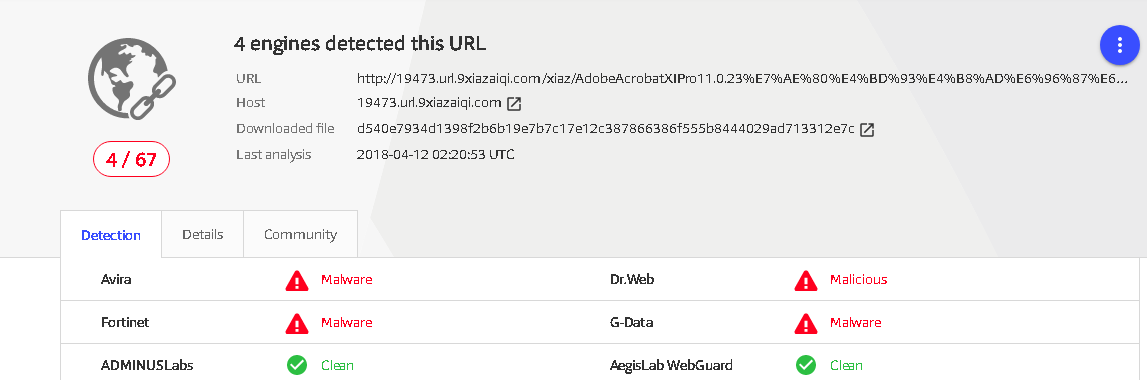

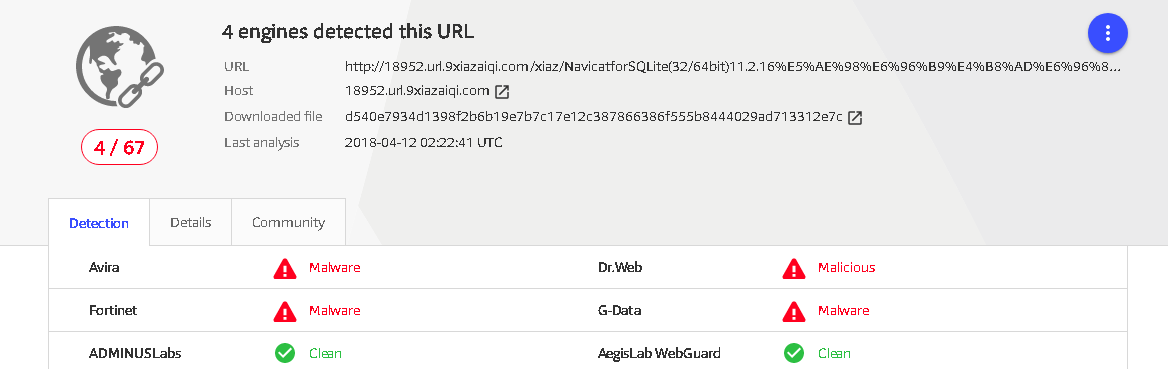

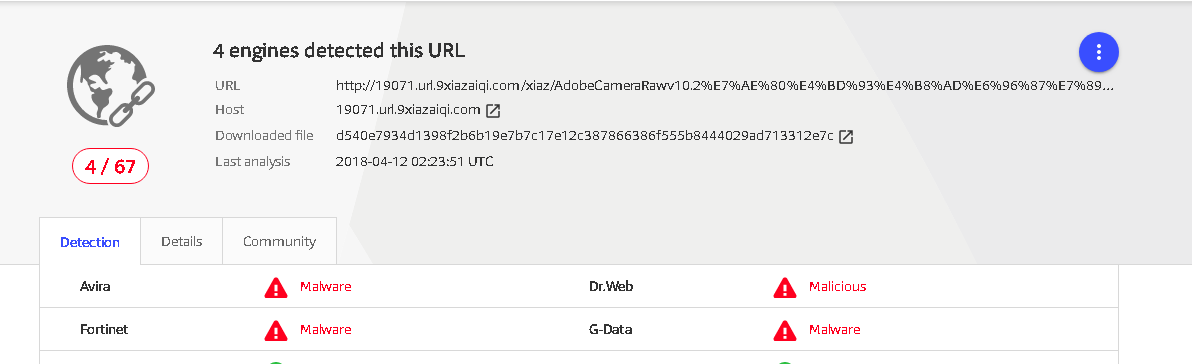

In [25]:
regex = ["\.url\.246546\.com/xiaz/", 
         "_%25E7%2599%25BE%25E5%25BA%25A6%25E7%25BD%2591%25E7%259B%2598-%25E7%25BD%2591%25E7%259B%2598007@554_2\.exe"]
res = match_obj.match(regex)

19690.url.246546.com/xiaz/%E7%8E%AF%E5%A4%AA%E5%B9%B3%E6%B4%8B2_%E7%99%BE%E5%BA%A6%E7%BD%91%E7%9B%98-%E7%BD%91%E7%9B%98007@554_2.exe
19453.url.246546.com/xiaz/%5BEastTop%5DMenAtPlay-GetEven-CarterDane&KleinKerr.rar_%E7%99%BE%E5%BA%A6%E7%BD%91%E7%9B%98-%E7%BD%91%E7%9B%98007@554_2.exe
19287.url.246546.com/xiaz/[Kamigami]%E6%9D%B1%E4%BA%AC%E6%95%99%E7%88%B6[BDx2641920%C3%971060FLAC(5.1ch)Sub(GB,BIG5,JP,EN,FR,SP,PT,RU)].mkv%E4%BB%8A%E6%95%8F_%E7%99%BE%E5%BA%A6%E7%BD%91%E7%9B%98-%E7%BD%91%E7%9B%98007@554_2.exe
19288.url.246546.com/xiaz/%E8%83%8C%E9%9D%A0%E8%83%8C%EF%BC%8C%E8%84%B8%E5%AF%B9%E8%84%B8.Bei.kao.bei,lian.dui.lian.1994.DVDRip.Xvid.AC3.CD1%E4%B8%AD%E8%8B%B1%E5%8F%8C%E5%AD%97.mkv%E8%83%8C%E9%9D%A0%E8%83%8C%E8%84%B8%E5%AF%B9%E8%84%B8_%E7%99%BE%E5%BA%A6%E7%BD%91%E7%9B%98-%E7%BD%91%E7%9B%98007@554_2.exe
19072.url.246546.com/xiaz/%E7%AA%91%E5%AD%90%E5%BC%80%E5%BC%A0%E4%BA%86(H).txt_%E7%99%BE%E5%BA%A6%E7%BD%91%E7%9B%98-%E7%BD%91%E7%9B%98007@554_2.exe
19245.url.246546.com/xiaz/%E8%83%8C%E

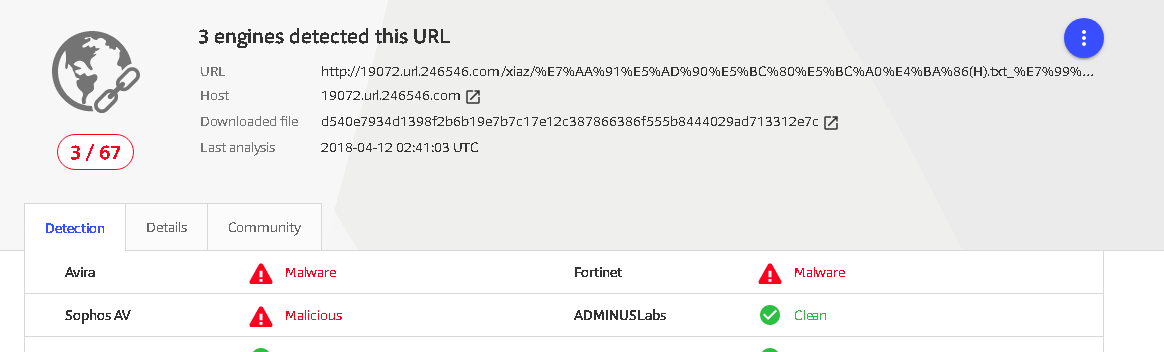

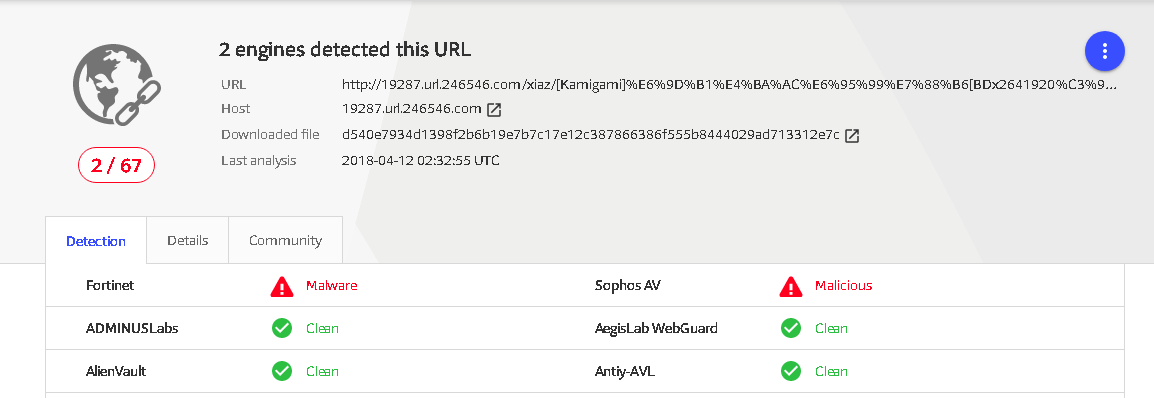

In [28]:
regex = ["\.xdown4\.com/cx/160624/35/%25E", "%25B9%25E5%25", "%25B9%25E5%25BD%25"]
res = match_obj.match(regex)

down05066052.xdown4.com/cx/160624/35/%E4%B8%9C%E6%96%B9%E5%85%8D%E8%B4%B9%E5%BD%B1%E8%A7%86%E5%A4%A7%E5%85%A8@187_1_5.exe
down05067393.xdown4.com/cx/160624/35/%E4%B8%9C%E6%96%B9%E5%85%8D%E8%B4%B9%E5%BD%B1%E8%A7%86%E5%A4%A7%E5%85%A8@266_1_5.exe
down05069395.xdown4.com/cx/160624/35/%E4%B8%9C%E6%96%B9%E5%85%8D%E8%B4%B9%E5%BD%B1%E8%A7%86%E5%A4%A7%E5%85%A8@231_1_5.exe
down05067496.xdown4.com/cx/160624/35/%E4%B8%9C%E6%96%B9%E5%85%8D%E8%B4%B9%E5%BD%B1%E8%A7%86%E5%A4%A7%E5%85%A8@371_1_5.exe
down05072313.xdown4.com/cx/160624/35/%E4%B8%9C%E6%96%B9%E5%85%8D%E8%B4%B9%E5%BD%B1%E8%A7%86%E5%A4%A7%E5%85%A8@267_1_5.exe
down05067461.xdown4.com/cx/160624/35/%E4%B8%9C%E6%96%B9%E5%85%8D%E8%B4%B9%E5%BD%B1%E8%A7%86%E5%A4%A7%E5%85%A8@319_1_5.exe
down05072293.xdown4.com/cx/160624/35/%E4%B8%9C%E6%96%B9%E5%85%8D%E8%B4%B9%E5%BD%B1%E8%A7%86%E5%A4%A7%E5%85%A8@187_1_5.exe
down05067384.xdown4.com/cx/160624/35/%E4%B8%9C%E6%96%B9%E5%85%8D%E8%B4%B9%E5%BD%B1%E8%A7%86%E5%A4%A7%E5%85%A8@311_1_5.exe
down05067492.xdown4.com/

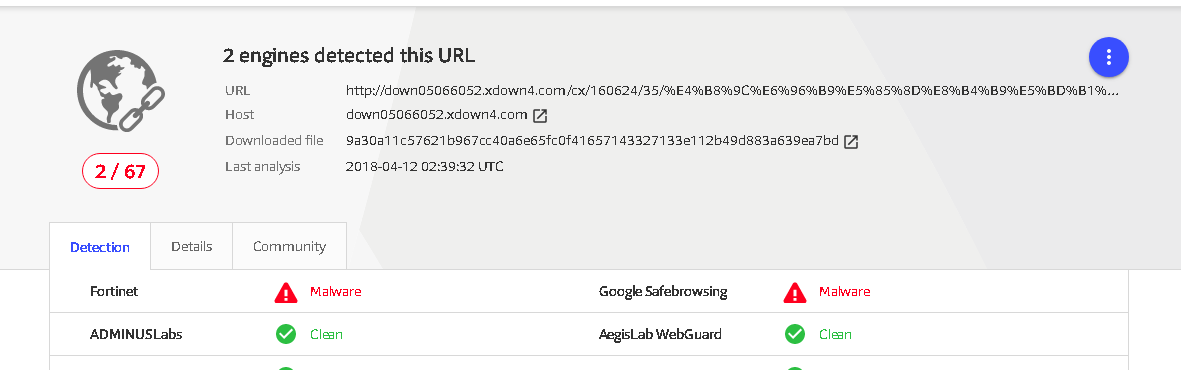

In [29]:
regex = ["14614\.xc\.gongnou\.com/down/%25E"]
res = match_obj.match(regex)

14614.xc.gongnou.com/down/%E8%AE%AF%E9%A3%9E%E8%BE%93%E5%85%A5%E6%B3%95%202.1.1599@626_4316.exe
14614.xc.gongnou.com/down/%E6%8B%B3%E7%9A%8797@793_7972.exe
14614.xc.gongnou.com/down/%E6%88%91%E7%9A%84%E4%B8%96%E7%95%8C@793_8054.exe
14614.xc.gongnou.com/down/%E7%99%BE%E5%BA%A6%E7%BD%91%E7%9B%98@793_3947.exe
14614.xc.gongnou.com/down/%E8%B0%B7%E6%AD%8C%E5%9C%B0%E7%90%83%20Google%20Earth%207.1@626_4237.exe
14614.xc.gongnou.com/down/%E8%85%BE%E8%AE%AFQQ@793_3161.exe
14614.xc.gongnou.com/down/%E9%A3%9E%E7%A7%8BFeiQ2013@626_4168.exe
14614.xc.gongnou.com/down/%E4%BC%81%E4%B8%9A%E5%BE%AE%E4%BF%A1@626_3830.exe
14614.xc.gongnou.com/down/%E7%87%95%E7%A7%80%E5%B7%A5%E5%85%B7%E7%AE%B1@626_5092.exe
14614.xc.gongnou.com/down/%E4%BA%BA%E7%B1%BB%E4%B8%80%E8%B4%A5%E6%B6%82%E5%9C%B0@793_5666.exe
14614.xc.gongnou.com/down/%E6%AF%8F%E6%97%A5%E8%8B%B1%E8%AF%AD%E5%90%AC%E5%8A%9B@793_4875.exe
14614.xc.gongnou.com/down/%E6%90%9C%E7%8B%97%E6%8B%BC%E9%9F%B3%E8%BE%93%E5%85%A5%E6%B3%95@793_3885.exe
14614.xc.gongno

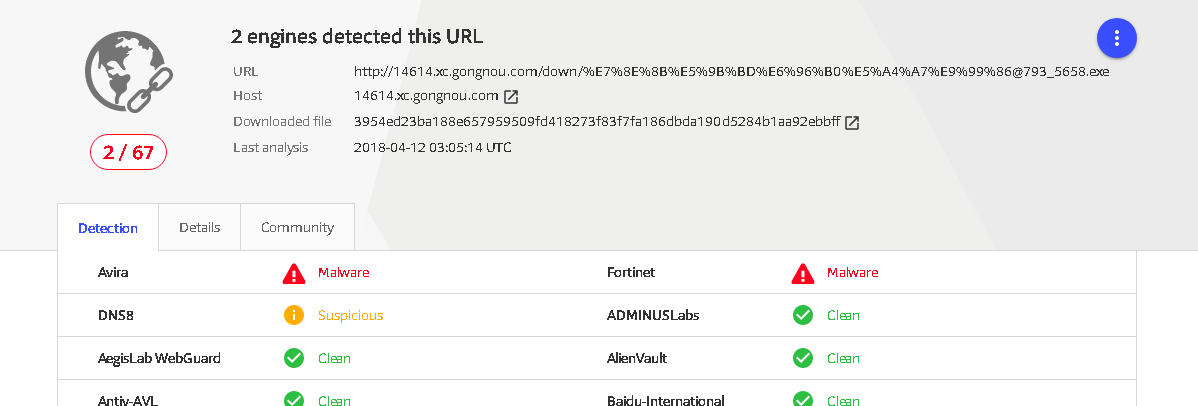

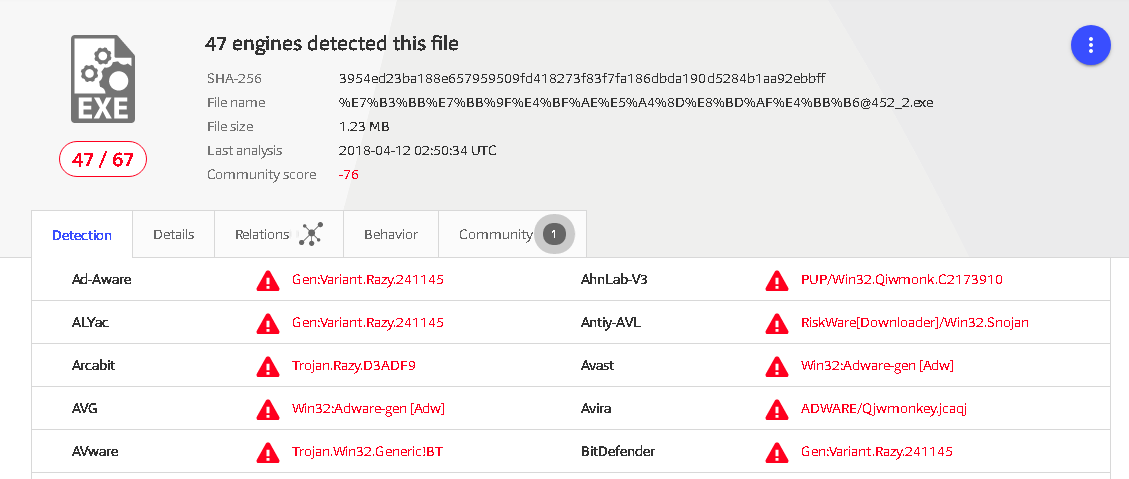

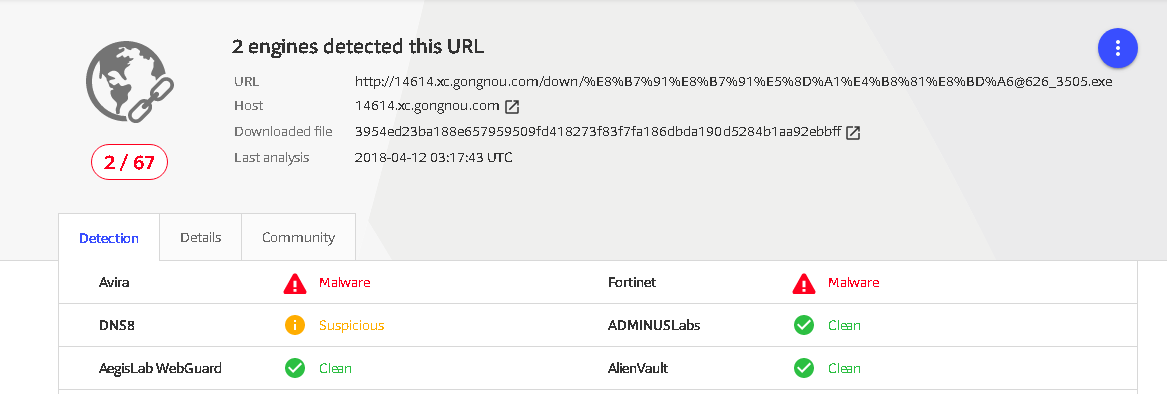